In [1]:
import os
import sys
sys.path.insert(0, os.path.join(os.getenv("HOME"), "linked-data-latex"))

import logging
logging.basicConfig(level="INFO")

import pandas as pd
from matplotlib import pylab as plt
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
# oda:version "v0.1.20"
nsampler=30

In [3]:
from odafunction.executors import default_execute_to_value
from odafunction.func.urifunc import URIipynbFunction, URIValue

focus_obs_name='total_3p'

# TODO: set version restriction here
# TODO: make nb2workflow store in remote storages
# TODO: make possible to disrupt equivalence with indications
# TODO: make common fd/fc depending on

v = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/grbbase.ipynb")(focus_obs_name=focus_obs_name), valueclass=URIValue, cached=True)

import io
import tempfile
import base64
import tarfile
    
with tarfile.open(v['output_values']['fits_pack_url'].replace("file://", "")) as tar:
    tar.extractall(path=f"grbbase_fitspack_{focus_obs_name}")

!ls -ltor grbbase_fitspack*/*fits

INFO:odafunction.func.urifunc:constructing <class 'odafunction.func.urifunc.URIipynbFunction'> from uri=file:///home/savchenk/grb221009/grbbase.ipynb value=None provenance=None
INFO:odafunction.func.urifunc:parsing URI file:///home/savchenk/grb22100...(45)
INFO:odafunction.func.urifunc:parsed uri file:///home/savchenk/grb221009/grbbase.ipynb as {'modifier': None, 'schema': 'file', 'path': '/home/savchenk/grb221009/grbbase.ipynb', 'funcname': None, 'revision': None}
INFO:nb2workflow.nbadapter:notebook_dir: /home/savchenk/grb221009
INFO:nb2workflow.semantics:input combined turtle: @prefix oda: <http://odahub.io/ontology#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix unit: <http://odahub.io/ontology/unit#> .


<http://odahub.io/ontology#grbbase_fca2961f> a oda:version "v0.2.26" .
INFO:nb2workflow.semantics:this variation could not be parsed: <http://odahub.i

-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:14 grbbase_fitspack_lc_total_3p/isgri_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:14 grbbase_fitspack_lc_total_3p/jemx1_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:14 grbbase_fitspack_lc_total_3p/jemx2_total_3p_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:18 grbbase_fitspack_lc_total_3p/jemx1_mosaic.fits
-rw-rw-r-- 1 savchenk 17262720 Feb 10 23:18 grbbase_fitspack_lc_total_3p/jemx2_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_lc_total_3p/isgri_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_total_3p/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk  4472640 Feb 10 23:18 grbbase_fitspack_lc_total_3p/isgrihe_mosaic.fits
-rw-rw-r-- 1 savchenk    23040 Feb 10 23:18 grbbase_fitspack_lc_total_3p/JMX1_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    23040 Feb 10 23:18 grbbase_fitspack_lc_total_3p/JMX2_lc_GRB221009A.fits
-rw-rw-r-- 1 savchenk    28800 Feb 10 23:18 grbbas

In [4]:
vacs = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/acs.ipynb"), valueclass=URIValue, cached=True)
import pandas as pd
acslc = pd.read_csv(vacs['output_values']['acslc_csv_url'].replace("file://", ""))

INFO:odafunction.func.urifunc:constructing <class 'odafunction.func.urifunc.URIipynbFunction'> from uri=file:///home/savchenk/grb221009/acs.ipynb value=None provenance=None
INFO:odafunction.func.urifunc:parsing URI file:///home/savchenk/grb22100...(41)
INFO:odafunction.func.urifunc:parsed uri file:///home/savchenk/grb221009/acs.ipynb as {'modifier': None, 'schema': 'file', 'path': '/home/savchenk/grb221009/acs.ipynb', 'funcname': None, 'revision': None}
INFO:nb2workflow.nbadapter:notebook_dir: /home/savchenk/grb221009
INFO:nb2workflow.semantics:input combined turtle: @prefix oda: <http://odahub.io/ontology#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix unit: <http://odahub.io/ontology/unit#> .


<http://odahub.io/ontology#acs_fca2961f> a oda:version "v0.1.4" .
INFO:nb2workflow.semantics:this variation could not be parsed: <http://odahub.io/ontology#acs_fc

In [5]:
prompt = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/prompt.ipynb"), valueclass=URIValue, cached=True)
import pandas as pd

with pd.HDFStore(prompt['output_values']['hklc_h5_url'].replace("file://", "")) as store:
    hklc = {k: store.get(k) for k in store}

INFO:odafunction.func.urifunc:constructing <class 'odafunction.func.urifunc.URIipynbFunction'> from uri=file:///home/savchenk/grb221009/prompt.ipynb value=None provenance=None
INFO:odafunction.func.urifunc:parsing URI file:///home/savchenk/grb22100...(44)
INFO:odafunction.func.urifunc:parsed uri file:///home/savchenk/grb221009/prompt.ipynb as {'modifier': None, 'schema': 'file', 'path': '/home/savchenk/grb221009/prompt.ipynb', 'funcname': None, 'revision': None}
INFO:nb2workflow.nbadapter:notebook_dir: /home/savchenk/grb221009
INFO:nb2workflow.semantics:input combined turtle: @prefix oda: <http://odahub.io/ontology#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix unit: <http://odahub.io/ontology/unit#> .


<http://odahub.io/ontology#prompt_fca2961f> a oda:version "dev1.1.27" .
INFO:nb2workflow.semantics:this variation could not be parsed: <http://odahub.io/

In [6]:
from astropy.time import Time

T0_isot = v['output_values']['data']['T0_isot']
T0_ijd = Time(T0_isot).mjd - 51544

# TODO: import from other wfl
src_coord = SkyCoord("19h 13m 03.43s", "+19d 46m 23.1s", unit=u.deg)


In [7]:

from ddpaper.draftdata import load_globals

load_globals("eventinfo", globals())


INFO:ddpaper.draftdata:loading T0_ijd = 8317.553472222222
INFO:ddpaper.draftdata:loading T0_isot = '2022-10-09T13:17:00'
INFO:ddpaper.draftdata:loading source_name = 'GRB221009A'
INFO:ddpaper.draftdata:loading src_coord = <SkyCoord (ICRS): (ra, dec) in deg
    (288.26429167, 19.77308333)>


        59861.532764       -1.132263e-08
        59861.532875       -2.860962e-08
        59861.532967        8.372585e-09
        59861.533060        2.639475e-08
        59861.533152        5.800138e-08
        59861.533243        7.682774e-09
        59861.533336       -2.288027e-08
        59861.533427       -2.711575e-08
        59861.533519       -1.538258e-09
        59861.533612       -4.196331e-08


[]

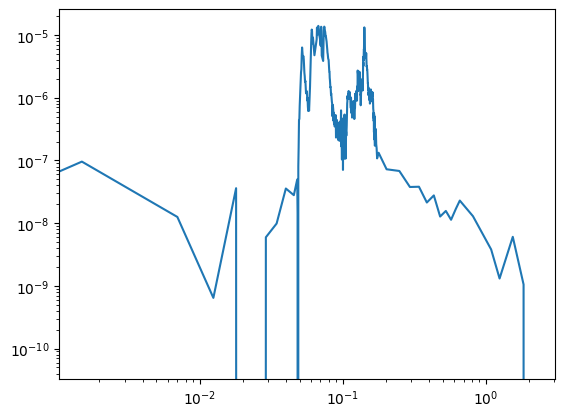

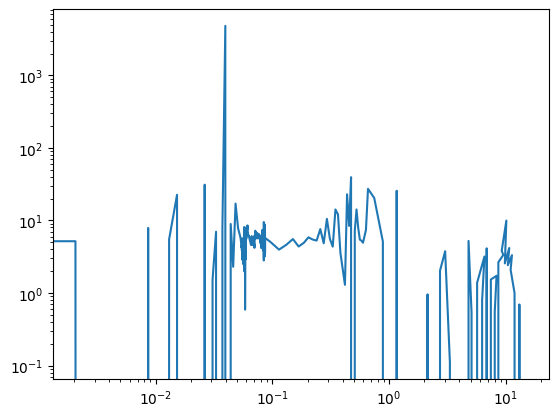

In [8]:
plt.figure()

!head picsit/grb221009a_afterglow_picsit_lc.txt

picsit_lc = pd.read_csv("picsit/grb221009a_afterglow_picsit_lc.txt", delim_whitespace=True, names=["mjd", "flux"])
picsit_hr = pd.read_csv("picsit/grb221009a_afterglow_picsit_hr.txt", delim_whitespace=True, names=["mjd", "hr"])
picsit_ag = pd.read_csv("picsit/grb221009a_picsit_prompt_afterglow_erg_230302.txt", delim_whitespace=True, names=["mjd", "flux", "flux_err"])


plt.plot(
    (picsit_ag.mjd - (T0_ijd + 51544))*24, 
    picsit_ag.flux, 
)

plt.loglog()

plt.figure()

plt.plot(
    (picsit_hr.mjd - (T0_ijd + 51544))*24, 
    picsit_hr.hr, 
)

plt.loglog()

In [9]:
import numpy as np
from rebin import rebin_in_bins


In [10]:
picsit_ag.sort_values('mjd', inplace=True)

# picsit_ag['flux_err'] = picsit_ag.flux*0 + 1e-8
picsit_ag['dt']  = np.concatenate([[0], np.array(picsit_ag['mjd'])[1:] - np.array(picsit_ag['mjd'])[:-1]])
picsit_ag['dt']

0      0.000000
1      0.000238
2      0.000229
3      0.000230
4      0.000231
         ...   
520    0.011530
521    0.006606
522    0.012333
523    0.012212
524    0.012244
Name: dt, Length: 525, dtype: float64

In [11]:
import subprocess
import io
import pathlib
from astropy.io import fits

def sshopen(fn):
    cfn = pathlib.Path("/tmp/sshopen-cache/") / fn.replace("/", "_")
    cfn.parent.mkdir(exist_ok=True)

    try:
        of = fits.open(cfn)
    except:
        f = io.BytesIO(subprocess.check_output(f"ssh login01.astro.unige.ch tar cf - {fn} | tar xf - -O", shell=True))

        with open(cfn, "wb") as F:
            F.write(f.read())
        
        of = fits.open(cfn)
    return of

sshopen("/isdc/arc/rev_3/scw/2558/255800290010.001/compton_events.fits.gz")


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7ff2b9d10fa0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff2b9d78430>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff2b9d09a00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff2b9d09250>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff2b9d16c40>]

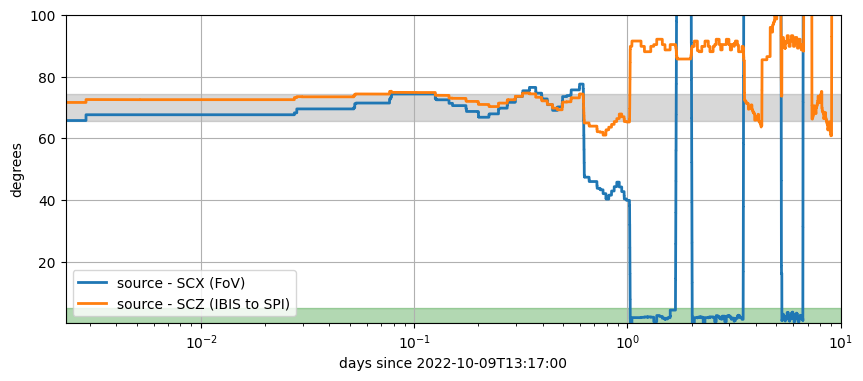

In [12]:
ijd2plot = lambda T: (T - T0_ijd)*24*3600
ijd2plot_d = lambda T: (T - T0_ijd)

att_hist = None

for orbit in ["2558", "2559", "2560", "2561"]:
    _ = sshopen(f"/isdc/arc/rev_3/aux/adp/{orbit}.001/attitude_historic.fits.gz")[1].data
    if att_hist is None:
        att_hist = _
    else:
        att_hist = np.concatenate([att_hist, _])



scx = SkyCoord(att_hist['RA_SCX'], att_hist['DEC_SCX'], unit="deg")
scz = SkyCoord(att_hist['RA_SCZ'], att_hist['DEC_SCZ'], unit="deg")

theta = scx.separation(src_coord).deg

plt.figure(figsize=(10, 4))


def plot_obs():
    plt.step(
    # plt.scatter(
        ijd2plot_d(att_hist['TIME']),
        # att_hist['RA_SCX'],
        # att_hist['DEC_SCX']
        theta,
        where="pre",
        label="source - SCX (FoV)",
        lw=2
    )

    plt.step(
        ijd2plot_d(att_hist['TIME']),
        -1 * scz.separation(src_coord).deg + 180,
        label="source - SCZ (IBIS to SPI)",
        where='pre',
        lw=2
    )

    # m_stable_ons_response = theta > 60
    m_stable_ons_response = ijd2plot_d(att_hist['POINTING_TIME']) - att_hist['DURATION']/24/3600 < 0.1
    m_stable_ons_response &= ijd2plot_d(att_hist['POINTING_TIME']) > -0.1



    plt.axhspan(0, 5, color='green', alpha=0.3, 
                # label='< 5 deg, FoV observations with ISGRI and JEM-X'
                )
    # plt.axhspan(5, 10, color='yellow', alpha=0.3)

    plt.axhspan(theta[m_stable_ons_response].min(), theta[m_stable_ons_response].max(), color='grey', alpha=0.3,
                # label="range of relative source angles with stable all-sky response"
                )
    

    return m_stable_ons_response

plot_obs()

plt.xlim([200/24/3600, 10])
plt.ylim([0.1, 100])

# plt.loglog()
plt.semilogx()

plt.legend(loc='lower left')

plt.xlabel(f"days since {T0_isot}")
plt.ylabel(f"degrees")

plt.grid()

plt.savefig("relpos_history.pdf")

In [13]:
att_hist

array([(b'25580000', b'P', b'P', 0, 8316.73990954, 8316.73990954, 8316.73990954, 1.157035e+04, 0., 315.00226, -34.99975  , 210.64058, -19.506361, b'            ',   0.     , 0.       , 111.2, 0, nan,        nan,        nan),
       (b'25580001', b'O', b'M', 0, 8316.87382157, 8316.87894889, 8316.87465491, 0.000000e+00, 0., 316.01096, -36.77675  , 210.02783, -20.223055, b'            ',   0.     , 0.       , 111. , 0, nan,        nan,        nan),
       (b'25580001', b'O', b'M', 1, 8316.87382157, 8316.87894889, 8316.87512944, 0.000000e+00, 0., 316.89224, -38.214638 , 209.46721, -20.823944, b'            ',   0.     , 0.       , 111. , 0, nan,        nan,        nan),
       ...,
       (b'25610077', b'P', b'G', 0, 8327.24341648, 8327.24526833, 8327.26026833, 2.100000e+02, 0., 152.00063,   2.997611 , 241.2125 , -14.717639, b'0244-00053-1', 151.5325 , 2.4294446,  53. , 0, 0.3,  6.205e-04, -0.0023855),
       (b'25610077', b'P', b'G', 0, 8327.24341648, 8327.24526833, 8327.26269889, 2.69990

In [14]:
"""
obs1 (1-1.7 days, 8 rings):
 Model Flux 0.0014555 photons (1.0229e-11 ergs/cm^2/s) range (3.0000 - 10.000 keV)
 Model Flux 3.7829e-05 photons (7.6619e-13 ergs/cm^2/s) range (10.000 - 20.000 keV)
 Model Flux 3.359e-06 photons (1.455e-13 ergs/cm^2/s) range (20.000 - 100.00 keV)

obs2 (2-3.5 days, 4 rings):
 Model Flux 0.00027077 photons (1.8924e-12 ergs/cm^2/s) range (3.0000 - 10.000 keV)
 Model Flux 6.3803e-06 photons (1.2892e-13 ergs/cm^2/s) range (10.000 - 20.000 keV)
 Model Flux 5.4611e-07 photons (2.3622e-14 ergs/cm^2/s) range (20.000 - 100.00 keV)

obs3 (5.3-6.6 days, 2 rings):
 Model Flux 4.473e-05 photons (3.0338e-13 ergs/cm^2/s) range (3.0000 - 10.000 keV)
 Model Flux 7.8889e-07 photons (1.5892e-14 ergs/cm^2/s) range (10.000 - 20.000 keV)
 Model Flux 6.4597e-08 photons (2.7899e-15 ergs/cm^2/s) range (20.000 - 100.00 keV)
"""

rings = {
    'r2558': {
        'flux_ecs_3_10': 1.0229e-11,
        't1_since_t0_d': 1,
        't2_since_t0_d': 1.7,
    }
}

In [28]:
import ogip.core
import ogip.tools

import importlib

importlib.reload(ogip.tools)


def get_conversion(instr):
    pha = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/{instr}_spectrum_GRB221009A_{focus_obs_name}.fits")
    rmf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/{instr}_rmf_GRB221009A_{focus_obs_name}.fits")
    arf = ogip.core.open_something(f"grbbase_fitspack_{focus_obs_name}/{instr}_arf_GRB221009A_{focus_obs_name}.fits")


    model_generator = lambda p:(lambda x:(p[0]*(x/25.)))
    fit_result, fitted_model = ogip.tools.fit(model_generator, [7e-5], [(pha, rmf, None, ~np.isnan(pha._rate))])

    # TODO: check
    return ogip.tools.get_unfolding_factor(fitted_model, rmf, arf) * u.keV.to(u.erg)


get_conversion('IBIS').mean(), 1e-8/200

INFO:root:opened grbbase_fitspack_total_3p/IBIS_spectrum_GRB221009A_total_3p.fits as <ogip.spec.PHAI object at 0x7ff2818d7100>
INFO:root:opened grbbase_fitspack_total_3p/IBIS_rmf_GRB221009A_total_3p.fits as <ogip.spec.RMF object at 0x7ff259ebd370>
INFO:root:opened grbbase_fitspack_total_3p/IBIS_arf_GRB221009A_total_3p.fits as <ogip.spec.ARF object at 0x7ff259e8b070>


[7.e-05]
[1.00007]
[-0.99993]
[-0.49993]
[0.25007]
[-0.12493]
[0.06257]
[-0.03118]
[0.015695]
[-0.0077425]
[0.00397625]
[-0.00188313]
[0.00104656]
[-0.00041828]
[0.00031414]
[-3.e-05]
[-0.00013]


(2.824827e-11, 5e-11)

In [16]:
m = np.array(picsit_ag.mjd)
m[1:][~((m[1:] - m[:-1]) > 0)]

array([], dtype=float64)

In [17]:
lc_by_instrument = {}

In [18]:
print("hklc:", list(hklc.keys()))

gedrate = hklc['/SPI_GEDRATE']
gedrate

hklc: ['/SPI_GEDRATE', '/SPI_GEDRATE0', '/SPI_GEDRATE1', '/SPI_GEDRATE10', '/SPI_GEDRATE11', '/SPI_GEDRATE12', '/SPI_GEDRATE13', '/SPI_GEDRATE14', '/SPI_GEDRATE15', '/SPI_GEDRATE16', '/SPI_GEDRATE17', '/SPI_GEDRATE18', '/SPI_GEDRATE2', '/SPI_GEDRATE3', '/SPI_GEDRATE4', '/SPI_GEDRATE5', '/SPI_GEDRATE6', '/SPI_GEDRATE7', '/SPI_GEDRATE8', '/SPI_GEDRATE9', '/SPI_GEDSAT', '/SPI_GEDSAT0', '/SPI_GEDSAT1', '/SPI_GEDSAT10', '/SPI_GEDSAT11', '/SPI_GEDSAT12', '/SPI_GEDSAT13', '/SPI_GEDSAT14', '/SPI_GEDSAT15', '/SPI_GEDSAT16', '/SPI_GEDSAT17', '/SPI_GEDSAT18', '/SPI_GEDSAT2', '/SPI_GEDSAT3', '/SPI_GEDSAT4', '/SPI_GEDSAT5', '/SPI_GEDSAT6', '/SPI_GEDSAT7', '/SPI_GEDSAT8', '/SPI_GEDSAT9', '/SPI_VETOGATE', '/SPI_VETONONSAT', '/SPI_VETOSAT']


,t,dt,c,ds
0,8317.507977,0.040009,19699,43820.040008
1,8317.507989,1.040009,20287,43821.040009
2,8317.508000,2.040009,19738,43822.040008
3,8317.508012,3.040011,19845,43823.040010
4,8317.508023,4.040011,20335,43824.040010
...,...,...,...,...
7995,8317.600512,7995.045364,19346,51815.045364
7996,8317.600523,7996.045364,20252,51816.045364
7997,8317.600535,7997.045366,19747,51817.045366
7998,8317.600547,7998.045366,19517,51818.045366


[]

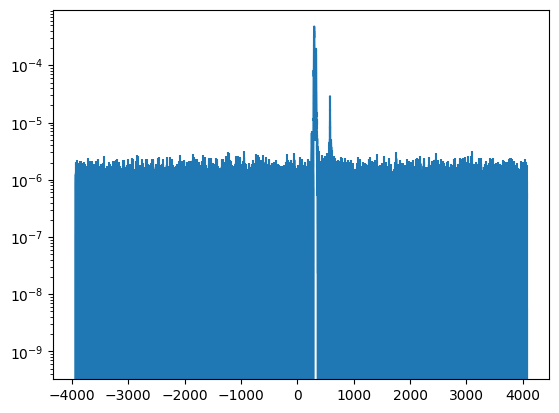

In [19]:
plt.figure()

m = gedrate.t < T0_ijd - 100./24/3600

resp = 4e8
gedrate['flux'] = (gedrate.c - np.mean(gedrate.c[m]))/resp
gedrate['flux_err'] = gedrate['flux']*0 + np.std(gedrate.c[m])/resp


plt.errorbar(
    ijd2plot(gedrate.t),
    gedrate.flux,
    gedrate.flux_err
)
plt.semilogy()

In [20]:
picsit_bti = pd.read_csv("picsit/grb221009a_bti_list.txt", delim_whitespace=True, names=["t1", "t2"])

for i, r in picsit_bti.iterrows():
    print(r.t1, r.t2)
    picsit_ag.flux[(picsit_ag.mjd > r.t1) & (picsit_ag.mjd < r.t2)] = np.NaN

59861.55557508222 59861.55559625096
59861.555623106426 59861.555623739376
59861.55602204203 59861.55626627378
59861.55643693712 59861.55656065312
59861.55714926659 59861.557170313834


/tmp/ipykernel_2518084/1313521705.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gedrate.flux[~m] = np.NaN
INFO:root:opened grbbase_fitspack_total_3p/JMX1_spectrum_GRB221009A_total_3p.fits as <ogip.spec.PHAI object at 0x7ff2b9d095b0>
INFO:root:opened grbbase_fitspack_total_3p/JMX1_rmf_GRB221009A_total_3p.fits as <ogip.spec.RMF object at 0x7ff25946dfd0>
INFO:root:opened grbbase_fitspack_total_3p/JMX1_arf_GRB221009A_total_3p.fits as <ogip.spec.ARF object at 0x7ff259fb4c70>
/home/savchenk/miniconda-recent/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/miniconda-recent/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret 

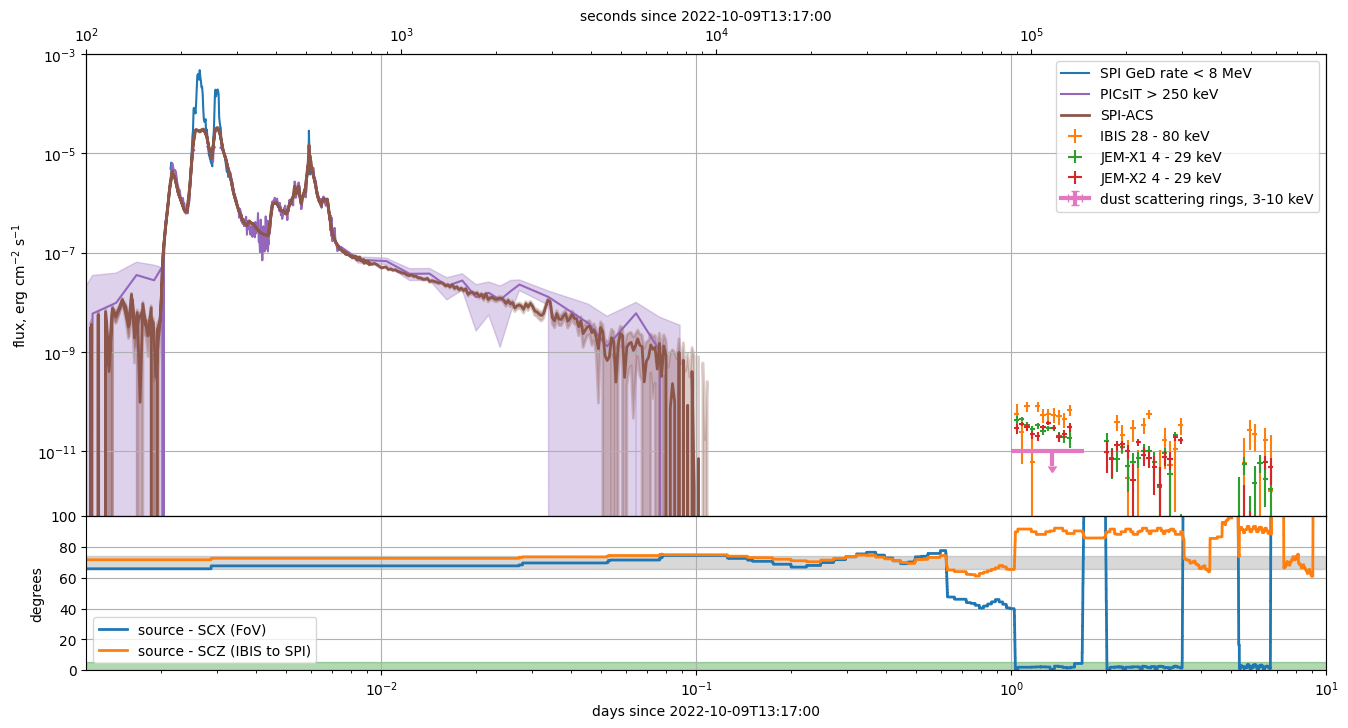

In [21]:
from astropy.io import fits

t_mjd_offset = 70./24/3600

T = np.logspace(-1, 1, 120)
Tc = (T[1:] + T[:-1])/2.
dT = (T[1:] - T[:-1])/2.

# plt.figure(figsize=(16, 6))
f, axes = plt.subplots(2, 1, figsize=(16, 8), height_ratios=[3, 1], sharex=True)
plt.sca(axes[0])

ijd2plot = lambda t:(t- T0_ijd)

plt.axhline(0, lw=2, c='k', alpha=0.5)


m = ((_:=ijd2plot(gedrate.t - t_mjd_offset)) < 0.01) & (_ > 0.002)
m &= gedrate.flux > 3e-6
gedrate.flux[~m] = np.NaN

plt.plot(
    ijd2plot(gedrate.t - t_mjd_offset),
    gedrate.flux,
    label='SPI GeD rate < 8 MeV'
)

for label, n in [('IBIS', 'IBIS'),
                 ('JEM-X1', 'JMX1'),
                 ('JEM-X2', 'JMX2')
                ]:

    f = fits.open(f"grbbase_fitspack_total_3p/{n}_lc_GRB221009A.fits")
    d = f[1].data
    conversion_factor = get_conversion('JMX1').mean()

    # plt.errorbar(ijd2plot(isgri_lc['TIME']), isgri_lc['RATE'], isgri_lc['ERROR'])

    d['RATE'][d['ERROR'] > np.nanmedian(d['ERROR'])*10] = np.NaN    

    r = rebin_in_bins(d['TIME'] - T0_ijd, d['RATE'], T)
    re = rebin_in_bins(d['TIME'] - T0_ijd, d['ERROR'], T, agg=lambda x:(np.sum(x**2))**0.5/len(x))

    m = re < np.nanmedian(re)*3

    # factor = 1e-8/200
    factor = conversion_factor

    plt.errorbar(
        Tc[m], 
        r[m]*factor,
        re[m]*factor,
        xerr=dT[m],
        label=f"{label} {int(f[1].header['E_MIN']):d} - {int(f[1].header['E_MAX']):d} keV",
        ls=""
    )

    lc_by_instrument[n] = {'t': Tc[m], 'r': r[m], 're': re[m], 'conversion_factor': conversion_factor}

m = (picsit_ag.mjd - (T0_ijd + 51544)) < 0.1

c = plt.plot(
# c = plt.errorbar(
    (picsit_ag.mjd - (T0_ijd + 51544))[m], 
    picsit_ag.flux[m],
    # picsit_ag.flux_err[m],
    # xerr=picsit_ag.dt[m]/2,
    # ls="",
    label='PICsIT > 250 keV'
)[0].get_color()

plt.fill_between(
    (picsit_ag.mjd - (T0_ijd + 51544))[m], 
    picsit_ag.flux[m] - picsit_ag.flux_err[m],
    picsit_ag.flux[m] + picsit_ag.flux_err[m],
    # xerr=picsit_lc.dt[m]/2,
    # ls="",
    # label='PICsIT > 250 keV'
    alpha=0.3,
    color=c
)


lc_by_instrument['picsit'] = {'t': (picsit_ag.mjd - (T0_ijd + 51544))[m], 'r': picsit_ag.flux[m], 're': picsit_ag.flux_err[m], 'conversion_factor': 1}

n = 1000

def rebin(x, n):
    N = int(len(x)/n)
    return np.array(x[:N*n]).reshape((N, n)).sum(1)


## ACS
# TODO: check values
bkg = 5336.468053846153
cts_to_fluence = 3e-10

tail_change = 0.01
tail_bins = np.logspace(-3, np.log10(0.11), 300)

acs_T = np.concatenate([np.linspace(0, tail_change, int(tail_change/3*24*3600)), tail_bins])
acs_Tc = (acs_T[1:] + acs_T[:-1])/2.
acs_dT = (acs_T[1:] - acs_T[:-1])/2.

from rebin import rebin_in_bins, rebin_bins_in_bins


acs_C = rebin_in_bins(acslc.t - T0_ijd, acslc.c - bkg - acslc.bkg_mean, acs_T, agg=lambda x:(np.sum(x))/len(x))
acs_Cmin = rebin_in_bins(acslc.t - T0_ijd, acslc.c - bkg - acslc.bkg_max, acs_T, agg=lambda x:(np.sum(x))/len(x))
acs_Cmax = rebin_in_bins(acslc.t - T0_ijd, acslc.c - bkg - acslc.bkg_min, acs_T, agg=lambda x:(np.sum(x))/len(x))

c = None

c = plt.plot(
    acs_Tc- t_mjd_offset,
    acs_C * cts_to_fluence,
    lw=2,
    label="SPI-ACS"
)[0].get_color()


c = plt.fill_between(
    acs_Tc - t_mjd_offset,
    acs_Cmin * cts_to_fluence,
    acs_Cmax * cts_to_fluence,
    lw=2,
    color=c,
    alpha=0.3
)

lc_by_instrument['acs'] = {'t': acs_Tc - t_mjd_offset, 'r': acs_C, 're': (acs_Cmax - acs_Cmin)/2, 'conversion_factor': cts_to_fluence}

# TODO: picsit erange

plt.errorbar(
    (rings['r2558']['t1_since_t0_d'] + rings['r2558']['t2_since_t0_d'])/2.,
    rings['r2558']['flux_ecs_3_10'],
    rings['r2558']['flux_ecs_3_10']/2.,
    xerr=(rings['r2558']['t2_since_t0_d'] - rings['r2558']['t1_since_t0_d'])/2., 
    uplims=[True],
    lw=3,
    label="dust scattering rings, 3-10 keV"
)



plt.ylim([0.5e-12, 1e-3])
plt.ylabel("flux, erg cm$^{-2}$ s$^{-1}$")
plt.loglog()
plt.grid()
plt.legend()

plt.sca(axes[1])

m_stable_ons_response = plot_obs()

plt.ylabel("degrees")
plt.ylim([0, 100])
plt.xlim([100./24/3600, 10])

# plt.grid(which='both')
plt.grid()

plt.legend(loc="lower left")

plt.xlabel(f"days since {T0_isot}")

plt.subplots_adjust(hspace=0)
# plt.semilogx()

plt.sca(axes[0])
xl_d = plt.gca().get_xlim()

ax = plt.twiny()
ax.set_xlabel(f"seconds since {T0_isot}")
plt.xlim(np.array(xl_d)*24*3600)
plt.semilogx()


plt.savefig("lc.png")
plt.savefig("lc.pdf")

# TODO: plot early AG SPI-ACS
# TODO: plot model fitb
# TODO: plot rings contribution approx



9.999988000013202e-12 [9.999999999999994e-06]


[]

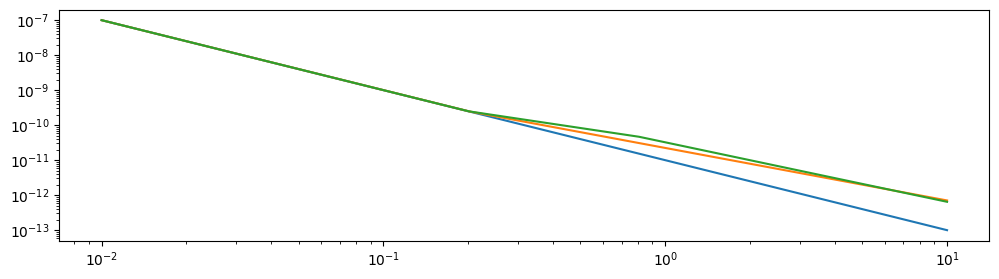

In [22]:
t_N = 1.

def conversion_for_instrument(i):
    return lc_by_instrument[i]['conversion_factor']

def s_t_model_gen(N, slope, t_break=np.NaN, slope_pb=np.NaN, t_break_er=np.NaN, slope_mid=np.NaN):

    def model(t, i):
        this_N = N
        this_slope = slope

        if not np.isnan(t_break) and t > t_break:
            this_slope = slope_pb
            this_N -= np.log10(t_break) * (slope_pb - slope)
            if not np.isnan(t_break_er):
                this_N += np.log10(t_break) * (slope_mid - slope)    
                this_N -= np.log10(t_break_er) * (slope_mid - slope)
            
        if not np.isnan(t_break_er) and t_break_er < t < t_break:
            this_slope = slope_mid
            this_N -= np.log10(t_break_er) * (slope_mid - slope)
            
        m = 10**this_N*(t/t_N)**this_slope/conversion_for_instrument(i)
        
        # if t > 1 and t < 1.7:
        #     m += rings_flux_ecs_3_10_r2558
    
        return m
    
    # TODO: this is too slow
    return np.frompyfunc(model, 2, 1)    

print(s_t_model_gen(-11, -1.2)(1.000001, 'picsit'), s_t_model_gen(-11, -1.2)(np.array([0.00001]), 'picsit'))

plt.figure(figsize=(12, 3))

t = np.logspace(-2, 1, 1000)

plt.plot(t, s_t_model_gen(-11, -2)(t, 'picsit'))
plt.plot(t, s_t_model_gen(-11, -2, 0.2, -1.5)(t, 'picsit'))
plt.plot(t, s_t_model_gen(-11, -2, 0.8, -1.7, 0.2, -1.2)(t, 'picsit'))
plt.loglog()

/tmp/ipykernel_2518084/1446606060.py:23: RuntimeWarning: invalid value encountered in double_scalars
  m = 10**this_N*(t/t_N)**this_slope/conversion_for_instrument(i)


this returns NaN: [-11.85072858  -1.682282     0.84787556  -1.2562095    0.19387362
  -1.19120906] nan
this returns NaN: [-10.77114804  -1.75319994   0.84938258  -1.17355559   0.20521438
  -1.22440034] nan
this returns NaN: [-11.80736725  -1.74849018   0.84814532  -1.09491751   0.18533028
  -1.27449359] nan
this returns NaN: [-10.89487306  -1.92768078   0.76006228  -1.11678679   0.19891667
  -1.2607166 ] nan
this returns NaN: [-10.59135038  -1.86240541   0.84653525  -1.22552394   0.20105701
  -1.22555494] nan
this returns NaN: [-10.63193821  -1.77088797   0.74290672  -1.24519111   0.19641108
  -1.24362632] nan
this returns NaN: [-12.07991222  -1.73796182   0.83538979  -1.07599327   0.19704215
  -1.1218693 ] nan
this returns NaN: [-11.01198164  -1.72666946   0.86247761  -1.21032322   0.203768
  -1.2343603 ] nan
this returns NaN: [-11.0608298   -1.76850499   0.8442706   -1.31495222   0.20068958
  -1.17632145] nan
this returns NaN: [-11.33820786  -1.6308138    0.76889329  -1.25248813   0.

  0%|          | 0/30 [00:00<?, ?it/s]

this returns NaN: [-10.74432647  -1.61546017   0.78690514  -1.24614196   0.19815261
  -1.25268025] nan
this returns NaN: [-11.82480665  -1.58665309   0.89562309  -1.00577525   0.18050235
  -1.35854465] nan
this returns NaN: [-10.52243623  -1.79383286   0.70685172  -1.29536098   0.19970938
  -1.29778174] nan
this returns NaN: [-11.09094719  -1.70118761   0.86547049  -1.20746957   0.20427693
  -1.23601334] nan
this returns NaN: [-11.15618946  -1.74405517   0.82831426  -1.25894131   0.20026861
  -1.19990493] nan
this returns NaN: [-10.66354626  -1.55593312   0.81683735  -1.04595255   0.18484988
  -1.0679578 ] nan
this returns NaN: [-11.04170436  -1.77514356   0.71780172  -1.21744592   0.20656437
  -1.17443186] nan
this returns NaN: [-10.65215649  -1.89440705   0.79590474  -1.19103243   0.2018985
  -1.2062043 ] nan
this returns NaN: [-10.55399523  -1.71738036   0.76663641  -1.14403146   0.2013406
  -1.00168942] nan
this returns NaN: [-11.82251522  -1.78723056   0.60360215  -1.27795461   0.

/home/savchenk/miniconda-recent/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  3%|▎         | 1/30 [00:00<00:20,  1.42it/s]

this returns NaN: [-10.84372249  -1.74663859   0.79855916  -1.17624888   0.19093183
  -1.17010266] nan
this returns NaN: [-11.2163806   -1.9573134    0.75967264  -1.03447006   0.22411281
  -1.18200683] nan
this returns NaN: [-10.80852519  -1.86572962   0.79159436  -1.24287485   0.18895277
  -1.28656755] nan
this returns NaN: [-11.06731911  -1.71790716   0.65024042  -1.42810482   0.20040439
  -1.10676306] nan
this returns NaN: [-11.33058907  -1.98553759   0.75883407  -1.25723096   0.20847025
  -1.22192754] nan
this returns NaN: [-10.8578054   -1.77991633   0.81647382  -1.19776402   0.18628417
  -1.13794812] nan
this returns NaN: [-11.03135852  -1.60541783   0.74465299  -1.16964338   0.20827436
  -1.152099  ] nan
this returns NaN: [-11.38395228  -1.6894126    0.77121414  -1.20765451   0.20274026
  -1.22147734] nan
this returns NaN: [-11.25126002  -1.76978189   0.78059764  -1.13160831   0.20801409
  -1.22324912] nan
this returns NaN: [-11.22642551  -1.8541615    0.8174462   -1.23703944   

  7%|▋         | 2/30 [00:01<00:20,  1.35it/s]

this returns NaN: [-11.11664644  -1.76927475   0.79551412  -1.20073286   0.2157887
  -1.21157561] nan
this returns NaN: [-11.30799297  -1.81208279   0.83430972  -1.19116736   0.18938487
  -1.20451043] nan
this returns NaN: [-11.03406673  -1.84058196   0.8026843   -1.22145242   0.18937348
  -1.2325149 ] nan
this returns NaN: [-11.14221551  -1.73605369   0.78942742  -1.11032656   0.20478602
  -1.19816441] nan
this returns NaN: [-11.27244947  -1.88579905   0.82563596  -1.24278985   0.20859417
  -1.18421102] nan
this returns NaN: [-11.14609498  -1.83038912   0.71593477  -1.17350341   0.20792955
  -1.1822004 ] nan
this returns NaN: [-10.61068229  -1.74083514   0.81660789  -1.1884178    0.20575372
  -1.29617279] nan
this returns NaN: [-11.2992942   -1.83008925   0.71137929  -1.06912153   0.19009768
  -1.15214522] nan
this returns NaN: [-11.73461571  -1.82842988   0.73804627  -1.11397669   0.24186478
  -1.1353971 ] nan
this returns NaN: [-11.79752148  -1.74184233   0.79143702  -1.13858469   0

 10%|█         | 3/30 [00:02<00:21,  1.27it/s]

this returns NaN: [-12.30975991  -1.69475501   0.85330378  -1.04743271   0.18029219
  -1.29021597] nan
this returns NaN: [-10.5568792   -1.87572966   0.86315271  -1.19931191   0.17831288
  -1.25927153] nan
this returns NaN: [-11.13425483  -1.77657275   0.83880262  -1.32961505   0.20078792
  -1.17055359] nan
this returns NaN: [-11.32123195  -1.50903975   0.78557787  -1.3271435    0.19066716
  -1.21615065] nan
this returns NaN: [-10.93678659  -1.67355063   0.79933932  -1.13198739   0.20418685
  -1.19688628] nan
this returns NaN: [-11.43723959  -1.77071458   0.81554377  -1.11436182   0.20654415
  -1.20453298] nan
this returns NaN: [-11.09104503  -1.66895929   0.82318601  -1.15770685   0.22500865
  -1.26563632] nan
this returns NaN: [-11.28825018  -1.65747431   0.90140638  -1.23416447   0.18508439
  -1.20340445] nan
this returns NaN: [-10.96190541  -1.79132172   0.82691727  -1.24031918   0.19343182
  -1.16964555] nan
this returns NaN: [-11.12462827  -2.03827022   0.75595507  -1.12177032   

 13%|█▎        | 4/30 [00:03<00:19,  1.31it/s]

this returns NaN: [-11.49809759  -1.90603563   0.82952673  -1.08337073   0.21096578
  -1.10122247] nan
this returns NaN: [-12.38835922  -1.74062454   0.76792932  -1.11943142   0.19201375
  -1.0345389 ] nan
this returns NaN: [-11.60819335  -1.77186078   0.90175806  -1.06013767   0.18801117
  -1.11705869] nan
this returns NaN: [-10.88376731  -1.73079614   0.76254871  -1.22663501   0.19759606
  -1.29818462] nan
this returns NaN: [-11.28779929  -1.96828959   0.73466138  -1.02820675   0.20652954
  -1.2920733 ] nan
this returns NaN: [-10.53080045  -1.88419677   0.84862798  -1.19380288   0.19884297
  -1.22198091] nan
this returns NaN: [-11.93903475  -1.60180106   0.7786025   -1.30389395   0.19832997
  -1.23434064] nan
this returns NaN: [-11.17749289  -1.64011087   0.82639318  -1.01927593   0.19531339
  -1.06121401] nan
this returns NaN: [-10.83061803  -1.53667115   0.75361004  -1.28484623   0.20584956
  -1.3445465 ] nan
this returns NaN: [-11.24347039  -1.77436243   0.83605819  -1.1200933    

 17%|█▋        | 5/30 [00:03<00:18,  1.34it/s]

this returns NaN: [-10.83040753  -1.76827365   0.85065588  -1.26510025   0.20854477
  -1.2499469 ] nan
this returns NaN: [-12.3701475   -1.73716123   0.85022882  -1.13503171   0.18860356
  -1.15858347] nan
this returns NaN: [-11.38327601  -1.92447361   0.87552159  -1.25091548   0.20675436
  -1.19690038] nan
this returns NaN: [-11.50616989  -1.99576587   0.64163008  -1.16993018   0.22121998
  -1.20218653] nan
this returns NaN: [-12.05058482  -1.7417005    0.77943472  -1.14403596   0.19421165
  -1.09043409] nan
this returns NaN: [-10.7814916   -1.87990004   0.95745876  -1.08389651   0.18780408
  -1.32648334] nan
this returns NaN: [-11.26443821  -1.8265235    0.86849794  -1.08919804   0.19833528
  -1.16650849] nan
this returns NaN: [-12.1251735   -1.6697334    0.80644024  -1.09795099   0.19108331
  -0.98948962] nan
this returns NaN: [-11.83541297  -1.68309252   0.8481422   -1.25537161   0.19405429
  -1.19199701] nan
this returns NaN: [-10.81722104  -1.84506533   0.83665725  -1.16073185   

 20%|██        | 6/30 [00:04<00:18,  1.31it/s]

this returns NaN: [-10.64543323  -1.93080801   0.82812834  -1.20340718   0.19839092
  -1.17191601] nan
this returns NaN: [-11.72162358  -1.7020358    0.78097861  -1.06266372   0.20542362
  -1.25367844] nan
this returns NaN: [-12.44652619  -1.66764979   0.84477712  -1.110784     0.18782779
  -1.09245985] nan
this returns NaN: [-11.40721267  -1.89679145   0.81970679  -1.22928374   0.20851948
  -1.16824875] nan
this returns NaN: [-11.05016233  -1.85464271   0.71717619  -1.19019553   0.20529353
  -1.20097803] nan
this returns NaN: [-11.35178901  -1.84207113   0.72240398  -1.08724976   0.19068183
  -1.15610459] nan
this returns NaN: [-11.51836067  -1.86209376   0.84219992  -1.10657979   0.20415233
  -1.13788257] nan
this returns NaN: [-10.96269434  -1.79773216   0.79231505  -1.16575437   0.21673679
  -1.20498275] nan
this returns NaN: [-11.36047873  -1.75944286   0.85609696  -1.13163123   0.19333118
  -1.20142286] nan
this returns NaN: [-11.36566123  -1.81528006   0.86161421  -1.11637306   

 23%|██▎       | 7/30 [00:05<00:17,  1.31it/s]

this returns NaN: [-11.20367766  -1.92011071   0.7154138   -1.19646877   0.2042441
  -1.23706834] nan
this returns NaN: [-11.28245845  -1.82772673   0.71477636  -1.07281825   0.19054794
  -1.15423981] nan
this returns NaN: [-11.07844664  -1.82860299   0.76989687  -1.14771055   0.22190851
  -1.1583255 ] nan
this returns NaN: [-11.10324912  -1.80291698   1.03793963  -1.01630713   0.18950716
  -1.25929081] nan
this returns NaN: [-11.50626653  -1.75590338   0.7973567   -1.14667276   0.18764651
  -1.12637552] nan
this returns NaN: [-11.96887086  -1.68137299   0.88221352  -1.05437321   0.18195941
  -1.26031892] nan
this returns NaN: [-10.63257628  -1.77018138   0.74265899  -1.2452246    0.1964436
  -1.24344923] nan
this returns NaN: [-10.98609373  -1.75021841   0.85903871  -1.21030035   0.20241308
  -1.23109183] nan
this returns NaN: [-11.45242672  -1.66953089   0.88111655  -1.41459997   0.20077139
  -1.15667824] nan
this returns NaN: [-12.22451412  -1.61702857   0.7590476   -1.30312269   0.

 27%|██▋       | 8/30 [00:06<00:16,  1.33it/s]

this returns NaN: [-10.99372228  -1.57159733   0.75669027  -1.16379603   0.20530344
  -1.16348428] nan
this returns NaN: [-11.38294938  -1.6896327    0.77156925  -1.20742994   0.20271039
  -1.22157211] nan
this returns NaN: [-11.02594225  -1.89446081   0.8100562   -1.18129995   0.19273818
  -1.24048125] nan
this returns NaN: [-10.52868411  -1.83989719   0.77489609  -1.23249217   0.19305014
  -1.23313343] nan
this returns NaN: [-10.94653138  -1.96014112   0.81132442  -1.32537256   0.22102876
  -1.136949  ] nan
this returns NaN: [-10.64509317  -1.68501411   0.83891372  -1.18006839   0.20311536
  -1.34320596] nan
this returns NaN: [-11.63502723  -1.68486406   0.62744941  -1.01400374   0.18613395
  -1.07418284] nan
this returns NaN: [-12.16403413  -1.7754826    0.81244849  -1.12935763   0.19825761
  -1.17381735] nan
this returns NaN: [-10.73102798  -1.72967661   0.71052046  -1.26973232   0.18967639
  -1.33098524] nan
this returns NaN: [-10.67298668  -1.6998512    0.86573814  -1.16126825   

 30%|███       | 9/30 [00:06<00:15,  1.33it/s]

this returns NaN: [-11.20186233  -1.82901043   0.74018337  -1.12186691   0.21047236
  -1.17534776] nan
this returns NaN: [-10.74468935  -1.87426336   0.78667638  -1.24814755   0.18724264
  -1.30258022] nan
this returns NaN: [-10.90547402  -1.73694242   0.80218188  -1.21021653   0.19855192
  -1.30874493] nan
this returns NaN: [-11.38986278  -1.69356805   0.72683229  -1.28318942   0.19636806
  -1.12275457] nan
this returns NaN: [-10.84293066  -1.94652002   0.79084342  -1.23915475   0.2054889
  -1.14183212] nan
this returns NaN: [-10.56430533  -1.80985832   0.76104933  -1.12742836   0.20410705
  -1.3552441 ] nan
this returns NaN: [-11.98286397  -1.77896883   0.84908997  -1.18103241   0.19257842
  -1.23117406] nan
this returns NaN: [-11.22471376  -2.02999525   0.68622764  -1.23732186   0.19271323
  -1.38305475] nan
this returns NaN: [-10.68188993  -1.81634177   0.82729751  -1.21344163   0.21965306
  -1.26986106] nan
this returns NaN: [-11.27017237  -1.71271015   0.80821542  -1.18461762   0

 33%|███▎      | 10/30 [00:07<00:15,  1.31it/s]

this returns NaN: [-11.02710569  -1.77943606   0.76130839  -1.25126803   0.20206897
  -1.18551087] nan
this returns NaN: [-10.70646597  -2.1997943    0.80422409  -1.15275908   0.18295079
  -1.28334443] nan
this returns NaN: [-10.62567176  -1.89064432   0.73853747  -1.24912684   0.19215848
  -1.31659595] nan
this returns NaN: [-10.68035766  -1.72096546   0.75118685  -1.22930932   0.20001991
  -1.23787939] nan
this returns NaN: [-10.94071604  -1.85758704   0.78108022  -1.17167522   0.17371687
  -1.3166392 ] nan
this returns NaN: [-11.04786927  -1.71651781   0.77457048  -1.13929113   0.21256102
  -1.2503145 ] nan
this returns NaN: [-11.35951973  -1.86526666   0.76072958  -1.20994478   0.20940783
  -1.28635414] nan
this returns NaN: [-10.80467247  -1.73502845   0.82643262  -1.21202714   0.19008583
  -1.16132995] nan
this returns NaN: [-11.1757006   -1.84619591   0.79786455  -1.21781737   0.20368394
  -1.1714411 ] nan
this returns NaN: [-11.01075976  -1.67462523   0.77899812  -1.22576338   

 37%|███▋      | 11/30 [00:08<00:14,  1.27it/s]

this returns NaN: [-10.91869581  -1.64349106   0.76450061  -1.10024104   0.15765239
  -1.15489116] nan
this returns NaN: [-11.73154209  -1.9542255    0.68583344  -1.18870468   0.21695929
  -1.31199488] nan
this returns NaN: [-11.30714534  -1.83499472   0.75962441  -1.13022195   0.21121227
  -1.18942777] nan
this returns NaN: [-10.68285033  -1.87702153   0.78632774  -1.25136401   0.18389358
  -1.29211776] nan
this returns NaN: [-10.70418984  -1.86819643   0.78431324  -1.22583666   0.19636474
  -1.21852032] nan
this returns NaN: [-12.30795745  -1.89719182   0.86573163  -1.23641919   0.20168781
  -1.11005018] nan
this returns NaN: [-11.50490228  -2.21036944   0.70248916  -1.23622292   0.19996423
  -1.38872133] nan
this returns NaN: [-11.26240387  -1.78797286   0.80483707  -1.20881737   0.20914624
  -1.16908921] nan
this returns NaN: [-11.3308293   -1.60554127   0.81856682  -0.98946835   0.21311736
  -1.11115199] nan
this returns NaN: [-11.81173676  -1.93018423   0.83283572  -1.09023542   

 40%|████      | 12/30 [00:09<00:14,  1.23it/s]

this returns NaN: [-10.95468963  -1.69228084   0.80066489  -1.1750482    0.20026479
  -1.09538412] nan
this returns NaN: [-11.31127454  -1.72440842   0.75057287  -1.19560122   0.18992275
  -1.21472873] nan
this returns NaN: [-10.67162625  -1.79643461   0.86047914  -1.14798451   0.19274269
  -1.11582273] nan
this returns NaN: [-11.38965778  -1.71227671   0.76191827  -1.22617953   0.19836023
  -1.19774614] nan
this returns NaN: [-11.13662273  -2.00267156   0.72678409  -1.31872583   0.19675583
  -1.39715548] nan
this returns NaN: [-10.80989478  -1.90068166   0.84186006  -1.15244438   0.20440493
  -1.14674588] nan
this returns NaN: [-11.29134901  -2.01276072   0.73696344  -1.20764032   0.17805961
  -1.10013271] nan
this returns NaN: [-10.81964829  -1.77006866   0.73180954  -1.22639356   0.20042172
  -1.21896172] nan
this returns NaN: [-11.71897474  -1.7610233    0.77877646  -1.16154393   0.22224106
  -1.35306464] nan
this returns NaN: [-11.78651989  -2.04338459   0.67448608  -1.1222369    

 43%|████▎     | 13/30 [00:10<00:14,  1.18it/s]

this returns NaN: [-11.07015003  -1.768672     0.65202861  -1.04375246   0.17496382
  -1.15150341] nan
this returns NaN: [-11.78362162  -1.87831849   0.83850642  -1.09259711   0.20780394
  -1.15017588] nan
this returns NaN: [-11.18795475  -1.83056305   0.76355713  -1.15031893   0.22691776
  -1.1293674 ] nan
this returns NaN: [-11.05999792  -1.77265143   0.90975555  -1.11740661   0.18953368
  -1.26153257] nan
this returns NaN: [-10.87225412  -1.72738336   0.75049785  -1.23545257   0.1980955
  -1.30196101] nan
this returns NaN: [-11.52752021  -1.75555293   0.81384428  -1.15271532   0.18849964
  -1.16527547] nan
this returns NaN: [-11.0342998   -1.70527398   0.74219129  -1.24242579   0.19325142
  -1.2569964 ] nan
this returns NaN: [-11.32943953  -1.74398362   0.82248857  -1.13241135   0.18835677
  -1.22472093] nan
this returns NaN: [-10.60097192  -1.89314944   0.86793325  -1.24655335   0.20049501
  -1.28888643] nan
this returns NaN: [-10.74374192  -1.78917513   0.74954015  -1.25522088   0

 47%|████▋     | 14/30 [00:11<00:14,  1.08it/s]

this returns NaN: [-11.57806139  -1.63938687   0.89847994  -1.1489073    0.18880347
  -1.29432198] nan
this returns NaN: [-11.25404631  -1.89224198   0.76168164  -1.15635669   0.2006278
  -1.15254189] nan
this returns NaN: [-11.54584585  -1.70319252   0.75794265  -1.01042326   0.20681452
  -1.16524783] nan
this returns NaN: [-11.63337824  -1.95348671   0.5711767   -1.19411532   0.22295272
  -1.26130055] nan
this returns NaN: [-11.06978266  -1.76851467   0.92372114  -1.10579999   0.19245511
  -1.28013565] nan
this returns NaN: [-11.3233248   -1.81636969   0.87679734  -1.10082759   0.1992249
  -1.17626149] nan
this returns NaN: [-11.79731839  -1.69873827   0.8433399   -1.25247364   0.19348837
  -1.18852741] nan
this returns NaN: [-10.67029412  -1.78497188   0.77636378  -1.18622248   0.19975264
  -1.16052392] nan
this returns NaN: [-10.88474929  -1.9134099    0.76767465  -1.12436518   0.19827086
  -1.25514669] nan
this returns NaN: [-11.00948261  -1.70770812   0.845583    -1.2475536    0.

 50%|█████     | 15/30 [00:12<00:13,  1.11it/s]

this returns NaN: [-11.06755952  -1.77727178   0.91255543  -1.122116     0.19292808
  -1.27028825] nan
this returns NaN: [-11.36074878  -1.8078839    0.86594218  -1.10974407   0.19793473
  -1.16826275] nan
this returns NaN: [-11.45673997  -1.74247435   0.81373547  -1.17821246   0.18590383
  -1.1261618 ] nan
this returns NaN: [-10.7549706   -1.75235598   0.76853827  -1.20522009   0.19827159
  -1.15228465] nan
this returns NaN: [-11.7952157   -1.69259976   0.84183607  -1.24436096   0.19326514
  -1.18326609] nan
this returns NaN: [-11.00207932  -1.82589534   0.87319374  -1.1405429    0.20873911
  -1.19258663] nan
this returns NaN: [-10.85927349  -1.8665849    0.77080094  -1.13566522   0.19661586
  -1.23072026] nan
this returns NaN: [-10.74941679  -1.56470911   0.7884433   -1.03480292   0.19168318
  -1.09170429] nan
this returns NaN: [-10.57276226  -2.14129962   0.77083461  -1.28394492   0.18011721
  -1.32275264] nan
this returns NaN: [-10.70695004  -1.75350818   0.77101726  -1.19722201   

 53%|█████▎    | 16/30 [00:13<00:12,  1.11it/s]

this returns NaN: [-12.49285401  -1.50453612   0.88374789  -1.29455285   0.18802043
  -1.20805362] nan
this returns NaN: [-10.99843021  -2.07372027   0.68530167  -1.06927162   0.19364552
  -1.29111311] nan
this returns NaN: [-10.74747067  -1.80781939   0.75957756  -1.23498163   0.1977326
  -1.22327996] nan
this returns NaN: [-12.37190338  -1.68749737   0.86654836  -1.02249161   0.19088803
  -1.05375573] nan
this returns NaN: [-10.91469475  -1.75441946   0.84140152  -1.32974844   0.20195152
  -1.16449363] nan
this returns NaN: [-10.57560765  -1.50398178   0.75437173  -1.33250845   0.20236672
  -1.34938336] nan
this returns NaN: [-10.88598877  -1.93256976   0.78048823  -1.20653941   0.20803437
  -1.18623269] nan
this returns NaN: [-11.09253133  -1.85907625   0.7712371   -1.26820234   0.20278663
  -1.14894645] nan
this returns NaN: [-11.54547815  -1.9371858    0.84632779  -1.14668081   0.22387373
  -1.20742987] nan
this returns NaN: [-10.63937636  -1.87503091   0.79991344  -1.21063419   0

 57%|█████▋    | 17/30 [00:13<00:11,  1.10it/s]

this returns NaN: [-11.09570746  -1.87023792   0.75707313  -1.1757471    0.2093904
  -1.21101243] nan
this returns NaN: [-11.30423931  -1.91266399   0.64525727  -0.98857026   0.18390544
  -1.09825686] nan
this returns NaN: [-10.8040652   -1.83498907   0.82234009  -1.15356243   0.20320095
  -1.18402438] nan
this returns NaN: [-11.51782136  -1.8865713    0.81547875  -1.14530225   0.19949841
  -1.15273589] nan
this returns NaN: [-11.478401    -1.85158016   0.86821781  -1.1196025    0.20626167
  -1.16782395] nan
this returns NaN: [-10.86601732  -1.7336846    0.74753258  -1.27329559   0.1914369
  -1.26415053] nan
this returns NaN: [-11.36159867  -1.71066822   0.83952414  -1.23012451   0.19852668
  -1.24347112] nan
this returns NaN: [-10.80593939  -1.84667434   0.79097942  -1.15217172   0.20160011
  -1.28501948] nan
this returns NaN: [-11.79201493  -1.74659103   0.85314691  -1.08944762   0.19562999
  -1.15824692] nan
this returns NaN: [-11.08349203  -1.71834914   0.88497652  -1.20376234   0.

 60%|██████    | 18/30 [00:14<00:11,  1.08it/s]

this returns NaN: [-10.78237739  -1.89522551   0.79338342  -1.22096256   0.19930981
  -1.18177204] nan
this returns NaN: [-11.18994921  -1.73795779   0.78693925  -1.10636033   0.20686349
  -1.20271167] nan
this returns NaN: [-11.76786414  -1.79167754   0.83455667  -1.15063043   0.18810039
  -1.1383693 ] nan
this returns NaN: [-10.58745872  -1.70888671   0.8205244   -1.20768706   0.20293156
  -1.30748376] nan
this returns NaN: [-10.56545145  -1.82877656   0.82547313  -1.10668182   0.20133747
  -1.18162954] nan
this returns NaN: [-11.06100336  -1.764149     0.87632358  -1.12592587   0.19500761
  -1.25049061] nan
this returns NaN: [-12.1560974   -1.8895505    0.90866998  -1.08193338   0.19915195
  -1.22392509] nan
this returns NaN: [-11.25610768  -1.60868603   0.66467758  -1.25851731   0.18767113
  -1.27936434] nan
this returns NaN: [-11.87306752  -1.67987713   0.84835501  -1.2587365    0.19374191
  -1.19135485] nan
this returns NaN: [-10.71071949  -1.8733086    0.83520264  -1.22104074   

 63%|██████▎   | 19/30 [00:15<00:10,  1.09it/s]

this returns NaN: [-11.13181769  -1.81321123   0.80397017  -1.21579121   0.19061423
  -1.23039272] nan
this returns NaN: [-11.05983467  -1.8804724    0.7800888   -1.18681024   0.19894202
  -1.16384868] nan
this returns NaN: [-11.26364017  -1.72078738   0.75415802  -0.98762294   0.2103381
  -1.21761269] nan
this returns NaN: [-11.16289749  -1.88299538   0.71734063  -1.17099122   0.20794414
  -1.18453679] nan
this returns NaN: [-10.74549007  -1.73927618   0.82750657  -1.19421091   0.20433207
  -1.30296897] nan
this returns NaN: [-11.73422886  -1.83980224   0.83196866  -1.11466403   0.20478511
  -1.17157721] nan
this returns NaN: [-11.04237608  -1.8052473    0.79224958  -1.16496113   0.21618924
  -1.14621037] nan
this returns NaN: [-11.2755713   -1.79831987   0.8607129   -1.15920532   0.19844013
  -1.17130938] nan
this returns NaN: [-10.69536571  -1.7384644    0.86055641  -0.99586915   0.20016155
  -1.20881804] nan
this returns NaN: [-11.79084423  -1.74968681   0.84763215  -1.09676789   0

 67%|██████▋   | 20/30 [00:16<00:09,  1.07it/s]

this returns NaN: [-10.52216438  -1.8597999    0.81506079  -1.22125536   0.21094244
  -1.29392379] nan
this returns NaN: [-11.34276538  -1.72875472   0.80593951  -1.17924749   0.19589795
  -1.19477699] nan
this returns NaN: [-11.04641244  -1.80533269   0.80241146  -1.2174524    0.18767435
  -1.23828248] nan
this returns NaN: [-11.37062683  -1.84395153   0.70975239  -1.04980579   0.1891493
  -1.15637289] nan
this returns NaN: [-12.07274583  -1.8974598    0.84388379  -1.07624019   0.20828381
  -1.15437224] nan
this returns NaN: [-11.07410258  -1.8321128    0.77562536  -1.16438489   0.21228154
  -1.18125452] nan
this returns NaN: [-12.06163267  -1.74600646   0.77145518  -1.12872274   0.19425768
  -1.09366138] nan
this returns NaN: [-11.02406225  -1.67298477   0.7298333   -1.24145948   0.19787542
  -1.23734611] nan
this returns NaN: [-10.66712558  -1.70364153   0.78662242  -1.19958132   0.20968385
  -1.22101008] nan
this returns NaN: [-11.75955794  -1.70090994   0.83788901  -1.2423544    0

 70%|███████   | 21/30 [00:17<00:08,  1.10it/s]

this returns NaN: [-11.23206482  -1.86360014   0.84062679  -1.2315451    0.21627961
  -1.21735622] nan
this returns NaN: [-11.18432573  -1.90401652   0.78465642  -1.19769479   0.18776035
  -1.1551635 ] nan
this returns NaN: [-10.56394261  -1.84220541   0.8018295   -1.2820074    0.20665965
  -1.19011348] nan
this returns NaN: [-10.81684252  -1.97988441   0.79394036  -1.20093924   0.19241781
  -1.19301243] nan
this returns NaN: [-11.27918518  -1.68617048   0.78234141  -1.13567783   0.21222134
  -1.23501181] nan
this returns NaN: [-11.32450373  -1.85046616   0.73714475  -1.12272459   0.2117721
  -1.18299068] nan
this returns NaN: [-10.69816763  -1.7211096    0.81901596  -1.16923306   0.18567702
  -1.15509679] nan
this returns NaN: [-10.69735429  -1.81495653   0.77612615  -1.2441905    0.19144992
  -1.26496767] nan
this returns NaN: [-11.14051876  -1.81077832   0.75054295  -1.2791789    0.19845376
  -1.191988  ] nan
this returns NaN: [-11.24697407  -1.97688234   0.72988253  -1.23592109   0

 73%|███████▎  | 22/30 [00:18<00:06,  1.15it/s]

this returns NaN: [-11.3734197   -1.84145927   0.70123636  -1.06181999   0.1914155
  -1.15465587] nan
this returns NaN: [-11.09175301  -1.82135603   0.76800077  -1.14333374   0.22646348
  -1.13247286] nan
this returns NaN: [-10.67601303  -1.69752549   1.01924499  -1.06275883   0.17514854
  -1.23750401] nan
this returns NaN: [-10.86531539  -1.72651358   0.74996788  -1.23457801   0.19857188
  -1.30800303] nan
this returns NaN: [-10.62554637  -1.661255     0.78427919  -1.25277584   0.19838431
  -1.23449647] nan
this returns NaN: [-10.83981231  -1.74493488   0.80759231  -1.20388547   0.20039294
  -1.23690355] nan
this returns NaN: [-12.41277125  -1.73933468   0.83711934  -1.05958758   0.19160135
  -1.09255188] nan
this returns NaN: [-11.36240077  -1.77981216   0.83622261  -1.35100267   0.20277147
  -1.13585056] nan
this returns NaN: [-10.92525334  -1.65702996   0.80969879  -1.11483572   0.19828909
  -1.1638569 ] nan
this returns NaN: [-10.74646022  -1.63140009   0.79301969  -1.2628036    0

 77%|███████▋  | 23/30 [00:19<00:05,  1.19it/s]

this returns NaN: [-11.00888434  -1.75054827   0.83004953  -1.19717465   0.19782844
  -1.40748362] nan
this returns NaN: [-11.03918983  -1.84860692   0.75664262  -1.13040857   0.20157422
  -1.48336443] nan
this returns NaN: [-11.38048111  -2.12519872   0.69268499  -1.29157382   0.1976958
  -1.39335706] nan
this returns NaN: [-11.04601655  -1.73116561   0.80993366  -1.17636827   0.20934627
  -1.16966798] nan
this returns NaN: [-11.22163945  -1.73357405   0.81062735  -1.20306654   0.19323953
  -1.20187334] nan
this returns NaN: [-11.80029084  -1.65014629   0.83021281  -1.17027881   0.20057111
  -1.2067361 ] nan
this returns NaN: [-11.49536556  -1.85474706   0.81639816  -1.17595255   0.19921973
  -1.20590924] nan
this returns NaN: [-11.59375825  -1.97686065   0.80696945  -1.2918832    0.21042433
  -1.15915824] nan
this returns NaN: [-11.23013069  -1.89103896   0.70012975  -1.1736954    0.20856728
  -1.18452681] nan
this returns NaN: [-11.26561758  -1.80931373   0.73743246  -1.08458616   0

 80%|████████  | 24/30 [00:20<00:05,  1.17it/s]

this returns NaN: [-10.74766058  -1.83166366   0.82691081  -1.11978171   0.20419549
  -1.1810485 ] nan
this returns NaN: [-12.20878872  -1.8956446    0.84626295  -1.04883751   0.20723391
  -1.10480792] nan
this returns NaN: [-10.96609941  -1.80868279   0.79126145  -1.17082353   0.23254105
  -1.10287736] nan
this returns NaN: [-10.90810252  -1.72069761   0.74287817  -1.22901352   0.19743038
  -1.30305219] nan
this returns NaN: [-11.23859312  -1.78493221   0.80878341  -1.18211282   0.19142125
  -1.14953915] nan
this returns NaN: [-10.92977721  -1.7336689    0.75497445  -1.24223924   0.19434215
  -1.25228307] nan
this returns NaN: [-10.99829735  -1.72186087   0.84508255  -1.11389187   0.2107928
  -1.22914948] nan
this returns NaN: [-11.55680309  -1.77198934   0.8370183   -1.12999335   0.18589717
  -1.2760223 ] nan
this returns NaN: [-10.55290826  -1.78208157   0.76524981  -1.25924875   0.19549901
  -1.23774454] nan
this returns NaN: [-11.93384696  -1.74222348   0.83342377  -1.09015631   0

 83%|████████▎ | 25/30 [00:20<00:04,  1.17it/s]

this returns NaN: [-10.85860623  -1.80362575   0.84792069  -1.17932976   0.20116222
  -1.27121216] nan
this returns NaN: [-11.2406744   -1.75877483   0.79638045  -1.21975171   0.20060778
  -1.20558711] nan
this returns NaN: [-11.53480862  -1.70128283   0.81765759  -1.18503751   0.19398084
  -1.2378488 ] nan
this returns NaN: [-10.96021273  -1.84328542   0.79348782  -1.18997935   0.19947993
  -1.1792615 ] nan
this returns NaN: [-11.45752834  -1.96817582   0.86386821  -1.24707858   0.21369168
  -1.12445958] nan
this returns NaN: [-11.28974266  -1.95034051   0.59173074  -1.20062236   0.21816193
  -1.1449926 ] nan
this returns NaN: [-11.53369933  -1.85917533   0.66788914  -1.02223046   0.18488433
  -1.09039097] nan
this returns NaN: [-11.00801389  -1.82555278   0.78190986  -1.13976233   0.21874445
  -1.14642154] nan
this returns NaN: [-11.34938603  -1.80790093   0.86710324  -1.10977346   0.19776144
  -1.16896907] nan
this returns NaN: [-11.21797004  -1.76486921   0.81297885  -1.18390644   

 87%|████████▋ | 26/30 [00:21<00:03,  1.15it/s]

this returns NaN: [-10.87771915  -2.23456169   0.82887614  -1.07465502   0.1928969
  -1.18731439] nan
this returns NaN: [-10.62259103  -2.04598331   0.82369896  -1.20938099   0.18689289
  -1.18796978] nan
this returns NaN: [-11.05970775  -1.57992327   0.6237272   -1.21064088   0.19456708
  -1.24383313] nan
this returns NaN: [-10.92720898  -1.7123747    0.77795048  -1.19778337   0.21570781
  -1.27777869] nan
this returns NaN: [-11.2705873   -1.79340795   0.78840404  -1.18923817   0.21153022
  -1.26652829] nan
this returns NaN: [-10.71510501  -1.87567064   0.79443313  -1.26082808   0.18703419
  -1.32298793] nan
this returns NaN: [-11.05315684  -1.83339383   0.83511609  -1.19494053   0.19712327
  -1.22750756] nan
this returns NaN: [-11.22087318  -1.91499411   0.74436157  -1.20061347   0.20006724
  -1.28950414] nan
this returns NaN: [-10.70704181  -1.83239324   0.80996722  -1.20574412   0.19997909
  -1.3000741 ] nan
this returns NaN: [-11.68249807  -1.67800469   0.82023004  -1.19656257   0

 90%|█████████ | 27/30 [00:22<00:02,  1.13it/s]

this returns NaN: [-11.02612694  -1.78775475   0.77743665  -1.26847216   0.2086788
  -1.15160289] nan
this returns NaN: [-11.74616524  -2.09019019   0.71758538  -1.26432324   0.20252093
  -1.10976535] nan
this returns NaN: [-10.54673884  -1.8527415    0.74174304  -1.07535579   0.20702277
  -1.38647658] nan
this returns NaN: [-11.23481943  -1.78679647   0.80740766  -1.21931793   0.21406679
  -1.19448507] nan
this returns NaN: [-10.91628209  -1.57940666   0.71907312  -1.19746552   0.20826944
  -1.13613436] nan
this returns NaN: [-11.10068805  -1.60406952   0.79688476  -1.17718572   0.19716414
  -1.24537417] nan
this returns NaN: [-11.24240882  -1.88720724   0.69955355  -1.1631748    0.20834716
  -1.18659694] nan
this returns NaN: [-11.66540088  -1.75289678   0.79123802  -1.15003683   0.19457493
  -1.11702959] nan
this returns NaN: [-11.70588827  -1.76827432   0.89767956  -1.07176257   0.19638237
  -1.1551155 ] nan
this returns NaN: [-11.28758768  -1.82580974   0.76901734  -1.22730945   0

 93%|█████████▎| 28/30 [00:23<00:01,  1.14it/s]

this returns NaN: [-11.27153903  -1.76476164   0.77967232  -1.10736164   0.20936097
  -1.2161362 ] nan
this returns NaN: [-11.6018355   -1.71420376   0.81763544  -1.13738569   0.19442845
  -1.07931752] nan
this returns NaN: [-11.27967795  -1.94447608   0.85800546  -1.22848372   0.21275528
  -1.20977462] nan
this returns NaN: [-10.72975913  -1.71656021   0.8229388   -1.18594087   0.20591662
  -1.33979613] nan
this returns NaN: [-11.85377257  -1.92565765   0.62471339  -1.0020979    0.19647649
  -1.15610297] nan
this returns NaN: [-10.78482249  -1.8109523    0.81670742  -1.14934907   0.20615082
  -1.18386438] nan
this returns NaN: [-11.02704078  -1.83415226   0.81151088  -1.11206098   0.20625736
  -1.19644808] nan
this returns NaN: [-11.06608831  -1.65843008   0.70329005  -1.26772217   0.18368165
  -1.22915919] nan
this returns NaN: [-10.55471945  -1.77704193   0.83761455  -1.14051384   0.2065142
  -1.21544969] nan
this returns NaN: [-10.89068798  -1.9260498    0.75996219  -1.11745321   0

 97%|█████████▋| 29/30 [00:24<00:00,  1.09it/s]

this returns NaN: [-10.75241356  -1.85215516   0.80441503  -1.23583177   0.18912669
  -1.26979613] nan
this returns NaN: [-12.41758638  -1.88308419   0.86887795  -1.17271275   0.18889328
  -1.27341737] nan
this returns NaN: [-11.03974493  -2.17956215   0.66340643  -1.27827138   0.19959822
  -1.38575506] nan
this returns NaN: [-11.15255922  -1.79738523   0.8090549   -1.22643939   0.21642808
  -1.18536815] nan
this returns NaN: [-10.71877209  -2.04097131   0.84188227  -1.16114489   0.21240975
  -1.26648797] nan
this returns NaN: [-11.70636308  -1.67625006   0.8160061   -1.09565742   0.19997093
  -1.22023803] nan
this returns NaN: [-10.78617061  -1.80348919   0.82618567  -1.20571284   0.18907374
  -1.24182676] nan
this returns NaN: [-10.60998864  -1.75911689   0.81896283  -1.23873515   0.20355164
  -1.30127638] nan
this returns NaN: [-10.53036416  -1.82215057   0.82040107  -1.11694239   0.20178599
  -1.18710418] nan
this returns NaN: [-11.36788564  -1.87942481   0.71200068  -0.96733694   

100%|██████████| 30/30 [00:25<00:00,  1.17it/s]

this returns NaN: [-10.74138042  -1.72975762   0.81414088  -1.16392471   0.1895721
  -1.158008  ] nan
this returns NaN: [-10.76017926  -1.83866133   0.80690527  -1.26147491   0.18489038
  -1.27377609] nan
this returns NaN: [-10.50016687  -1.79027107   0.80415368  -1.23709687   0.20831718
  -1.09402325] nan
this returns NaN: [-10.96183818  -1.90166341   0.8174907   -1.18746046   0.2023674
  -1.16188043] nan
this returns NaN: [-10.59395318  -1.8938999    0.80111983  -1.26688663   0.19750222
  -1.25273332] nan
this returns NaN: [-11.17629169  -1.80172177   0.82997434  -1.1928372    0.18943901
  -1.19481752] nan
this returns NaN: [-10.56824567  -1.45527188   0.72155607  -1.16386433   0.21491466
  -1.15974114] nan
this returns NaN: [-10.74801124  -1.78826931   0.79444396  -1.21982219   0.20528681
  -1.23851957] nan
this returns NaN: [-11.31857996  -1.71356397   0.8059322   -1.1823222    0.19947715
  -1.22428914] nan
this returns NaN: [-11.12157278  -1.82486408   0.80808145  -1.2275047    0.

this returns NaN: [-11.09528821  -1.67790615   0.77394894  -1.19704761] nan
this returns NaN: [-11.3461262   -1.61199317   0.84027448  -1.29998456] nan
this returns NaN: [-10.80415296  -1.88173016   0.80104566  -1.20146909] nan
this returns NaN: [-11.31600477  -1.90241081   0.84069498  -1.10121902] nan
this returns NaN: [-10.97917161  -1.90259111   0.82230361  -1.16447688] nan
this returns NaN: [-10.82429579  -1.66667969   0.86567249  -1.22598743] nan
this returns NaN: [-11.11524848  -1.85376886   0.77453069  -1.14007119] nan
this returns NaN: [-10.91694178  -1.89008292   0.77941238  -1.33983019] nan
this returns NaN: [-11.01363263  -1.72613637   0.7725533   -1.22361851] nan
this returns NaN: [-11.12991256  -1.80681725   0.80254646  -1.1854691 ] nan
this returns NaN: [-11.17670904  -1.76538655   0.81242594  -1.2612452 ] nan
this returns NaN: [-10.50522778  -1.777234     0.8057543   -1.19244755] nan
this returns NaN: [-11.56006718  -1.95630005   0.74598033  -1.22734267] nan
this returns

  0%|          | 0/30 [00:00<?, ?it/s]

this returns NaN: [-10.53033076  -1.77363085   0.82021596  -1.22825752] nan
this returns NaN: [-10.97380705  -1.87863767   0.81399825  -1.18974379] nan
this returns NaN: [-10.77088123  -1.74167547   0.82756713  -1.19100883] nan
this returns NaN: [-10.9041692   -1.69756222   0.77628362  -1.26650857] nan
this returns NaN: [-11.20583458  -1.79954883   0.79803504  -1.1851517 ] nan
this returns NaN: [-11.7311266   -2.03789166   0.74839662  -1.24474133] nan
this returns NaN: [-11.16252344  -1.66175568   0.77253911  -1.24857805] nan
this returns NaN: [-10.77241007  -1.78822611   0.79375022  -1.11734912] nan
this returns NaN: [-10.72322211  -1.78781579   0.78973273  -1.2242453 ] nan
this returns NaN: [-10.71692393  -1.65123161   0.795399    -1.21218755] nan
this returns NaN: [-10.96341429  -1.76650443   0.75006538  -1.24507611] nan
this returns NaN: [-10.76079951  -1.8008454    0.85231315  -1.16331936] nan
this returns NaN: [-10.9107962   -1.75749604   0.81165289  -1.28376761] nan
this returns

  3%|▎         | 1/30 [00:00<00:23,  1.23it/s]

this returns NaN: [-11.27392681  -1.8458007    0.85344541  -1.15079716] nan
this returns NaN: [-11.1159365   -1.78072775   0.81803418  -1.25910734] nan
this returns NaN: [-10.80741917  -1.83502817   0.87162674  -1.17859364] nan
this returns NaN: [-10.92784537  -1.86947869   0.75306061  -1.08994191] nan
this returns NaN: [-11.36266067  -1.93958119   0.74604207  -0.92616513] nan
this returns NaN: [-11.70336053  -1.78591242   0.82573238  -1.180358  ] nan
this returns NaN: [-11.12128871  -1.78059609   0.78724307  -1.2161823 ] nan
this returns NaN: [-10.6530867   -1.74987776   0.7238203   -1.24389253] nan
this returns NaN: [-10.97446403  -1.89591521   0.81535418  -1.2509999 ] nan
this returns NaN: [-10.51292326  -1.87257075   0.86930774  -1.2374711 ] nan
this returns NaN: [-11.29672756  -1.71987641   0.87204063  -1.20465523] nan
this returns NaN: [-11.57860761  -1.65091927   0.82705123  -1.22579056] nan
this returns NaN: [-11.90508921  -1.89160273   0.73997238  -1.15424623] nan
this returns

  7%|▋         | 2/30 [00:01<00:22,  1.26it/s]

this returns NaN: [-12.00748678  -1.50561456   0.8463275   -1.33214369] nan
this returns NaN: [-11.17877016  -1.91868563   0.77375629  -1.21429156] nan
this returns NaN: [-11.37426828  -1.93234014   0.85263888  -1.07484121] nan
this returns NaN: [-11.28964055  -1.60168132   0.94057945  -1.26597704] nan
this returns NaN: [-11.27803888  -1.86112264   0.78984738  -1.13248872] nan
this returns NaN: [-10.96926816  -1.89619249   0.76611086  -1.35411226] nan
this returns NaN: [-11.60149744  -1.74665048   0.78320187  -1.33051696] nan
this returns NaN: [-10.66577336  -1.72589519   0.8022885   -1.21241105] nan
this returns NaN: [-10.58889534  -1.74440011   0.80230366  -1.23607987] nan
this returns NaN: [-11.94346748  -2.24013238   0.8912691   -1.3287863 ] nan
this returns NaN: [-11.20914497  -1.66072384   0.86060726  -1.32551473] nan
this returns NaN: [-11.68915045  -1.89080988   0.76386574  -1.15787431] nan
this returns NaN: [-11.33536685  -1.67001035   0.83075305  -1.22392368] nan
this returns

 10%|█         | 3/30 [00:02<00:21,  1.25it/s]

this returns NaN: [-11.2493292   -1.89822245   0.74407755  -0.84738177] nan
this returns NaN: [-10.74015168  -1.84090506   0.86255012  -1.23219335] nan
this returns NaN: [-10.70863539  -1.82626895   0.80667092  -1.21060361] nan
this returns NaN: [-12.00605276  -1.77872229   0.81646557  -1.24949281] nan
this returns NaN: [-11.5023565   -1.63853517   0.80435949  -1.20152929] nan
this returns NaN: [-10.59322946  -1.8722567    0.80688028  -1.20918936] nan
this returns NaN: [-11.37011169  -1.89072263   0.81535926  -1.11678029] nan
this returns NaN: [-10.831339    -1.63017671   0.88176954  -1.23352273] nan
this returns NaN: [-11.69127753  -1.84521996   0.79419823  -1.19195132] nan
this returns NaN: [-10.80470324  -1.90504041   0.79065697  -1.29569475] nan
this returns NaN: [-10.73337689  -1.74149945   0.86896519  -1.25307045] nan
this returns NaN: [-11.17213729  -1.7642862    0.81130813  -1.26019036] nan
this returns NaN: [-10.58735204  -1.80944069   0.80668119  -1.18095836] nan
this returns

 13%|█▎        | 4/30 [00:03<00:22,  1.18it/s]

this returns NaN: [-11.55539884  -1.86424856   0.73676639  -0.91509434] nan
this returns NaN: [-10.80960565  -1.94110224   0.8861696   -1.13743275] nan
this returns NaN: [-10.58355104  -1.84319087   0.87482385  -1.23225724] nan
this returns NaN: [-11.02586473  -1.9036872    0.82888634  -1.27035522] nan
this returns NaN: [-12.30350515  -1.83239979   0.81820888  -1.25876614] nan
this returns NaN: [-11.5585594   -1.67188015   0.8529254   -1.24341245] nan
this returns NaN: [-11.44814151  -1.7007088    0.7607797   -1.11374097] nan
this returns NaN: [-11.63914428  -1.89873413   0.73861624  -1.11562225] nan
this returns NaN: [-10.59472521  -1.79437417   0.78322857  -1.13004233] nan
this returns NaN: [-11.07960233  -1.68521073   0.77532132  -1.19723018] nan
this returns NaN: [-11.17730901  -1.79507849   0.76459376  -1.22473403] nan
this returns NaN: [-10.85391653  -1.73799875   0.81733577  -1.24191567] nan
this returns NaN: [-10.52295725  -1.72020183   0.7657122   -1.27884894] nan
this returns

 17%|█▋        | 5/30 [00:04<00:21,  1.15it/s]

this returns NaN: [-11.7623889   -1.76216941   0.82834062  -1.21360585] nan
this returns NaN: [-11.47121424  -1.52445368   0.88165336  -1.10122007] nan
this returns NaN: [-10.71225621  -1.78182469   0.81438473  -1.20140356] nan
this returns NaN: [-11.29899288  -1.93942311   0.85541853  -1.19784149] nan
this returns NaN: [-10.85668106  -1.7854319    0.80244853  -1.19283586] nan
this returns NaN: [-10.55844101  -1.63169105   0.7638902   -1.16929108] nan
this returns NaN: [-11.12247008  -1.85233223   0.77567245  -1.00204555] nan
this returns NaN: [-11.13208052  -1.73624282   0.77409113  -1.18915823] nan
this returns NaN: [-11.95742773  -2.01851248   0.82574164  -1.26901022] nan
this returns NaN: [-10.63695255  -1.92613301   0.82895318  -1.20701037] nan
this returns NaN: [-11.18795287  -1.72461865   0.87187078  -1.20070457] nan
this returns NaN: [-12.13946096  -1.6012644    0.82282926  -1.18742246] nan
this returns NaN: [-11.3579768   -1.65915418   0.78386447  -1.15012211] nan
this returns

 20%|██        | 6/30 [00:05<00:22,  1.08it/s]

this returns NaN: [-12.3697815   -2.0899703    0.90850718  -1.3190469 ] nan
this returns NaN: [-11.40145548  -1.66892648   0.91430217  -1.23236702] nan
this returns NaN: [-12.45056776  -1.8303625    0.82178077  -1.26676553] nan
this returns NaN: [-11.27379403  -1.69371477   0.8588124   -1.22629521] nan
this returns NaN: [-11.51319359  -1.91318805   0.75824971  -1.14124155] nan
this returns NaN: [-11.42242767  -1.5922894    0.84394599  -1.30924993] nan
this returns NaN: [-10.69784716  -1.91443364   0.75039543  -1.20506336] nan
this returns NaN: [-11.11429745  -1.85541011   0.77405715  -1.14487282] nan
this returns NaN: [-10.92474114  -1.89114202   0.77974813  -1.34146295] nan
this returns NaN: [-11.10515059  -1.745589     0.77824698  -1.2251694 ] nan
this returns NaN: [-11.1351456   -1.81983811   0.7932914   -1.14235628] nan
this returns NaN: [-11.73513155  -2.13788824   0.70448712  -1.29120838] nan
this returns NaN: [-11.64224168  -1.87294955   0.7160365   -1.16888049] nan
this returns

 23%|██▎       | 7/30 [00:06<00:22,  1.04it/s]

this returns NaN: [-11.15661449  -1.65243959   0.80242193  -1.21311425] nan
this returns NaN: [-11.78256045  -1.6526797    0.8654961   -1.24028125] nan
this returns NaN: [-11.641965    -1.92722125   0.76851165  -1.14186919] nan
this returns NaN: [-11.55937842  -1.54165654   0.91129492  -1.30542125] nan
this returns NaN: [-11.3029471   -1.89728454   0.83429051  -1.092032  ] nan
this returns NaN: [-10.88826321  -1.93520762   0.85421909  -1.18078151] nan
this returns NaN: [-10.95731891  -1.91185177   0.78100083  -1.44335937] nan
this returns NaN: [-11.14996718  -1.73945688   0.78414354  -1.2107286 ] nan
this returns NaN: [-11.0568932   -1.79359472   0.80998528  -1.19388698] nan
this returns NaN: [-10.59052502  -1.73913581   0.78699083  -1.23847822] nan
this returns NaN: [-10.6064103   -1.6779061    0.80318339  -1.211296  ] nan
this returns NaN: [-11.41337705  -1.89180611   0.70799748  -1.23276697] nan
this returns NaN: [-11.44271588  -1.79104429   0.71132087  -1.18568974] nan
this returns

 27%|██▋       | 8/30 [00:07<00:20,  1.05it/s]

this returns NaN: [-10.71967659  -1.71881337   0.73895256  -1.25930832] nan
this returns NaN: [-10.65405961  -1.7705018    0.79229962  -1.16314276] nan
this returns NaN: [-10.98225737  -1.85339667   0.82336465  -1.25556412] nan
this returns NaN: [-11.68794929  -1.58995022   0.78154394  -1.24506425] nan
this returns NaN: [-10.88498775  -1.7609616    0.76125774  -1.15908183] nan
this returns NaN: [-11.53858452  -1.84857573   0.74699985  -1.13324142] nan
this returns NaN: [-11.07291469  -1.48350862   0.81641333  -1.22371056] nan
this returns NaN: [-11.21535008  -1.52571001   0.84275872  -1.30545593] nan
this returns NaN: [-11.91021237  -1.86790075   0.83146539  -1.18307145] nan
this returns NaN: [-10.85271893  -1.97550613   0.81996919  -1.13179151] nan
this returns NaN: [-10.78795358  -1.60265168   0.91023289  -1.21182736] nan
this returns NaN: [-10.93725545  -1.84323738   0.79066129  -1.13647359] nan
this returns NaN: [-10.60610152  -1.85899237   0.78557606  -1.3347893 ] nan
this returns

 30%|███       | 9/30 [00:08<00:18,  1.11it/s]

this returns NaN: [-11.69445689  -1.87545428   0.8264271   -1.15201954] nan
this returns NaN: [-10.65693957  -1.70016187   0.75666589  -1.17106166] nan
this returns NaN: [-11.36124939  -1.75951705   0.80255583  -1.3298726 ] nan
this returns NaN: [-11.06008899  -1.99113958   0.9009058   -1.2017645 ] nan
this returns NaN: [-10.54006701  -1.6091212    0.72642247  -1.22790141] nan
this returns NaN: [-11.19958011  -1.75288876   0.82957691  -1.23308377] nan
this returns NaN: [-10.8921894   -1.61399744   0.85695575  -1.15953169] nan
this returns NaN: [-11.44563265  -1.80386105   0.80375337  -1.23035645] nan
this returns NaN: [-10.91938721  -1.84185908   0.85957255  -1.15874921] nan
this returns NaN: [-12.17045418  -2.08048528   0.83069466  -1.27695645] nan
this returns NaN: [-11.13084895  -1.89537595   0.84766719  -1.23837423] nan
this returns NaN: [-11.10032894  -1.75081735   0.8566458   -1.21778913] nan
this returns NaN: [-11.66797055  -1.84410488   0.79757837  -1.20630531] nan
this returns

 33%|███▎      | 10/30 [00:08<00:17,  1.15it/s]

this returns NaN: [-11.23207831  -1.71052463   0.79345752  -1.16938773] nan
this returns NaN: [-11.41560498  -1.74247346   0.78749316  -1.18781799] nan
this returns NaN: [-11.98543876  -1.36001986   0.88800226  -1.30361241] nan
this returns NaN: [-10.66185294  -1.83713933   0.76968376  -1.24489092] nan
this returns NaN: [-11.4238097   -1.91169502   0.8423161   -1.08965409] nan
this returns NaN: [-11.28502791  -1.91804446   0.81006852  -1.15130693] nan
this returns NaN: [-11.25663744  -1.64790815   0.88154877  -1.20046453] nan
this returns NaN: [-11.04237812  -1.955111     0.75435098  -1.3742715 ] nan
this returns NaN: [-10.94008908  -1.69515909   0.77612971  -1.22311729] nan
this returns NaN: [-11.38775238  -1.79518069   0.79824181  -1.1786183 ] nan
this returns NaN: [-11.21949649  -1.76755873   0.81273802  -1.26138767] nan
this returns NaN: [-10.61024523  -1.80004585   0.81041078  -1.19207422] nan
this returns NaN: [-10.84438538  -1.71843323   0.8211999   -1.2409949 ] nan
this returns

 37%|███▋      | 11/30 [00:09<00:15,  1.26it/s]

this returns NaN: [-10.62057409  -1.7518236    0.80770369  -1.29211355] nan
this returns NaN: [-10.91215188  -1.67122967   0.72886537  -1.18855452] nan
this returns NaN: [-12.05850002  -2.14292022   0.71138883  -1.23719254] nan
this returns NaN: [-10.55788492  -1.62420144   0.80107957  -1.33635362] nan
this returns NaN: [-11.14908076  -1.87012398   0.81599785  -1.24180985] nan
this returns NaN: [-11.37884528  -1.73157672   0.69108921  -1.21125191] nan
this returns NaN: [-11.61003839  -2.37470924   0.85041156  -1.20202071] nan
this returns NaN: [-10.67352058  -1.80318449   0.85116918  -1.15927148] nan
this returns NaN: [-10.56553224  -1.87341122   0.78466865  -1.26945088] nan
this returns NaN: [-11.64125892  -1.890476     0.76151871  -1.15079427] nan
this returns NaN: [-10.54021215  -1.76624058   0.83372675  -1.09116653] nan
this returns NaN: [-11.31134114  -1.72240028   0.82808364  -1.19933012] nan
this returns NaN: [-11.59743539  -2.05237697   0.64562486  -1.11843657] nan
this returns

 40%|████      | 12/30 [00:10<00:14,  1.28it/s]

this returns NaN: [-11.1174402   -1.77993506   0.81814486  -1.26257021] nan
this returns NaN: [-10.93944387  -1.88701193   0.87834634  -1.20555756] nan
this returns NaN: [-10.82939176  -1.8166501    0.86319547  -1.17473291] nan
this returns NaN: [-11.38435933  -1.79294086   0.78582086  -1.32102934] nan
this returns NaN: [-11.18547749  -1.93008714   0.86303545  -1.13361641] nan
this returns NaN: [-12.23523337  -1.82796322   0.81863492  -1.25444092] nan
this returns NaN: [-11.65215166  -1.90745572   0.76832741  -1.15746104] nan
this returns NaN: [-11.26718847  -1.60219755   0.77604079  -1.2223349 ] nan
this returns NaN: [-11.62495664  -1.92523643   0.82729805  -1.05440036] nan
this returns NaN: [-10.97225505  -1.70374881   0.75474006  -1.20932158] nan
this returns NaN: [-10.96222042  -1.74177906   0.82440472  -1.25582541] nan
this returns NaN: [-10.60833924  -1.65450255   0.77367382  -1.25657655] nan
this returns NaN: [-11.38889621  -2.04890927   0.83916841  -1.22594073] nan
this returns

 43%|████▎     | 13/30 [00:10<00:12,  1.34it/s]

this returns NaN: [-10.68828769  -1.75700626   0.79524123  -1.04921381] nan
this returns NaN: [-11.33203582  -1.92049847   0.79473163  -0.95725939] nan
this returns NaN: [-12.23648631  -1.68001485   0.82168552  -1.08346919] nan
this returns NaN: [-10.55505831  -1.7492702    0.77038165  -1.2208116 ] nan
this returns NaN: [-10.74065051  -1.90543775   0.86950513  -1.2337021 ] nan
this returns NaN: [-11.20535495  -1.71821538   0.79704528  -1.17038871] nan
this returns NaN: [-10.61074763  -1.77117716   0.78216818  -1.14879152] nan
this returns NaN: [-10.80504528  -1.88518628   0.80102274  -1.20132295] nan
this returns NaN: [-11.10304023  -1.74967281   0.82897312  -1.12763811] nan
this returns NaN: [-11.06048781  -1.78584785   0.83453627  -1.23085756] nan
this returns NaN: [-10.54654686  -1.7599716    0.81110536  -1.18899752] nan
this returns NaN: [-10.73840622  -1.76892824   0.8110319   -1.22618847] nan
this returns NaN: [-11.17110982  -1.8150471    0.76417244  -1.22888335] nan
this returns

 47%|████▋     | 14/30 [00:11<00:12,  1.30it/s]

this returns NaN: [-11.05302669  -1.82064672   0.86521133  -1.03743871] nan
this returns NaN: [-10.93479405  -1.89395239   0.88967133  -1.21150229] nan
this returns NaN: [-10.88155264  -1.65422521   0.84476901  -1.16583803] nan
this returns NaN: [-10.99796844  -1.79685468   0.84643017  -1.214511  ] nan
this returns NaN: [-11.71640685  -1.84051462   0.83386035  -1.23294071] nan
this returns NaN: [-11.39788523  -1.78915406   0.78464747  -1.15465132] nan
this returns NaN: [-10.74560611  -1.89189608   0.85174359  -1.15097367] nan
this returns NaN: [-11.81326257  -2.01745653   0.82828476  -1.2664572 ] nan
this returns NaN: [-10.65000413  -1.76994834   0.78087671  -1.18665828] nan
this returns NaN: [-11.36899775  -1.60278401   0.77492916  -1.24146859] nan
this returns NaN: [-11.09213499  -1.68749738   0.76894194  -1.18127195] nan
this returns NaN: [-10.61194327  -1.86476265   0.77695587  -1.3448099 ] nan
this returns NaN: [-10.51338664  -1.78490964   0.78800478  -1.13011143] nan
this returns

 50%|█████     | 15/30 [00:12<00:11,  1.31it/s]

this returns NaN: [-11.37472253  -1.72378584   0.77429362  -1.17959684] nan
this returns NaN: [-10.94356514  -1.73304894   0.7958172   -1.29613492] nan
this returns NaN: [-11.32889213  -1.69449459   0.79712098  -1.23338569] nan
this returns NaN: [-11.57801251  -1.75382458   0.85837223  -1.19242927] nan
this returns NaN: [-11.38966312  -1.93906514   0.91090193  -1.21784716] nan
this returns NaN: [-10.53356254  -1.591638     0.70459286  -1.21426711] nan
this returns NaN: [-11.19872239  -1.83944087   0.86480851  -1.17419047] nan
this returns NaN: [-11.12862544  -1.56306982   0.87973293  -1.13717274] nan
this returns NaN: [-11.38907561  -1.86287127   0.7325357   -1.0390054 ] nan
this returns NaN: [-10.79200014  -1.78166878   0.86461107  -1.16254239] nan
this returns NaN: [-11.50821236  -1.81606761   0.76540825  -0.94985923] nan
this returns NaN: [-11.43888324  -1.75550224   0.79050658  -1.15533119] nan
this returns NaN: [-10.91399957  -1.8914148    0.86745722  -1.1262156 ] nan
this returns

 53%|█████▎    | 16/30 [00:13<00:10,  1.31it/s]

this returns NaN: [-10.63052498  -1.84528386   0.75412203  -1.24807142] nan
this returns NaN: [-12.11001711  -1.70728032   0.83505768  -1.3112051 ] nan
this returns NaN: [-11.07634675  -1.77947242   0.81654065  -1.25536386] nan
this returns NaN: [-11.15982143  -1.76995013   0.84638364  -1.20462968] nan
this returns NaN: [-10.91020262  -1.61303392   0.85606437  -1.15941274] nan
this returns NaN: [-11.04158573  -1.87849839   0.75498949  -1.01232752] nan
this returns NaN: [-10.59958532  -1.76824848   0.91974157  -1.16160538] nan
this returns NaN: [-11.12122548  -1.83479688   0.79044116  -0.97380557] nan
this returns NaN: [-10.89521038  -1.92340527   0.82989372  -1.26012239] nan
this returns NaN: [-10.50924084  -1.80590435   0.8650608   -1.22403214] nan
this returns NaN: [-12.45150211  -1.83439793   0.82114022  -1.26665864] nan
this returns NaN: [-11.33876113  -1.66586363   0.8034343   -1.22483674] nan
this returns NaN: [-11.76836762  -1.66449963   0.8637055   -1.23870359] nan
this returns

 57%|█████▋    | 17/30 [00:13<00:09,  1.32it/s]

this returns NaN: [-11.29670094  -1.74669411   0.82123765  -1.17526198] nan
this returns NaN: [-10.9336441   -1.87134703   0.85932762  -1.14756133] nan
this returns NaN: [-10.56881023  -1.76797512   0.78095814  -1.20771464] nan
this returns NaN: [-12.39266601  -1.66976655   0.93101496  -1.23697966] nan
this returns NaN: [-10.6088547   -1.69920327   0.80442751  -1.07946454] nan
this returns NaN: [-10.80522601  -1.82367623   0.79466114  -1.18142467] nan
this returns NaN: [-10.50000778  -1.78354716   0.78481909  -1.12820754] nan
this returns NaN: [-10.7230447   -1.87343955   0.76270308  -1.19848614] nan
this returns NaN: [-11.41452967  -1.92036689   0.83391956  -1.08405163] nan
this returns NaN: [-11.03060829  -1.82468559   0.77056152  -1.15145387] nan
this returns NaN: [-10.91458122  -1.68189167   0.77804249  -1.22022573] nan
this returns NaN: [-11.30496501  -1.80731384   0.79684238  -1.18564559] nan
this returns NaN: [-11.35206614  -1.78157458   0.8098211   -1.27235381] nan
this returns

 60%|██████    | 18/30 [00:14<00:08,  1.35it/s]

this returns NaN: [-10.90112933  -1.886165     0.86508169  -1.13138792] nan
this returns NaN: [-10.69364497  -1.87639007   0.8149312   -1.37882232] nan
this returns NaN: [-10.80126274  -1.72362321   0.91193116  -1.16658821] nan
this returns NaN: [-11.28745185  -1.63983127   0.79763036  -1.20507978] nan
this returns NaN: [-10.68939775  -1.77443507   0.77107657  -1.22079872] nan
this returns NaN: [-11.1531506   -1.66845874   0.7677243   -1.20595996] nan
this returns NaN: [-11.31951837  -1.63093782   0.83928766  -1.29726099] nan
this returns NaN: [-10.67259031  -1.85297341   0.81372749  -1.16819546] nan
this returns NaN: [-11.30279286  -1.89607686   0.84136611  -1.10457147] nan
this returns NaN: [-11.60907309  -1.9647709    0.81109777  -1.15202898] nan
this returns NaN: [-10.75181199  -1.96935036   0.7584262   -1.38978538] nan
this returns NaN: [-11.03565578  -1.79400781   0.79846187  -1.19813561] nan
this returns NaN: [-10.5286806   -1.77929273   0.80615286  -1.19086625] nan
this returns

 63%|██████▎   | 19/30 [00:15<00:08,  1.31it/s]

this returns NaN: [-11.19091419  -1.86674333   0.82485405  -1.25605559] nan
this returns NaN: [-12.45045648  -1.83660499   0.82305798  -1.26518226] nan
this returns NaN: [-12.33146102  -1.66729903   0.9240678   -1.23775778] nan
this returns NaN: [-11.30527208  -1.70382451   0.79704098  -1.16737817] nan
this returns NaN: [-10.85880859  -1.94610414   0.82476337  -1.15842651] nan
this returns NaN: [-11.470977    -1.86875766   0.76775411  -1.1461213 ] nan
this returns NaN: [-11.13383388  -1.67503355   0.77727417  -1.1990742 ] nan
this returns NaN: [-11.16190696  -1.85953686   0.8441915   -1.11050344] nan
this returns NaN: [-10.72674657  -2.04640225   0.84687029  -1.06001874] nan
this returns NaN: [-11.02626562  -1.69650359   0.8333683   -1.25342413] nan
this returns NaN: [-11.43897555  -1.94426869   0.84751023  -1.13661007] nan
this returns NaN: [-11.1373543   -1.80101905   0.80595687  -1.25224625] nan
this returns NaN: [-11.3005797   -1.85302333   0.74277645  -1.23650521] nan
this returns

 67%|██████▋   | 20/30 [00:16<00:08,  1.25it/s]

this returns NaN: [-10.500119    -1.86583936   0.80239134  -1.20863634] nan
this returns NaN: [-11.66000986  -1.74354769   0.9505275   -1.1659397 ] nan
this returns NaN: [-11.6176043   -1.51325877   0.86192073  -1.23481099] nan
this returns NaN: [-11.23190448  -1.72099422   0.80039203  -1.16602222] nan
this returns NaN: [-10.84128458  -1.68406311   0.79479075  -1.16670285] nan
this returns NaN: [-10.97530359  -1.90105386   0.8217208   -1.16506047] nan
this returns NaN: [-11.19553507  -1.8414196    0.77601479  -1.15358731] nan
this returns NaN: [-10.91340195  -1.89372529   0.76415829  -1.37690335] nan
this returns NaN: [-11.01407642  -1.72525845   0.77234786  -1.22344529] nan
this returns NaN: [-11.16500928  -1.80322041   0.78016678  -1.18835304] nan
this returns NaN: [-12.01501471  -2.02865865   0.72346488  -1.23836718] nan
this returns NaN: [-11.20620716  -1.83433853   0.77135786  -1.1314759 ] nan
this returns NaN: [-10.5777174   -1.77406723   0.86502709  -1.14000614] nan
this returns

 70%|███████   | 21/30 [00:17<00:07,  1.24it/s]

this returns NaN: [-10.69382273  -1.60601734   0.73898859  -1.25745685] nan
this returns NaN: [-10.79454605  -1.753083     0.80512707  -1.24246151] nan
this returns NaN: [-11.29328768  -2.12843265   0.711064    -1.25140799] nan
this returns NaN: [-11.28087423  -1.98391535   0.84447229  -1.16849401] nan
this returns NaN: [-10.71877804  -1.70073733   0.75430065  -1.19431672] nan
this returns NaN: [-11.28546783  -1.73365974   0.7941423   -1.28963349] nan
this returns NaN: [-11.17623247  -1.85859373   0.78243815  -1.04266121] nan
this returns NaN: [-11.51740048  -1.78485066   0.80873296  -1.24499322] nan
this returns NaN: [-11.74537008  -1.67278212   0.77571507  -1.13827394] nan
this returns NaN: [-10.90321991  -1.85497523   0.84095597  -1.11456567] nan
this returns NaN: [-12.17217897  -2.10375475   0.84094123  -1.29152598] nan
this returns NaN: [-10.62608975  -1.78645238   0.77636573  -1.17537227] nan
this returns NaN: [-12.34896221  -1.82739693   0.82174843  -1.26510006] nan
this returns

 73%|███████▎  | 22/30 [00:18<00:06,  1.21it/s]

this returns NaN: [-11.27131761  -1.55811543   0.96850141  -1.08353758] nan
this returns NaN: [-11.98404378  -1.83298444   0.74456365  -1.09750923] nan
this returns NaN: [-10.72879638  -1.49218649   0.78002126  -1.24668142] nan
this returns NaN: [-11.30621562  -1.67326371   0.81654397  -1.27905035] nan
this returns NaN: [-11.0778326   -2.00133567   0.77887342  -1.39929366] nan
this returns NaN: [-10.82069686  -1.81432223   0.83429098  -1.15194038] nan
this returns NaN: [-11.2514327   -1.82159296   0.8261788   -1.16934405] nan
this returns NaN: [-11.03662643  -1.720131     0.7912051   -1.2606146 ] nan
this returns NaN: [-11.65481204  -1.9566956    0.73536388  -1.23818378] nan
this returns NaN: [-11.14410948  -1.64883412   0.79961051  -1.27511459] nan
this returns NaN: [-10.75129787  -1.66299255   0.79550554  -1.20708021] nan
this returns NaN: [-11.13117834  -1.83971459   0.8027224   -1.19956336] nan
this returns NaN: [-11.58035914  -1.845871     0.82155988  -1.28123829] nan
this returns

 77%|███████▋  | 23/30 [00:18<00:05,  1.22it/s]

this returns NaN: [-11.21812318  -1.99989344   0.76614799  -1.2328189 ] nan
this returns NaN: [-11.30506275  -1.95081986   0.84233855  -1.19007497] nan
this returns NaN: [-10.8193873  -1.7310708   0.7826718  -1.2086617] nan
this returns NaN: [-11.28228788  -1.73822647   0.79237517  -1.28606942] nan
this returns NaN: [-11.40023589  -1.84906116   0.84158973  -1.15914484] nan
this returns NaN: [-11.09716216  -1.79202505   0.82132813  -1.26038885] nan
this returns NaN: [-11.24146714  -1.92879416   0.94239941  -1.13387431] nan
this returns NaN: [-11.04291601  -1.83257139   0.81936676  -1.20084712] nan
this returns NaN: [-10.89626338  -1.81110667   0.88532644  -1.16023871] nan
this returns NaN: [-11.74328305  -1.87780776   0.79578772  -1.20999474] nan
this returns NaN: [-11.23849146  -1.75310008   0.79782825  -1.17959428] nan
this returns NaN: [-10.56418698  -1.80382331   0.87159192  -1.16346448] nan
this returns NaN: [-12.35617598  -1.84263138   0.81492688  -1.27369939] nan
this returns NaN

 80%|████████  | 24/30 [00:19<00:05,  1.10it/s]

this returns NaN: [-10.53775147  -1.65447394   0.74796389  -1.21811527] nan
this returns NaN: [-11.33693926  -1.79852825   0.84278508  -1.21398793] nan
this returns NaN: [-11.17006929  -1.83592457   0.79079013  -1.0863275 ] nan
this returns NaN: [-12.10673829  -1.71971027   0.79763059  -1.18637106] nan
this returns NaN: [-12.12528411  -2.0889334    0.85940092  -1.33010577] nan
this returns NaN: [-10.88652351  -1.99938811   0.85367264  -1.29418876] nan
this returns NaN: [-10.76996194  -1.82389341   0.84281512  -1.21010999] nan
this returns NaN: [-11.40618861  -1.6631206    0.80123756  -1.22321686] nan
this returns NaN: [-12.38197639  -1.51948113   0.91795253  -1.29098271] nan
this returns NaN: [-11.21468254  -1.73525026   0.79011031  -1.18177446] nan
this returns NaN: [-11.3824489   -1.88081683   0.76478947  -1.18991272] nan
this returns NaN: [-11.27077966  -1.69198017   0.80363603  -1.22702106] nan
this returns NaN: [-10.71158481  -1.90746974   0.80926794  -1.2130035 ] nan
this returns

 83%|████████▎ | 25/30 [00:20<00:04,  1.12it/s]

this returns NaN: [-11.93140996  -1.50587557   0.89206164  -1.32303095] nan
this returns NaN: [-11.15939796  -1.76384826   0.78743226  -1.16535763] nan
this returns NaN: [-10.64700316  -1.85064957   0.74979845  -1.1883035 ] nan
this returns NaN: [-10.79459565  -1.83601704   0.79520465  -1.19379884] nan
this returns NaN: [-10.50131672  -1.78193929   0.79018187  -1.14468639] nan
this returns NaN: [-11.16416571  -1.74796578   0.79477792  -1.16714304] nan
this returns NaN: [-11.35673496  -1.60990849   0.84070999  -1.30134124] nan
this returns NaN: [-10.77490471  -1.89373947   0.795745    -1.20136072] nan
this returns NaN: [-11.20593388  -1.68443671   0.78393964  -1.2267837 ] nan
this returns NaN: [-10.73127682  -1.80450083   0.79377319  -1.22395108] nan
this returns NaN: [-11.3321908   -1.78383438   0.81792818  -1.20758021] nan
this returns NaN: [-11.17981957  -1.76678864   0.80424252  -1.24197566] nan
this returns NaN: [-10.58088548  -1.7517922    0.79722648  -1.19888702] nan
this returns

 87%|████████▋ | 26/30 [00:21<00:03,  1.11it/s]

this returns NaN: [-11.72390907  -1.64129348   0.77391757  -1.20031517] nan
this returns NaN: [-11.93794647  -1.91664689   0.75083538  -1.12911334] nan
this returns NaN: [-11.48227323  -1.83093656   0.79802289  -1.23099879] nan
this returns NaN: [-11.07539661  -1.84870753   0.81798296  -1.17525871] nan
this returns NaN: [-11.08504119  -1.78339872   0.76806852  -1.24485336] nan
this returns NaN: [-11.06556942  -1.75813107   0.79794772  -1.18318296] nan
this returns NaN: [-10.78720318  -1.72942946   0.81821183  -1.2365706 ] nan
this returns NaN: [-10.91161728  -1.80413723   0.86304658  -1.18112808] nan
this returns NaN: [-11.19425705  -1.8408234    0.75160071  -1.21287656] nan
this returns NaN: [-11.493923    -1.99449072   0.81356053  -1.20023247] nan
this returns NaN: [-11.72492479  -1.84546097   0.83153309  -1.30168371] nan
this returns NaN: [-10.82983863  -1.76731572   0.80633532  -1.34424737] nan
this returns NaN: [-11.62542463  -1.88722858   0.76450835  -1.15645122] nan
this returns

 90%|█████████ | 27/30 [00:22<00:02,  1.22it/s]

this returns NaN: [-10.50205771  -1.78899153   0.79176149  -1.12816761] nan
this returns NaN: [-11.51107943  -1.32938954   0.94168782  -1.410498  ] nan
this returns NaN: [-12.36320403  -1.89187192   0.94768282  -1.00440481] nan
this returns NaN: [-11.14362209  -1.76245222   0.75804856  -1.2296051 ] nan
this returns NaN: [-11.51309983  -1.90522229   0.83799973  -1.164243  ] nan
this returns NaN: [-10.89639106  -1.65646753   0.8493665   -1.35393574] nan
this returns NaN: [-11.24351714  -1.7604603    0.71563396  -1.30184482] nan
this returns NaN: [-10.69963194  -1.79087791   0.84826662  -1.14474735] nan
this returns NaN: [-11.57016459  -1.79628905   0.80712195  -1.3070452 ] nan
this returns NaN: [-10.66202302  -1.86479043   0.79206445  -1.28569549] nan
this returns NaN: [-10.55222414  -1.76617421   0.83149619  -1.11385854] nan
this returns NaN: [-11.71942412  -1.81248609   0.88778193  -1.13793121] nan
this returns NaN: [-10.89709765  -1.64056995   0.78130014  -1.16953131] nan
this returns

 93%|█████████▎| 28/30 [00:23<00:01,  1.27it/s]

this returns NaN: [-12.01324304  -2.08762501   0.69230032  -1.23967827] nan
this returns NaN: [-10.60111829  -1.67011732   0.79626648  -1.20739901] nan
this returns NaN: [-10.93568956  -1.82813744   0.77902266  -1.2374333 ] nan
this returns NaN: [-10.60394998  -1.58877938   0.79517998  -1.19476271] nan
this returns NaN: [-11.25573501  -1.81373623   0.77515217  -1.21968414] nan
this returns NaN: [-12.00152793  -2.28437478   0.90388304  -1.22322405] nan
this returns NaN: [-11.73885107  -1.87917465   0.79042787  -1.22191193] nan
this returns NaN: [-11.2597108   -1.70658549   0.79125696  -1.29427887] nan
this returns NaN: [-11.12961466  -1.93433465   0.72657322  -1.14951921] nan
this returns NaN: [-10.91947206  -1.95397142   0.75163046  -1.15431851] nan
this returns NaN: [-11.79573274  -1.66008019   0.84458454  -1.24328852] nan
this returns NaN: [-10.67758082  -1.59436006   0.73538115  -1.25794724] nan
this returns NaN: [-10.68357325  -1.93601549   0.84707948  -1.25142427] nan
this returns

 97%|█████████▋| 29/30 [00:23<00:00,  1.30it/s]

this returns NaN: [-11.49296525  -1.82676833   0.77598778  -1.16168507] nan
this returns NaN: [-12.1842233   -1.83797907   0.92017374  -1.09813724] nan
this returns NaN: [-11.27868738  -1.56587195   0.83647301  -1.15952152] nan
this returns NaN: [-11.11682393  -1.97859057   0.71034497  -1.15665639] nan
this returns NaN: [-11.35621163  -1.62971638   0.87543423  -1.08017979] nan
this returns NaN: [-11.71915577  -1.89341572   0.83058918  -1.10402108] nan
this returns NaN: [-11.29547516  -1.84412526   0.85467304  -1.25876744] nan
this returns NaN: [-10.55317328  -1.49068224   0.70027847  -1.25839576] nan
this returns NaN: [-11.11806188  -1.5970166    0.83552525  -1.06931161] nan
this returns NaN: [-11.2467468   -1.97039659   0.7476934   -1.25121284] nan
this returns NaN: [-11.59882063  -1.74889142   0.72174069  -1.11596027] nan
this returns NaN: [-10.88878804  -1.81235832   0.82307537  -1.19647376] nan
this returns NaN: [-11.00984337  -1.70467073   0.77686617  -1.26280971] nan
this returns

100%|██████████| 30/30 [00:24<00:00,  1.22it/s]

this returns NaN: [-11.37100494  -1.75927762   0.79116034  -1.15774501] nan
this returns NaN: [-10.52031577  -1.67222786   0.70789731  -1.30477122] nan
this returns NaN: [-11.36268411  -1.78521085   0.88835615  -1.09358423] nan
this returns NaN: [-11.80507361  -1.61899804   0.8917295   -1.23554147] nan
this returns NaN: [-11.37425851  -1.71982565   0.79056329  -1.18070005] nan
this returns NaN: [-11.65481833  -1.92571281   0.78996981  -1.19291687] nan
this returns NaN: [-11.04794877  -1.66310941] nan
this returns NaN: [-11.17757535  -1.80588208] nan
this returns NaN: [-10.64095953  -1.7830131 ] nan
this returns NaN: [-11.02310802  -1.90226778] nan
this returns NaN: [-11.02918213  -1.74447488] nan
this returns NaN: [-10.91054178  -1.79028288] nan
this returns NaN: [-11.96167371  -1.96022963] nan
this returns NaN: [-10.77140683  -1.81156712] nan
this returns NaN: [-10.79797776  -1.90849431] nan
this returns NaN: [-11.01374081  -1.95126774] nan
this returns NaN: [-10.69598887  -1.81996817

this returns NaN: [-10.90174438  -1.66215429] nan
this returns NaN: [-10.82048204  -1.81480904] nan
this returns NaN: [-10.94295177  -1.89452772] nan
this returns NaN: [-10.93435495  -1.95736276] nan
this returns NaN: [-10.51806627  -1.74754865] nan
this returns NaN: [-10.54060599  -1.76212761] nan
this returns NaN: [-11.33691635  -1.83728457] nan
this returns NaN: [-10.69416251  -1.94691741] nan
this returns NaN: [-10.78129181  -1.82320492] nan
this returns NaN: [-11.28072698  -1.86962987] nan
this returns NaN: [-11.18626156  -1.85776121] nan
this returns NaN: [-11.33801343  -1.79130008] nan
this returns NaN: [-11.64657315  -1.71340137] nan
this returns NaN: [-11.19120606  -1.82518362] nan
this returns NaN: [-11.28829334  -1.90230448] nan
this returns NaN: [-11.10453358  -1.85457583] nan
this returns NaN: [-11.68586765  -1.79727311] nan
this returns NaN: [-11.23845448  -1.60997699] nan
this returns NaN: [-11.91960508  -1.69534583] nan
this returns NaN: [-10.80895703  -1.78154092] nan


  0%|          | 0/30 [00:00<?, ?it/s]

this returns NaN: [-10.71568731  -1.48854511] nan
this returns NaN: [-11.07358272  -1.89393004] nan
this returns NaN: [-10.90419554  -1.73006792] nan
this returns NaN: [-10.81094186  -1.92310593] nan
this returns NaN: [-10.57393111  -1.79363028] nan
this returns NaN: [-11.03785909  -1.88618737] nan
this returns NaN: [-12.28384678  -2.00904303] nan
this returns NaN: [-10.81068984  -1.82500031] nan
this returns NaN: [-10.70488224  -1.93147423] nan
this returns NaN: [-11.35232588  -1.87574731] nan
this returns NaN: [-11.64232615  -1.87777275] nan
this returns NaN: [-10.65509334  -1.83712397] nan
this returns NaN: [-11.33204517  -1.72538997] nan
this returns NaN: [-11.16225521  -1.87179638] nan
this returns NaN: [-11.17317461  -1.92021223] nan
this returns NaN: [-10.82302629  -1.65977883] nan
this returns NaN: [-11.79335553  -1.75420511] nan
this returns NaN: [-11.58807355  -1.7470335 ] nan
this returns NaN: [-11.58222863  -1.86272432] nan
this returns NaN: [-10.79446135  -1.67851678] nan


  3%|▎         | 1/30 [00:00<00:23,  1.21it/s]

this returns NaN: [-11.85402373  -1.41816822] nan
this returns NaN: [-10.81934501  -1.80349989] nan
this returns NaN: [-10.75347552  -1.84028622] nan
this returns NaN: [-11.28857207  -1.77626244] nan
this returns NaN: [-10.6157203   -1.75532652] nan
this returns NaN: [-11.11304177  -1.92789387] nan
this returns NaN: [-11.20141514  -1.7926326 ] nan
this returns NaN: [-11.65797933  -1.91347919] nan
this returns NaN: [-11.06745633  -1.47529727] nan
this returns NaN: [-11.30146719  -1.804148  ] nan
this returns NaN: [-11.20284452  -1.63998635] nan
this returns NaN: [-11.48521895  -1.8932573 ] nan
this returns NaN: [-10.65428285  -1.9625559 ] nan
this returns NaN: [-10.5353157   -1.81198584] nan
this returns NaN: [-10.77360031  -1.79262261] nan
this returns NaN: [-10.68201659  -1.82723861] nan
this returns NaN: [-10.80536578  -1.6960188 ] nan
this returns NaN: [-10.87771717  -1.92015358] nan
this returns NaN: [-10.87033373  -1.80272569] nan
this returns NaN: [-11.35123507  -1.82561854] nan


  7%|▋         | 2/30 [00:01<00:20,  1.34it/s]

this returns NaN: [-11.0591775   -1.84196929] nan
this returns NaN: [-11.31401663  -1.86755587] nan
this returns NaN: [-11.35492724  -1.76589515] nan
this returns NaN: [-10.68146387  -1.52742722] nan
this returns NaN: [-11.59418058  -1.87627688] nan
this returns NaN: [-11.10239914  -1.87148819] nan
this returns NaN: [-11.10605325  -1.72710656] nan
this returns NaN: [-10.83431944  -1.7932811 ] nan
this returns NaN: [-10.55215789  -1.88769902] nan
this returns NaN: [-10.57973888  -1.81966975] nan
this returns NaN: [-10.67874505  -1.83568458] nan
this returns NaN: [-10.83619569  -1.85282338] nan
this returns NaN: [-11.22940308  -1.79412797] nan
this returns NaN: [-11.06259765  -1.85011128] nan
this returns NaN: [-11.08991705  -1.88068017] nan
this returns NaN: [-10.91194107  -1.6431876 ] nan
this returns NaN: [-10.89720333  -1.84126689] nan
this returns NaN: [-10.50800824  -1.75704124] nan
this returns NaN: [-11.24710299  -1.84139804] nan
this returns NaN: [-11.36624977  -1.87391136] nan


 10%|█         | 3/30 [00:02<00:18,  1.47it/s]

this returns NaN: [-11.50092027  -1.50513431] nan
this returns NaN: [-12.44017744  -1.94499618] nan
this returns NaN: [-11.12170492  -1.76134472] nan
this returns NaN: [-10.68361207  -1.77507455] nan
this returns NaN: [-10.83584935  -1.73901893] nan
this returns NaN: [-11.29235704  -1.90961752] nan
this returns NaN: [-10.8941735   -1.79775988] nan
this returns NaN: [-11.63675305  -1.80475597] nan
this returns NaN: [-10.94487945  -1.82955609] nan
this returns NaN: [-10.7053991  -1.8450993] nan
this returns NaN: [-10.89244166  -1.88918243] nan
this returns NaN: [-10.66856164  -1.59615398] nan
this returns NaN: [-10.95730594  -1.82070135] nan
this returns NaN: [-10.83355284  -1.78054797] nan
this returns NaN: [-11.10783085  -2.09131627] nan
this returns NaN: [-11.18493088  -1.77170538] nan
this returns NaN: [-11.45780363  -1.83617793] nan
this returns NaN: [-11.06384801  -1.84911612] nan
this returns NaN: [-10.61277307  -1.71249873] nan
this returns NaN: [-11.2844375   -1.73920143] nan
th

 13%|█▎        | 4/30 [00:02<00:17,  1.51it/s]

this returns NaN: [-11.71902212  -1.83940547] nan
this returns NaN: [-10.52737853  -1.61298339] nan
this returns NaN: [-10.63581188  -1.87880355] nan
this returns NaN: [-10.87118083  -1.94416069] nan
this returns NaN: [-10.82183365  -1.72511929] nan
this returns NaN: [-11.77487319  -1.84139095] nan
this returns NaN: [-10.90102285  -1.80690191] nan
this returns NaN: [-11.36473056  -1.88676811] nan
this returns NaN: [-10.81652945  -1.80301582] nan
this returns NaN: [-11.12245725  -1.73847047] nan
this returns NaN: [-10.77309915  -1.46670307] nan
this returns NaN: [-11.24086772  -1.79472893] nan
this returns NaN: [-11.04775163  -1.66396417] nan
this returns NaN: [-10.78684354  -1.80836417] nan
this returns NaN: [-11.000814    -1.74498577] nan
this returns NaN: [-11.93469441  -1.88182308] nan
this returns NaN: [-10.96842667  -1.86930793] nan
this returns NaN: [-11.38524505  -1.94894266] nan
this returns NaN: [-10.5486611   -1.76215097] nan
this returns NaN: [-11.26866994  -1.76068846] nan


 17%|█▋        | 5/30 [00:03<00:16,  1.51it/s]

this returns NaN: [-11.70072153  -1.87126823] nan
this returns NaN: [-11.09604653  -1.81023518] nan
this returns NaN: [-11.20668247  -1.76365339] nan
this returns NaN: [-10.77401965  -1.81400561] nan
this returns NaN: [-10.97841388  -1.7964365 ] nan
this returns NaN: [-11.03581085  -1.92875121] nan
this returns NaN: [-11.00802115  -1.94242188] nan
this returns NaN: [-10.80297998  -1.89549275] nan
this returns NaN: [-11.1885141   -1.86190415] nan
this returns NaN: [-11.04634858  -1.77660071] nan
this returns NaN: [-12.18162225  -1.80691728] nan
this returns NaN: [-10.50332589  -1.3861294 ] nan
this returns NaN: [-11.03079229  -1.71290687] nan
this returns NaN: [-10.74127978  -1.85265855] nan
this returns NaN: [-10.97459694  -1.71122599] nan
this returns NaN: [-10.71768766  -1.76928419] nan
this returns NaN: [-10.74044167  -1.92591771] nan
this returns NaN: [-10.86634344  -1.94002877] nan
this returns NaN: [-10.72382431  -1.81686749] nan
this returns NaN: [-11.04507078  -1.78829643] nan


 20%|██        | 6/30 [00:04<00:15,  1.55it/s]

this returns NaN: [-10.93875633  -1.91371731] nan
this returns NaN: [-11.21286742  -1.7831068 ] nan
this returns NaN: [-11.16267799  -1.76873546] nan
this returns NaN: [-11.25446591  -1.85157833] nan
this returns NaN: [-10.78794372  -1.90012655] nan
this returns NaN: [-10.95335955  -1.85638864] nan
this returns NaN: [-11.02499326  -1.69863883] nan
this returns NaN: [-10.82953964  -1.93737717] nan
this returns NaN: [-10.91296977  -1.94663044] nan
this returns NaN: [-11.07768741  -1.81369274] nan
this returns NaN: [-11.60518097  -1.93021196] nan
this returns NaN: [-11.64736435  -1.71331006] nan
this returns NaN: [-11.19318243  -1.81216206] nan
this returns NaN: [-11.08520441  -1.83451429] nan
this returns NaN: [-11.49572145  -1.7996388 ] nan
this returns NaN: [-11.04455831  -1.56708373] nan
this returns NaN: [-10.99186689  -1.72184668] nan
this returns NaN: [-11.73854796  -1.55250988] nan
this returns NaN: [-10.70320032  -1.48286075] nan
this returns NaN: [-10.99801916  -1.72130657] nan


 23%|██▎       | 7/30 [00:04<00:14,  1.55it/s]

this returns NaN: [-10.74326286  -1.84182943] nan
this returns NaN: [-11.58186084  -1.86964308] nan
this returns NaN: [-10.84623103  -1.68837007] nan
this returns NaN: [-11.29041128  -1.86612784] nan
this returns NaN: [-10.72920005  -1.75572969] nan
this returns NaN: [-11.42802528  -1.79937127] nan
this returns NaN: [-10.61163842  -1.84054381] nan
this returns NaN: [-10.50152808  -1.81230022] nan
this returns NaN: [-11.13809605  -1.93962105] nan
this returns NaN: [-10.99980322  -1.78504642] nan
this returns NaN: [-11.0532234   -1.76599685] nan
this returns NaN: [-11.13138396  -1.78487704] nan
this returns NaN: [-11.40818488  -1.83169689] nan
this returns NaN: [-11.27445017  -1.83690948] nan
this returns NaN: [-11.03936421  -1.63406175] nan
this returns NaN: [-11.23082155  -1.83198799] nan
this returns NaN: [-11.83178734  -1.93922963] nan
this returns NaN: [-10.73142998  -1.97838084] nan
this returns NaN: [-10.9787909   -1.92230092] nan
this returns NaN: [-11.2199245   -1.79679781] nan


 27%|██▋       | 8/30 [00:05<00:14,  1.53it/s]

this returns NaN: [-11.09190174  -1.80350482] nan
this returns NaN: [-11.24071873  -1.61775131] nan
this returns NaN: [-10.95364085  -1.78395589] nan
this returns NaN: [-12.41778613  -1.84382063] nan
this returns NaN: [-10.99612796  -1.64236265] nan
this returns NaN: [-11.16418209  -1.78187593] nan
this returns NaN: [-10.82633054  -1.80708053] nan
this returns NaN: [-10.62418669  -1.8003394 ] nan
this returns NaN: [-10.74901782  -1.62976897] nan
this returns NaN: [-11.28315613  -1.97436529] nan
this returns NaN: [-10.70960578  -1.47301551] nan
this returns NaN: [-11.91925972  -1.82659075] nan
this returns NaN: [-10.97556292  -1.837569  ] nan
this returns NaN: [-11.64493036  -1.81123252] nan
this returns NaN: [-10.75397851  -1.93562455] nan
this returns NaN: [-10.97720712  -1.78108721] nan
this returns NaN: [-10.82476436  -1.78944284] nan
this returns NaN: [-10.76761989  -1.80938403] nan
this returns NaN: [-10.57126589  -1.73821529] nan
this returns NaN: [-10.86570541  -1.92534242] nan


 30%|███       | 9/30 [00:06<00:14,  1.46it/s]

this returns NaN: [-10.87671936  -1.96600754] nan
this returns NaN: [-10.71746911  -1.66749838] nan
this returns NaN: [-11.01189761  -1.81026987] nan
this returns NaN: [-10.71821594  -1.89793392] nan
this returns NaN: [-11.55115639  -1.78884865] nan
this returns NaN: [-11.51241514  -1.79511355] nan
this returns NaN: [-10.71039839  -1.53881825] nan
this returns NaN: [-11.09189348  -1.85123695] nan
this returns NaN: [-10.54216791  -1.61562445] nan
this returns NaN: [-10.96056829  -1.63386789] nan
this returns NaN: [-10.85680415  -1.84950762] nan
this returns NaN: [-10.72692144  -1.84269054] nan
this returns NaN: [-10.9784239   -1.91608366] nan
this returns NaN: [-10.93752526  -1.79962264] nan
this returns NaN: [-10.93275569  -1.77265563] nan
this returns NaN: [-10.66651479  -1.72617766] nan
this returns NaN: [-10.83089572  -1.92453277] nan
this returns NaN: [-11.43856518  -1.70839316] nan
this returns NaN: [-11.28689836  -1.88660369] nan
this returns NaN: [-11.31679825  -1.98471161] nan


 33%|███▎      | 10/30 [00:06<00:13,  1.44it/s]

this returns NaN: [-11.69062418  -1.78304409] nan
this returns NaN: [-11.05809468  -1.65371913] nan
this returns NaN: [-10.67718305  -1.81972285] nan
this returns NaN: [-10.7415871   -1.91118208] nan
this returns NaN: [-10.67823609  -1.8184578 ] nan
this returns NaN: [-12.25019107  -1.62229134] nan
this returns NaN: [-11.89038005  -1.92078328] nan
this returns NaN: [-11.32908682  -1.88033088] nan
this returns NaN: [-11.04867525  -1.85404708] nan
this returns NaN: [-12.04991099  -1.92599044] nan
this returns NaN: [-10.97817637  -1.6520006 ] nan
this returns NaN: [-10.87892959  -1.82920709] nan
this returns NaN: [-11.48895518  -1.97551681] nan
this returns NaN: [-10.64826919  -1.78743621] nan
this returns NaN: [-10.53360033  -1.76207317] nan
this returns NaN: [-11.33833144  -1.83656266] nan
this returns NaN: [-10.85798642  -1.88049587] nan
this returns NaN: [-11.47209795  -1.79289416] nan
this returns NaN: [-11.93229694  -1.68122071] nan
this returns NaN: [-10.80391651  -1.78397175] nan


 37%|███▋      | 11/30 [00:07<00:13,  1.43it/s]

this returns NaN: [-11.42749248  -1.96000212] nan
this returns NaN: [-10.8305178   -1.82507276] nan
this returns NaN: [-11.74711497  -1.97875666] nan
this returns NaN: [-11.02741886  -1.89294049] nan
this returns NaN: [-11.57080048  -1.82918138] nan
this returns NaN: [-11.12399497  -1.89197015] nan
this returns NaN: [-11.3407748   -1.89265194] nan
this returns NaN: [-10.55249212  -1.75319702] nan
this returns NaN: [-11.7573964   -1.76476333] nan
this returns NaN: [-11.41233745  -1.71902713] nan
this returns NaN: [-10.93252556  -1.69001902] nan
this returns NaN: [-11.41235933  -1.74935494] nan
this returns NaN: [-11.45364219  -1.87741337] nan
this returns NaN: [-11.50987621  -1.6099057 ] nan
this returns NaN: [-11.44446666  -1.77587256] nan
this returns NaN: [-10.76250772  -1.87983646] nan
this returns NaN: [-10.759729    -1.78119203] nan
this returns NaN: [-10.89889707  -1.73443868] nan
this returns NaN: [-11.27785633  -1.97566823] nan
this returns NaN: [-10.76988014  -1.95874778] nan


 40%|████      | 12/30 [00:08<00:12,  1.42it/s]

this returns NaN: [-11.00752436  -1.71421345] nan
this returns NaN: [-10.88032873  -1.91513983] nan
this returns NaN: [-10.92008275  -1.87069935] nan
this returns NaN: [-10.80319463  -1.79798949] nan
this returns NaN: [-12.25414637  -1.80608557] nan
this returns NaN: [-10.568731    -1.80085753] nan
this returns NaN: [-10.66934856  -1.75971611] nan
this returns NaN: [-11.28797749  -1.59145966] nan
this returns NaN: [-10.92329938  -1.87920851] nan
this returns NaN: [-11.7564956   -1.82105724] nan
this returns NaN: [-11.08283927  -1.81382263] nan
this returns NaN: [-10.79628941  -1.8639592 ] nan
this returns NaN: [-10.56866921  -1.67761065] nan
this returns NaN: [-10.54656001  -1.80356549] nan
this returns NaN: [-11.46071295  -1.74783862] nan
this returns NaN: [-11.17778814  -1.82525663] nan
this returns NaN: [-10.5759397   -1.61482808] nan
this returns NaN: [-11.23547048  -1.82581504] nan
this returns NaN: [-10.86163795  -1.88362803] nan
this returns NaN: [-10.92146877  -1.76589748] nan


 43%|████▎     | 13/30 [00:09<00:12,  1.37it/s]

this returns NaN: [-10.67752605  -1.88389821] nan
this returns NaN: [-11.11368615  -1.79347082] nan
this returns NaN: [-11.33941772  -1.56914959] nan
this returns NaN: [-10.66584698  -1.79972632] nan
this returns NaN: [-11.09584344  -1.91522672] nan
this returns NaN: [-11.2123133   -1.73524648] nan
this returns NaN: [-10.58559207  -1.96590608] nan
this returns NaN: [-11.27512912  -1.98004517] nan
this returns NaN: [-10.83774125  -1.84657206] nan
this returns NaN: [-11.62938845  -1.74412207] nan
this returns NaN: [-11.38660803  -1.9286386 ] nan
this returns NaN: [-11.46936954  -1.81913357] nan
this returns NaN: [-11.06832801  -1.81208706] nan
this returns NaN: [-10.68298153  -1.78891629] nan
this returns NaN: [-11.13845503  -1.82931964] nan
this returns NaN: [-10.75641537  -1.76026669] nan
this returns NaN: [-10.67406218  -1.90658585] nan
this returns NaN: [-10.71770497  -1.83235834] nan
this returns NaN: [-11.5561737   -1.67461454] nan
this returns NaN: [-11.19467178  -1.83289756] nan


 47%|████▋     | 14/30 [00:09<00:11,  1.45it/s]

this returns NaN: [-10.88416582  -1.82409068] nan
this returns NaN: [-11.57712196  -1.73941066] nan
this returns NaN: [-12.00889431  -1.68922393] nan
this returns NaN: [-10.82380067  -1.71354195] nan
this returns NaN: [-10.99266189  -1.67911828] nan
this returns NaN: [-11.58974774  -1.85166157] nan
this returns NaN: [-10.50986421  -1.86968719] nan
this returns NaN: [-11.68187791  -1.5876855 ] nan
this returns NaN: [-11.31625228  -1.80087759] nan
this returns NaN: [-10.85221446  -1.90540299] nan
this returns NaN: [-10.79886207  -1.86500848] nan
this returns NaN: [-11.10704032  -1.79829967] nan
this returns NaN: [-10.89581817  -1.72144977] nan
this returns NaN: [-10.68562694  -1.91522606] nan
this returns NaN: [-10.69003383  -1.86378869] nan
this returns NaN: [-11.77486016  -1.95806469] nan
this returns NaN: [-10.68600413  -1.76094991] nan
this returns NaN: [-10.78490546  -1.85617348] nan
this returns NaN: [-10.9977165   -1.67426976] nan
this returns NaN: [-11.15628982  -1.85811749] nan


 50%|█████     | 15/30 [00:10<00:10,  1.48it/s]

this returns NaN: [-10.76062393  -1.83046129] nan
this returns NaN: [-11.0087529   -1.97735952] nan
this returns NaN: [-11.88556525  -1.56649833] nan
this returns NaN: [-11.65242746  -1.74994804] nan
this returns NaN: [-11.35090925  -1.96046464] nan
this returns NaN: [-10.7308142   -1.82179266] nan
this returns NaN: [-10.79797323  -1.87408034] nan
this returns NaN: [-10.93991108  -1.85089745] nan
this returns NaN: [-11.71987653  -1.82809883] nan
this returns NaN: [-10.89738113  -1.71359624] nan
this returns NaN: [-10.82117629  -1.8147142 ] nan
this returns NaN: [-11.74407793  -1.76783608] nan
this returns NaN: [-10.76912813  -1.78789515] nan
this returns NaN: [-11.53960098  -1.75027135] nan
this returns NaN: [-11.64639539  -1.74478382] nan
this returns NaN: [-10.86960076  -1.84545415] nan
this returns NaN: [-11.73924216  -1.74505377] nan
this returns NaN: [-11.04622195  -1.61614497] nan
this returns NaN: [-11.21418493  -1.80091302] nan
this returns NaN: [-10.77332096  -1.87393176] nan


 53%|█████▎    | 16/30 [00:10<00:09,  1.51it/s]

this returns NaN: [-10.78212231  -1.86213269] nan
this returns NaN: [-10.86560583  -1.8750052 ] nan
this returns NaN: [-10.55373658  -1.79928945] nan
this returns NaN: [-10.90072782  -1.80949243] nan
this returns NaN: [-11.21711137  -1.88656194] nan
this returns NaN: [-11.53641829  -1.94741905] nan
this returns NaN: [-11.56220568  -1.82720601] nan
this returns NaN: [-11.04954654  -1.80871799] nan
this returns NaN: [-10.57750467  -1.84387054] nan
this returns NaN: [-11.19859666  -1.76398988] nan
this returns NaN: [-11.10057033  -1.8631487 ] nan
this returns NaN: [-10.60198524  -1.63884293] nan
this returns NaN: [-11.18650254  -1.80245044] nan
this returns NaN: [-10.92756311  -1.71940231] nan
this returns NaN: [-10.8090278   -1.84610129] nan
this returns NaN: [-11.95549793  -1.95819189] nan
this returns NaN: [-10.70980308  -1.91937193] nan
this returns NaN: [-11.05063447  -1.88160786] nan
this returns NaN: [-10.69544659  -1.85766136] nan
this returns NaN: [-11.06216759  -1.90418122] nan


 57%|█████▋    | 17/30 [00:11<00:08,  1.47it/s]

this returns NaN: [-10.95554108  -1.80742482] nan
this returns NaN: [-11.71624802  -1.89880619] nan
this returns NaN: [-11.45508819  -1.85270876] nan
this returns NaN: [-11.70626762  -1.78756821] nan
this returns NaN: [-11.1815625   -1.74351926] nan
this returns NaN: [-11.27657203  -1.80851537] nan
this returns NaN: [-11.2250022  -1.8893866] nan
this returns NaN: [-11.22667211  -1.65503068] nan
this returns NaN: [-10.65077769  -1.7896065 ] nan
this returns NaN: [-10.61484675  -1.86639166] nan
this returns NaN: [-11.26562386  -1.99980549] nan
this returns NaN: [-10.8046194  -1.9174586] nan
this returns NaN: [-10.68161488  -1.76989682] nan
this returns NaN: [-11.90484433  -1.85624989] nan
this returns NaN: [-12.33912342  -1.75184957] nan
this returns NaN: [-11.51899801  -1.83774435] nan
this returns NaN: [-10.54904233  -1.85188911] nan
this returns NaN: [-10.94040797  -1.92897919] nan
this returns NaN: [-10.6488749   -1.75307482] nan
this returns NaN: [-11.55277474  -1.82263132] nan
this

 60%|██████    | 18/30 [00:12<00:08,  1.45it/s]

this returns NaN: [-10.55131394  -1.81527988] nan
this returns NaN: [-11.21849275  -1.70112003] nan
this returns NaN: [-11.02971054  -1.6895456 ] nan
this returns NaN: [-12.24319084  -1.45280447] nan
this returns NaN: [-10.99203662  -1.86625598] nan
this returns NaN: [-10.81985963  -1.74596243] nan
this returns NaN: [-11.54733775  -2.06583266] nan
this returns NaN: [-11.84502731  -1.92273588] nan
this returns NaN: [-10.88164066  -1.77062425] nan
this returns NaN: [-10.92049551  -1.82494398] nan
this returns NaN: [-11.19855768  -1.78314966] nan
this returns NaN: [-11.13898649  -1.77136826] nan
this returns NaN: [-11.32997209  -1.88758309] nan
this returns NaN: [-11.30643223  -1.8730258 ] nan
this returns NaN: [-10.54170402  -1.82202999] nan
this returns NaN: [-10.90397648  -1.79717756] nan
this returns NaN: [-11.5154311   -1.87135199] nan
this returns NaN: [-11.05227751  -1.84725308] nan
this returns NaN: [-11.69827399  -1.88424807] nan
this returns NaN: [-11.01782986  -1.91360247] nan


 63%|██████▎   | 19/30 [00:13<00:07,  1.40it/s]

this returns NaN: [-10.68454715  -1.54438464] nan
this returns NaN: [-11.46711745  -1.83969595] nan
this returns NaN: [-10.91652446  -1.88381204] nan
this returns NaN: [-10.88687216  -1.68734454] nan
this returns NaN: [-11.29418771  -1.80663873] nan
this returns NaN: [-10.90708682  -1.79705695] nan
this returns NaN: [-11.57883024  -1.91032101] nan
this returns NaN: [-11.65663415  -1.87223643] nan
this returns NaN: [-10.85213944  -1.68514333] nan
this returns NaN: [-10.950191    -1.89981674] nan
this returns NaN: [-10.94696252  -1.95960338] nan
this returns NaN: [-10.63276593  -1.72901271] nan
this returns NaN: [-10.89544474  -1.82231495] nan
this returns NaN: [-10.66193018  -1.79291528] nan
this returns NaN: [-11.24650396  -1.83607053] nan
this returns NaN: [-11.33666122  -1.88814385] nan
this returns NaN: [-10.5484076   -1.79626164] nan
this returns NaN: [-11.48895795  -1.7112275 ] nan
this returns NaN: [-11.30916242  -1.7792693 ] nan
this returns NaN: [-11.33676654  -1.96069228] nan


 67%|██████▋   | 20/30 [00:13<00:07,  1.38it/s]

this returns NaN: [-11.06754252  -1.7786181 ] nan
this returns NaN: [-11.05314104  -1.65225517] nan
this returns NaN: [-10.53441536  -1.79575309] nan
this returns NaN: [-11.11660542  -1.88850942] nan
this returns NaN: [-11.04320918  -1.76758304] nan
this returns NaN: [-10.85604918  -1.95890018] nan
this returns NaN: [-11.19197858  -2.00556224] nan
this returns NaN: [-10.57204064  -1.80318648] nan
this returns NaN: [-11.78422655  -1.71437987] nan
this returns NaN: [-10.86377626  -1.82759419] nan
this returns NaN: [-11.04567229  -2.18600498] nan
this returns NaN: [-10.78414619  -1.77892417] nan
this returns NaN: [-10.59658253  -1.82782701] nan
this returns NaN: [-10.86103183  -1.83027142] nan
this returns NaN: [-11.35713995  -1.8648967 ] nan
this returns NaN: [-11.8021772   -1.93768874] nan
this returns NaN: [-11.2551277  -1.7481187] nan
this returns NaN: [-11.87865648  -1.7438245 ] nan
this returns NaN: [-10.75142047  -1.74752117] nan
this returns NaN: [-11.00746353  -1.64316323] nan
th

 70%|███████   | 21/30 [00:14<00:06,  1.39it/s]

this returns NaN: [-10.64912801  -1.78849866] nan
this returns NaN: [-12.3695566   -1.69801464] nan
this returns NaN: [-11.87176367  -1.71237759] nan
this returns NaN: [-11.54215723  -1.87146247] nan
this returns NaN: [-11.55112987  -1.83805714] nan
this returns NaN: [-10.70364674  -1.60644489] nan
this returns NaN: [-10.82672376  -1.82854202] nan
this returns NaN: [-10.61800129  -1.76490134] nan
this returns NaN: [-11.47919743  -1.82218612] nan
this returns NaN: [-12.06115735  -1.87902897] nan
this returns NaN: [-11.36761797  -1.69984787] nan
this returns NaN: [-10.70562413  -2.09331698] nan
this returns NaN: [-11.1705707   -1.85174854] nan
this returns NaN: [-10.95409579  -1.66163987] nan
this returns NaN: [-10.98685054  -1.83378299] nan
this returns NaN: [-10.63381324  -1.74361301] nan
this returns NaN: [-12.14631345  -1.80066182] nan
this returns NaN: [-10.90773169  -1.78956933] nan
this returns NaN: [-10.76085502  -1.94716583] nan
this returns NaN: [-10.75487478  -1.76075871] nan


 73%|███████▎  | 22/30 [00:15<00:05,  1.46it/s]

this returns NaN: [-11.33924544  -1.80799227] nan
this returns NaN: [-10.96356245  -1.67041327] nan
this returns NaN: [-11.12625333  -1.8356626 ] nan
this returns NaN: [-11.24249113  -1.87134527] nan
this returns NaN: [-12.09219013  -1.44432592] nan
this returns NaN: [-10.77605801  -1.628576  ] nan
this returns NaN: [-11.14882042  -1.76765639] nan
this returns NaN: [-11.86768151  -1.84411705] nan
this returns NaN: [-11.15200939  -1.88072055] nan
this returns NaN: [-11.1077245   -1.73958889] nan
this returns NaN: [-11.66147075  -1.88927851] nan
this returns NaN: [-11.04120112  -1.76548798] nan
this returns NaN: [-10.92441572  -1.78265416] nan
this returns NaN: [-10.82940408  -1.90289872] nan
this returns NaN: [-10.57156966  -1.84815846] nan
this returns NaN: [-11.40000565  -1.70469815] nan
this returns NaN: [-11.27872615  -1.81983171] nan
this returns NaN: [-10.87763746  -1.87736067] nan
this returns NaN: [-11.72595872  -1.7679335 ] nan
this returns NaN: [-10.95080051  -1.90624801] nan


 77%|███████▋  | 23/30 [00:15<00:04,  1.47it/s]

this returns NaN: [-10.60355281  -1.81463132] nan
this returns NaN: [-11.02378577  -1.7355005 ] nan
this returns NaN: [-11.1663722   -2.08148924] nan
this returns NaN: [-10.56247337  -1.62630793] nan
this returns NaN: [-11.63759146  -1.80798642] nan
this returns NaN: [-10.5583812   -1.91524642] nan
this returns NaN: [-10.979576    -1.81328495] nan
this returns NaN: [-11.16323845  -1.64576324] nan
this returns NaN: [-10.72723001  -1.88004229] nan
this returns NaN: [-10.76402928  -1.81382126] nan
this returns NaN: [-10.61795653  -2.04194803] nan
this returns NaN: [-10.8296646   -1.82107539] nan
this returns NaN: [-11.94485787  -1.93769579] nan
this returns NaN: [-11.30862316  -1.82367482] nan
this returns NaN: [-11.10388841  -1.83144575] nan
this returns NaN: [-10.61660511  -1.87042331] nan
this returns NaN: [-11.02911085  -1.66587877] nan
this returns NaN: [-11.02400456  -1.90585498] nan
this returns NaN: [-10.73660661  -2.02509897] nan
this returns NaN: [-10.51642461  -1.7468922 ] nan


 80%|████████  | 24/30 [00:16<00:04,  1.41it/s]

this returns NaN: [-10.80520152  -1.78216908] nan
this returns NaN: [-10.80073968  -1.80260471] nan
this returns NaN: [-11.2829915   -1.71014893] nan
this returns NaN: [-11.09795247  -1.90748107] nan
this returns NaN: [-10.96122236  -1.83650918] nan
this returns NaN: [-10.81523607  -1.86726423] nan
this returns NaN: [-12.27525477  -1.78529509] nan
this returns NaN: [-10.99346546  -1.83150557] nan
this returns NaN: [-10.96577809  -1.79998349] nan
this returns NaN: [-11.00906071  -1.74214585] nan
this returns NaN: [-12.07188666  -1.94801689] nan
this returns NaN: [-10.55648895  -1.69920874] nan
this returns NaN: [-11.36292736  -1.67475824] nan
this returns NaN: [-11.12353844  -1.80231384] nan
this returns NaN: [-10.7004693   -1.82432663] nan
this returns NaN: [-10.91032412  -1.78875572] nan
this returns NaN: [-12.19699536  -1.99435072] nan
this returns NaN: [-10.83487352  -1.76588117] nan
this returns NaN: [-11.31116017  -1.73345347] nan
this returns NaN: [-11.62728358  -1.73062685] nan


 83%|████████▎ | 25/30 [00:17<00:03,  1.41it/s]

this returns NaN: [-11.13557696  -1.73093652] nan
this returns NaN: [-10.85695301  -1.68164199] nan
this returns NaN: [-11.63731878  -1.53709503] nan
this returns NaN: [-11.15897308  -1.67092308] nan
this returns NaN: [-10.98490534  -1.80803044] nan
this returns NaN: [-10.77310302  -1.86406868] nan
this returns NaN: [-11.81256408  -1.83996979] nan
this returns NaN: [-11.47725208  -2.02207675] nan
this returns NaN: [-11.50964673  -1.84342167] nan
this returns NaN: [-11.45586057  -1.87651575] nan
this returns NaN: [-10.91129238  -1.74020716] nan
this returns NaN: [-11.16468411  -1.79058964] nan
this returns NaN: [-10.99169874  -1.67879765] nan
this returns NaN: [-11.21499926  -1.78093321] nan
this returns NaN: [-10.93098908  -1.95055651] nan
this returns NaN: [-10.85428149  -1.74307112] nan
this returns NaN: [-10.67237724  -1.85582397] nan
this returns NaN: [-11.5918751   -1.94533097] nan
this returns NaN: [-10.57058289  -1.76726559] nan
this returns NaN: [-11.85780793  -1.71912633] nan


 87%|████████▋ | 26/30 [00:17<00:02,  1.43it/s]

this returns NaN: [-10.89245973  -1.94065494] nan
this returns NaN: [-10.87988155  -1.79960476] nan
this returns NaN: [-10.76346318  -1.88956421] nan
this returns NaN: [-11.0298966   -1.78618988] nan
this returns NaN: [-11.63272683  -1.88738507] nan
this returns NaN: [-10.9938804   -1.83390006] nan
this returns NaN: [-11.13209319  -1.55885114] nan
this returns NaN: [-10.58115044  -1.76588349] nan
this returns NaN: [-10.86667898  -1.79316817] nan
this returns NaN: [-11.53237571  -1.89029832] nan
this returns NaN: [-10.81999006  -1.80982934] nan
this returns NaN: [-10.90360949  -1.95717603] nan
this returns NaN: [-11.05131409  -2.128765  ] nan
this returns NaN: [-10.9784473   -1.78717898] nan
this returns NaN: [-12.02159314  -1.67674571] nan
this returns NaN: [-11.14036588  -1.83295342] nan
this returns NaN: [-10.99091528  -1.80445551] nan
this returns NaN: [-10.82685987  -1.80176328] nan
this returns NaN: [-10.94142136  -1.84752449] nan
this returns NaN: [-10.97466974  -1.79291146] nan


 90%|█████████ | 27/30 [00:18<00:02,  1.37it/s]

this returns NaN: [-11.17662811  -1.87136139] nan
this returns NaN: [-10.73484358  -1.81455096] nan
this returns NaN: [-11.62882222  -1.86632876] nan
this returns NaN: [-11.03267606  -1.88237461] nan
this returns NaN: [-10.96550834  -1.88514164] nan
this returns NaN: [-11.89755293  -1.9129939 ] nan
this returns NaN: [-11.00576085  -1.84561823] nan
this returns NaN: [-10.87277977  -1.88258449] nan
this returns NaN: [-10.90125465  -1.78981167] nan
this returns NaN: [-11.18985673  -1.79395345] nan
this returns NaN: [-10.74930566  -1.97086135] nan
this returns NaN: [-11.1314236   -1.77387189] nan
this returns NaN: [-12.04220052  -1.90183608] nan
this returns NaN: [-11.07302442  -1.85073718] nan
this returns NaN: [-10.82579532  -1.61288579] nan
this returns NaN: [-11.36227516  -1.50321668] nan
this returns NaN: [-11.02666997  -1.88363522] nan
this returns NaN: [-11.43887768  -1.67361167] nan
this returns NaN: [-11.45731269  -1.91754888] nan
this returns NaN: [-10.73243194  -1.69057667] nan


 93%|█████████▎| 28/30 [00:19<00:01,  1.38it/s]

this returns NaN: [-10.54267462  -1.44962492] nan
this returns NaN: [-10.6725539   -1.78547686] nan
this returns NaN: [-10.83679187  -1.86812278] nan
this returns NaN: [-11.39826499  -1.87722485] nan
this returns NaN: [-10.71121675  -1.79745675] nan
this returns NaN: [-10.81975685  -1.77003743] nan
this returns NaN: [-11.20160716  -1.65132115] nan
this returns NaN: [-11.37635973  -1.84758971] nan
this returns NaN: [-10.7643334   -1.82595181] nan
this returns NaN: [-10.89331679  -1.88332675] nan
this returns NaN: [-11.00426021  -1.84651316] nan
this returns NaN: [-11.57335872  -1.78060948] nan
this returns NaN: [-11.33246517  -1.90329918] nan
this returns NaN: [-10.9478882   -1.84574221] nan
this returns NaN: [-11.6051663   -1.79383688] nan
this returns NaN: [-11.80630109  -1.72790586] nan
this returns NaN: [-10.97495794  -1.86726337] nan
this returns NaN: [-12.0836448   -1.66991396] nan
this returns NaN: [-11.24006131  -1.78169338] nan
this returns NaN: [-10.60537123  -1.79225967] nan


 97%|█████████▋| 29/30 [00:20<00:00,  1.35it/s]

this returns NaN: [-10.72193012  -1.79525145] nan
this returns NaN: [-11.08789201  -1.91328823] nan
this returns NaN: [-12.1108939   -1.86344221] nan
this returns NaN: [-11.71639934  -1.84825306] nan
this returns NaN: [-10.55703454  -1.85024798] nan
this returns NaN: [-10.51191701  -1.44875939] nan
this returns NaN: [-11.12220331  -1.86332888] nan
this returns NaN: [-10.63380756  -1.64615443] nan
this returns NaN: [-11.00177254  -1.6122502 ] nan
this returns NaN: [-10.64522463  -1.78322069] nan
this returns NaN: [-11.97274628  -1.99240842] nan
this returns NaN: [-10.67176336  -1.86326752] nan
this returns NaN: [-10.8032189  -1.7912192] nan
this returns NaN: [-10.92319551  -1.8553883 ] nan
this returns NaN: [-11.13556345  -1.74816067] nan
this returns NaN: [-10.85357287  -1.8539436 ] nan
this returns NaN: [-10.91635883  -1.87167847] nan
this returns NaN: [-10.87874015  -1.99965676] nan
this returns NaN: [-10.93390039  -1.81653391] nan
this returns NaN: [-11.35327715  -1.80933477] nan
th

100%|██████████| 30/30 [00:21<00:00,  1.42it/s]

this returns NaN: [-12.07921035  -1.73046538] nan
this returns NaN: [-10.85371942  -1.87062774] nan
this returns NaN: [-11.14188423  -1.67600431] nan
this returns NaN: [-10.59424962  -2.03169553] nan
this returns NaN: [-10.56159919  -1.85781306] nan
this returns NaN: [-10.88353873  -1.79867354] nan
this returns NaN: [-10.54350762  -1.80043305] nan
this returns NaN: [-10.96345694  -1.90940096] nan
this returns NaN: [-10.84235402  -1.94297762] nan
this returns NaN: [-11.11306941  -1.94683977] nan
this returns NaN: [-11.10437983  -1.83518294] nan
this returns NaN: [-10.874261    -1.77750881] nan
this returns NaN: [-10.93826108  -1.79566097] nan
this returns NaN: [-12.23751198  -1.63669501] nan


this returns NaN: [-11.95040946  -1.75793685] nan
this returns NaN: [-10.68847433  -1.83370218] nan
this returns NaN: [-10.84921755  -1.69465777] nan
this returns NaN: [-10.80764436  -1.65862338] nan
this returns NaN: [-11.20978225  -1.75164591] nan
this returns NaN: [-10.56300707  -1.94216093] nan
this returns NaN: [-11.46801707  -1.85516272] nan
this returns NaN: [-11.06092398  -1.59358888] nan
this returns NaN: [-10.91985335  -1.62782494] nan
this returns NaN: [-10.75942546  -1.75151559] nan
this returns NaN: [-11.10831848  -1.93675633] nan
this returns NaN: [-11.91587722  -1.68709647] nan
this returns NaN: [-11.56460041  -1.75023503] nan
this returns NaN: [-11.32961557  -1.83656623] nan
this returns NaN: [-10.57982889  -1.69877294] nan
this returns NaN: [-11.89061968  -1.86933695] nan
this returns NaN: [-11.05200426  -1.78912425] nan
this returns NaN: [-11.61550507  -1.69535837] nan
this returns NaN: [-11.72710173  -1.92521131] nan
this returns NaN: [-11.8144603   -1.92274517] nan


  0%|          | 0/30 [00:00<?, ?it/s]

this returns NaN: [-10.6941087   -1.53783125] nan
this returns NaN: [-10.96944056  -1.70547374] nan
this returns NaN: [-11.79157429  -1.60586322] nan
this returns NaN: [-10.67323474  -1.83722026] nan
this returns NaN: [-11.07805532  -1.71763113] nan
this returns NaN: [-12.2740695   -1.62472411] nan
this returns NaN: [-11.54193332  -1.75298421] nan
this returns NaN: [-11.51222129  -1.90442512] nan
this returns NaN: [-10.50088776  -1.69844204] nan
this returns NaN: [-11.44501708  -1.7481515 ] nan
this returns NaN: [-11.52541667  -1.92704075] nan
this returns NaN: [-12.21551792  -1.79144214] nan
this returns NaN: [-11.37808677  -1.87251597] nan
this returns NaN: [-10.96013659  -1.82943833] nan
this returns NaN: [-11.02785566  -1.70985035] nan
this returns NaN: [-11.73738755  -1.67085362] nan
this returns NaN: [-10.50337283  -1.94809274] nan
this returns NaN: [-11.66996755  -1.78271773] nan
this returns NaN: [-11.41093288  -1.94444528] nan
this returns NaN: [-11.15740486  -1.75484492] nan


  3%|▎         | 1/30 [00:00<00:22,  1.31it/s]

this returns NaN: [-11.4735195   -1.87986995] nan
this returns NaN: [-12.0162672   -1.67843848] nan
this returns NaN: [-10.80051709  -1.89822136] nan
this returns NaN: [-11.78147377  -1.72317131] nan
this returns NaN: [-11.32567297  -1.70623287] nan
this returns NaN: [-11.51548024  -1.86738702] nan
this returns NaN: [-11.77966636  -1.73298435] nan
this returns NaN: [-12.18119636  -1.75918116] nan
this returns NaN: [-10.7217995   -1.55981673] nan
this returns NaN: [-11.46759154  -1.81128235] nan
this returns NaN: [-10.67419526  -1.94128387] nan
this returns NaN: [-10.62265639  -1.84208634] nan
this returns NaN: [-11.03915696  -1.60595594] nan
this returns NaN: [-10.88197538  -1.68082987] nan
this returns NaN: [-11.12033515  -1.92768753] nan
this returns NaN: [-11.81985845  -1.725917  ] nan
this returns NaN: [-10.64302773  -2.02177817] nan
this returns NaN: [-11.82411031  -1.85498005] nan
this returns NaN: [-11.06122085  -1.74342957] nan
this returns NaN: [-11.94630084  -1.93779593] nan


  7%|▋         | 2/30 [00:01<00:20,  1.34it/s]

this returns NaN: [-10.96091597  -1.68546573] nan
this returns NaN: [-10.68265892  -1.96005285] nan
this returns NaN: [-11.0457838   -1.86909517] nan
this returns NaN: [-10.72817921  -1.90149443] nan
this returns NaN: [-10.90095033  -1.77697878] nan
this returns NaN: [-11.14459127  -1.92998302] nan
this returns NaN: [-11.26104117  -1.83698465] nan
this returns NaN: [-11.85138028  -1.72790003] nan
this returns NaN: [-12.10556326  -1.57319971] nan
this returns NaN: [-11.66873789  -1.71378657] nan
this returns NaN: [-11.10118879  -2.08251594] nan
this returns NaN: [-11.04179691  -1.70017698] nan
this returns NaN: [-10.52900621  -1.68291187] nan
this returns NaN: [-11.06458949  -1.77055772] nan
this returns NaN: [-10.73868711  -1.58758885] nan
this returns NaN: [-11.33146491  -1.76694576] nan
this returns NaN: [-10.57454564  -1.38113132] nan
this returns NaN: [-10.53275233  -1.89856956] nan
this returns NaN: [-10.5187045   -1.68218468] nan
this returns NaN: [-11.29599011  -1.79555751] nan


 10%|█         | 3/30 [00:02<00:18,  1.47it/s]

this returns NaN: [-11.34213142  -1.80950959] nan
this returns NaN: [-10.58125581  -1.95858837] nan
this returns NaN: [-11.01978729  -1.49122018] nan
this returns NaN: [-11.24815205  -1.87711221] nan
this returns NaN: [-11.87539235  -1.67678415] nan
this returns NaN: [-11.24052525  -1.84364924] nan
this returns NaN: [-11.67496816  -1.70085585] nan
this returns NaN: [-11.84524598  -1.95244488] nan
this returns NaN: [-11.58596349  -1.89106947] nan
this returns NaN: [-11.34513853  -1.80651444] nan
this returns NaN: [-10.80886735  -1.76475503] nan
this returns NaN: [-10.98833574  -1.81201236] nan
this returns NaN: [-10.84218069  -1.87519501] nan
this returns NaN: [-11.1978529   -1.74924651] nan
this returns NaN: [-11.20462374  -1.85162773] nan
this returns NaN: [-11.92583785  -1.65882627] nan
this returns NaN: [-10.80762736  -1.76252244] nan
this returns NaN: [-10.81721978  -1.72747893] nan
this returns NaN: [-10.84024329  -1.83822772] nan
this returns NaN: [-10.66479828  -1.75105224] nan


 13%|█▎        | 4/30 [00:02<00:17,  1.48it/s]

this returns NaN: [-11.38586698  -1.8637034 ] nan
this returns NaN: [-10.83427059  -1.67622888] nan
this returns NaN: [-10.51092517  -1.74362218] nan
this returns NaN: [-10.90335818  -1.91796268] nan
this returns NaN: [-11.68173235  -1.66466518] nan
this returns NaN: [-10.95204617  -1.86246546] nan
this returns NaN: [-10.87777899  -1.62667551] nan
this returns NaN: [-11.94835393  -1.7432409 ] nan
this returns NaN: [-11.49744575  -1.93061323] nan
this returns NaN: [-11.63887851  -1.893828  ] nan
this returns NaN: [-11.31990408  -1.57744361] nan
this returns NaN: [-11.42403196  -1.86251093] nan
this returns NaN: [-10.70063079  -1.88465828] nan
this returns NaN: [-11.14964261  -1.86913795] nan
this returns NaN: [-11.73857813  -1.70788003] nan
this returns NaN: [-11.22682032  -1.76235907] nan
this returns NaN: [-10.89717958  -1.57517167] nan
this returns NaN: [-11.36406187  -2.00163609] nan
this returns NaN: [-11.41141954  -1.86746416] nan
this returns NaN: [-11.59964685  -1.75697059] nan


 17%|█▋        | 5/30 [00:03<00:16,  1.48it/s]

this returns NaN: [-11.21770786  -1.86596108] nan
this returns NaN: [-11.36863362  -1.89719597] nan
this returns NaN: [-11.36128034  -1.81406682] nan
this returns NaN: [-11.72776942  -1.63894258] nan
this returns NaN: [-12.39979715  -1.95295893] nan
this returns NaN: [-10.95603655  -1.69980615] nan
this returns NaN: [-10.84152292  -2.12984692] nan
this returns NaN: [-11.34191278  -1.76143339] nan
this returns NaN: [-11.11168096  -1.94622618] nan
this returns NaN: [-11.47274051  -1.84840937] nan
this returns NaN: [-10.6347426   -1.76828227] nan
this returns NaN: [-10.63443505  -1.78723825] nan
this returns NaN: [-11.39908985  -1.8350788 ] nan
this returns NaN: [-10.91210756  -1.85815684] nan
this returns NaN: [-11.78411159  -1.90526196] nan
this returns NaN: [-11.030527    -1.89253335] nan
this returns NaN: [-11.78688935  -1.75440699] nan
this returns NaN: [-10.68363127  -1.82393075] nan
this returns NaN: [-10.91978571  -1.74276762] nan
this returns NaN: [-11.09127446  -1.60324192] nan


 20%|██        | 6/30 [00:04<00:15,  1.51it/s]

this returns NaN: [-10.5354857   -1.36521333] nan
this returns NaN: [-11.14650302  -1.90399075] nan
this returns NaN: [-11.23968131  -1.78172763] nan
this returns NaN: [-11.16346948  -1.71445456] nan
this returns NaN: [-11.26616449  -1.93055072] nan
this returns NaN: [-11.59805827  -1.8466348 ] nan
this returns NaN: [-10.98686586  -1.77991027] nan
this returns NaN: [-11.69166274  -1.75916602] nan
this returns NaN: [-11.28034026  -1.82596316] nan
this returns NaN: [-12.23764193  -1.76516005] nan
this returns NaN: [-10.52385141  -1.86590188] nan
this returns NaN: [-11.32601938  -1.7468212 ] nan
this returns NaN: [-10.83572708  -1.79215278] nan
this returns NaN: [-10.52136674  -1.96732204] nan
this returns NaN: [-11.1187281   -1.85543494] nan
this returns NaN: [-10.96407529  -1.52740882] nan
this returns NaN: [-10.63867204  -1.45909373] nan
this returns NaN: [-11.21383937  -1.97893027] nan
this returns NaN: [-11.8830688   -1.68965481] nan
this returns NaN: [-11.34174955  -1.80578277] nan


 23%|██▎       | 7/30 [00:04<00:15,  1.52it/s]

this returns NaN: [-10.98361455  -1.80575704] nan
this returns NaN: [-11.18045711  -1.94263438] nan
this returns NaN: [-11.23309662  -1.81574815] nan
this returns NaN: [-11.09351495  -1.76525833] nan
this returns NaN: [-10.51545377  -1.91696657] nan
this returns NaN: [-10.77070725  -1.68496   ] nan
this returns NaN: [-11.32748272  -1.84061082] nan
this returns NaN: [-10.85996898  -1.94643494] nan
this returns NaN: [-11.08046143  -1.79052142] nan
this returns NaN: [-11.06928993  -1.78533518] nan
this returns NaN: [-11.35930865  -1.66398693] nan
this returns NaN: [-10.84449096  -1.93123737] nan
this returns NaN: [-11.28339164  -1.709289  ] nan
this returns NaN: [-11.28152496  -1.69561515] nan
this returns NaN: [-11.08876176  -1.78708048] nan
this returns NaN: [-11.68633594  -1.53860055] nan
this returns NaN: [-11.4702624   -1.68426825] nan
this returns NaN: [-11.47705858  -1.7981992 ] nan
this returns NaN: [-11.11737607  -1.61099569] nan
this returns NaN: [-10.9662342   -1.87702313] nan


 27%|██▋       | 8/30 [00:05<00:15,  1.46it/s]

this returns NaN: [-10.62469221  -1.82916365] nan
this returns NaN: [-10.92990047  -1.73883605] nan
this returns NaN: [-10.95603863  -1.7096082 ] nan
this returns NaN: [-11.34677195  -1.73747366] nan
this returns NaN: [-11.19029934  -1.75003276] nan
this returns NaN: [-10.50540026  -1.87091226] nan
this returns NaN: [-11.34508064  -1.9142207 ] nan
this returns NaN: [-11.25503683  -1.50091918] nan
this returns NaN: [-11.98531685  -1.82245443] nan
this returns NaN: [-11.01849841  -1.74822804] nan
this returns NaN: [-11.75740251  -1.92464597] nan
this returns NaN: [-11.87783619  -1.99517776] nan
this returns NaN: [-11.74653702  -1.89816003] nan
this returns NaN: [-10.65753616  -1.69126274] nan
this returns NaN: [-10.82055197  -1.9831176 ] nan
this returns NaN: [-11.56872167  -1.71027159] nan
this returns NaN: [-11.39053936  -1.94979258] nan
this returns NaN: [-10.82146862  -1.78167412] nan
this returns NaN: [-10.95004734  -1.7260615 ] nan
this returns NaN: [-10.80931635  -1.79575531] nan


 30%|███       | 9/30 [00:06<00:15,  1.33it/s]

this returns NaN: [-11.21326321  -1.81557165] nan
this returns NaN: [-11.26527724  -1.87890265] nan
this returns NaN: [-11.50390077  -1.76878785] nan
this returns NaN: [-10.97705681  -1.80773083] nan
this returns NaN: [-10.78687208  -1.89559653] nan
this returns NaN: [-11.02111708  -2.01958971] nan
this returns NaN: [-10.77539953  -2.12523044] nan
this returns NaN: [-10.64172191  -1.78058212] nan
this returns NaN: [-11.17257685  -1.76238495] nan
this returns NaN: [-12.36209998  -1.59979626] nan
this returns NaN: [-11.82891457  -1.72928214] nan
this returns NaN: [-10.84680783  -1.9027368 ] nan
this returns NaN: [-10.95338875  -1.74428146] nan
this returns NaN: [-12.10967071  -1.67823059] nan
this returns NaN: [-10.54374518  -1.5673958 ] nan
this returns NaN: [-11.13210029  -1.73209407] nan
this returns NaN: [-10.74641313  -1.87829827] nan
this returns NaN: [-11.37603349  -1.66707343] nan
this returns NaN: [-12.01043642  -1.60275005] nan
this returns NaN: [-12.40826756  -2.01911864] nan


 33%|███▎      | 10/30 [00:07<00:15,  1.29it/s]

this returns NaN: [-12.00736617  -1.72479072] nan
this returns NaN: [-12.21288663  -2.01423874] nan
this returns NaN: [-10.57339668  -1.72700663] nan
this returns NaN: [-11.16156961  -1.82176881] nan
this returns NaN: [-11.19320947  -1.80356056] nan
this returns NaN: [-11.72302852  -1.76566075] nan
this returns NaN: [-11.17786002  -1.86692083] nan
this returns NaN: [-11.59400184  -1.7572154 ] nan
this returns NaN: [-10.6911589   -1.67125461] nan
this returns NaN: [-10.98033871  -1.80151603] nan
this returns NaN: [-11.66154969  -1.68328711] nan
this returns NaN: [-11.34130196  -1.77197612] nan
this returns NaN: [-11.1047376   -1.93460595] nan
this returns NaN: [-10.68795642  -1.84485964] nan
this returns NaN: [-10.94423682  -1.88625364] nan
this returns NaN: [-11.10899542  -1.90898282] nan
this returns NaN: [-12.39181783  -2.31733038] nan
this returns NaN: [-11.72016197  -1.79976155] nan
this returns NaN: [-10.91626207  -1.93600302] nan
this returns NaN: [-12.17860607  -1.85414758] nan


 37%|███▋      | 11/30 [00:07<00:14,  1.33it/s]

this returns NaN: [-11.26547242  -1.88653403] nan
this returns NaN: [-11.83806537  -1.7799349 ] nan
this returns NaN: [-11.30155059  -1.848533  ] nan
this returns NaN: [-10.99669156  -1.72265054] nan
this returns NaN: [-11.43178542  -1.83021135] nan
this returns NaN: [-11.68268172  -1.76216805] nan
this returns NaN: [-10.56876247  -1.51983107] nan
this returns NaN: [-11.97761901  -1.81923521] nan
this returns NaN: [-10.54355875  -1.7477402 ] nan
this returns NaN: [-11.03978587  -1.91048338] nan
this returns NaN: [-11.83118989  -2.15985415] nan
this returns NaN: [-10.56186141  -1.80249863] nan
this returns NaN: [-10.50764706  -1.82070974] nan
this returns NaN: [-11.33793512  -1.77641653] nan
this returns NaN: [-11.55208927  -1.72910945] nan
this returns NaN: [-10.84490177  -1.68589253] nan
this returns NaN: [-11.36351029  -1.85267196] nan
this returns NaN: [-11.72344813  -1.78961054] nan
this returns NaN: [-10.64835807  -1.49453874] nan
this returns NaN: [-11.85142358  -1.70939428] nan


 40%|████      | 12/30 [00:08<00:13,  1.34it/s]

this returns NaN: [-11.32206993  -1.86003156] nan
this returns NaN: [-11.88493299  -1.54094295] nan
this returns NaN: [-11.05958112  -1.61379621] nan
this returns NaN: [-10.51332738  -1.77498164] nan
this returns NaN: [-11.9268284   -1.84432568] nan
this returns NaN: [-11.35801678  -1.92700757] nan
this returns NaN: [-11.56803574  -1.75599144] nan
this returns NaN: [-11.4199047   -1.82202193] nan
this returns NaN: [-10.65296215  -1.81204217] nan
this returns NaN: [-11.88201307  -1.89107237] nan
this returns NaN: [-10.56686382  -1.82201734] nan
this returns NaN: [-11.01247129  -1.68799741] nan
this returns NaN: [-11.98127509  -2.05147245] nan
this returns NaN: [-11.52589682  -1.7753337 ] nan
this returns NaN: [-10.91783119  -2.02527874] nan
this returns NaN: [-10.96734066  -1.82989394] nan
this returns NaN: [-12.06132414  -1.64023591] nan
this returns NaN: [-12.34754959  -1.71855624] nan
this returns NaN: [-10.96683371  -1.73282647] nan
this returns NaN: [-11.27694043  -1.79969649] nan


 43%|████▎     | 13/30 [00:09<00:12,  1.37it/s]

this returns NaN: [-11.39201207  -1.73168358] nan
this returns NaN: [-11.7560572   -1.74101882] nan
this returns NaN: [-11.3774394   -1.92238285] nan
this returns NaN: [-11.23993673  -1.88704042] nan
this returns NaN: [-10.84985491  -1.80193621] nan
this returns NaN: [-11.46548372  -1.70726938] nan
this returns NaN: [-11.53843612  -1.77702685] nan
this returns NaN: [-11.00773326  -1.65168045] nan
this returns NaN: [-11.15056785  -1.88509295] nan
this returns NaN: [-11.75616403  -2.03082246] nan
this returns NaN: [-11.92704306  -1.83002205] nan
this returns NaN: [-10.82174643  -1.87850885] nan
this returns NaN: [-12.17342039  -1.81351265] nan
this returns NaN: [-10.71584813  -1.89931119] nan
this returns NaN: [-10.70179607  -1.73448721] nan
this returns NaN: [-10.79611252  -1.72358138] nan
this returns NaN: [-11.98000702  -1.64828479] nan
this returns NaN: [-12.33892821  -1.72992322] nan
this returns NaN: [-10.61702923  -1.86310276] nan
this returns NaN: [-10.77466703  -1.64976791] nan


 47%|████▋     | 14/30 [00:09<00:11,  1.42it/s]

this returns NaN: [-11.09363099  -1.7626162 ] nan
this returns NaN: [-12.0057051   -1.91448313] nan
this returns NaN: [-11.17314976  -1.6987632 ] nan
this returns NaN: [-10.68861918  -1.95557981] nan
this returns NaN: [-11.59699464  -2.06207538] nan
this returns NaN: [-11.88863259  -2.01669147] nan
this returns NaN: [-10.99419537  -1.83691283] nan
this returns NaN: [-11.22494898  -1.76284701] nan
this returns NaN: [-11.76642896  -1.89174885] nan
this returns NaN: [-10.99547086  -1.77869532] nan
this returns NaN: [-11.73625421  -1.82944519] nan
this returns NaN: [-10.53909756  -1.85041137] nan
this returns NaN: [-12.22014778  -1.89500489] nan
this returns NaN: [-12.31414421  -1.7177856 ] nan
this returns NaN: [-10.72599348  -1.84818897] nan
this returns NaN: [-11.36332275  -1.77062809] nan
this returns NaN: [-10.87611555  -1.82412032] nan
this returns NaN: [-11.55239096  -1.88027398] nan
this returns NaN: [-11.57748389  -1.63723411] nan
this returns NaN: [-11.11094743  -1.93452322] nan


 50%|█████     | 15/30 [00:10<00:10,  1.47it/s]

this returns NaN: [-11.14724796  -1.82404811] nan
this returns NaN: [-10.66694861  -1.791067  ] nan
this returns NaN: [-11.19052694  -1.78861031] nan
this returns NaN: [-10.79418632  -1.74943566] nan
this returns NaN: [-11.00660436  -1.75334454] nan
this returns NaN: [-10.80375774  -1.63047363] nan
this returns NaN: [-12.17995426  -1.65242429] nan
this returns NaN: [-11.18900012  -1.70425756] nan
this returns NaN: [-11.26154262  -1.3557854 ] nan
this returns NaN: [-12.21862763  -1.69010607] nan
this returns NaN: [-11.50643948  -1.83735613] nan
this returns NaN: [-12.22621636  -2.02733529] nan
this returns NaN: [-11.08268312  -1.80619513] nan
this returns NaN: [-11.73291587  -1.89316447] nan
this returns NaN: [-11.67033952  -1.89553492] nan
this returns NaN: [-10.72064708  -1.81634635] nan
this returns NaN: [-11.24328335  -1.81034459] nan
this returns NaN: [-10.81419667  -1.8019204 ] nan
this returns NaN: [-10.63561653  -1.91328374] nan
this returns NaN: [-11.06410663  -1.81047969] nan


 53%|█████▎    | 16/30 [00:11<00:09,  1.50it/s]

this returns NaN: [-11.53027076  -1.87746387] nan
this returns NaN: [-12.15738823  -1.57944835] nan
this returns NaN: [-11.43260614  -1.77728143] nan
this returns NaN: [-11.41307446  -1.84387744] nan
this returns NaN: [-11.62538138  -1.78385775] nan
this returns NaN: [-11.47085067  -1.92176856] nan
this returns NaN: [-11.4820473   -1.69023139] nan
this returns NaN: [-10.82143409  -1.6321112 ] nan
this returns NaN: [-11.572237    -1.89492171] nan
this returns NaN: [-10.87876227  -1.8070966 ] nan
this returns NaN: [-11.19091169  -1.64708002] nan
this returns NaN: [-11.27347818  -1.83135042] nan
this returns NaN: [-11.23839205  -1.88598282] nan
this returns NaN: [-11.38280252  -1.69313734] nan
this returns NaN: [-10.68280352  -1.8430662 ] nan
this returns NaN: [-11.1022328   -1.77654175] nan
this returns NaN: [-11.71448823  -1.77353161] nan
this returns NaN: [-11.22323042  -1.88433904] nan
this returns NaN: [-10.93968126  -1.8292447 ] nan
this returns NaN: [-11.43992711  -1.77094769] nan


 57%|█████▋    | 17/30 [00:11<00:08,  1.58it/s]

this returns NaN: [-10.65155254  -1.54710164] nan
this returns NaN: [-11.98768276  -1.75920041] nan
this returns NaN: [-11.47521552  -1.89484755] nan
this returns NaN: [-10.83570114  -1.66509696] nan
this returns NaN: [-11.11021776  -1.94319641] nan
this returns NaN: [-11.86768643  -1.72051137] nan
this returns NaN: [-11.24591605  -1.79014138] nan
this returns NaN: [-12.06587574  -2.04008974] nan
this returns NaN: [-11.50040841  -1.7851323 ] nan
this returns NaN: [-10.64824977  -1.88195476] nan
this returns NaN: [-10.88253102  -1.81879526] nan
this returns NaN: [-10.74720111  -1.68086066] nan
this returns NaN: [-10.91580889  -1.83156765] nan
this returns NaN: [-11.10426149  -1.88254559] nan
this returns NaN: [-11.64757372  -1.86406111] nan
this returns NaN: [-11.3795556   -1.65769373] nan
this returns NaN: [-11.6109012   -1.92132826] nan
this returns NaN: [-10.77870861  -1.78884464] nan
this returns NaN: [-11.09256454  -1.44029075] nan
this returns NaN: [-11.50170087  -1.78070856] nan


 60%|██████    | 18/30 [00:12<00:07,  1.56it/s]

this returns NaN: [-11.88091352  -1.64219546] nan
this returns NaN: [-11.52136443  -1.93424704] nan
this returns NaN: [-10.51203914  -1.71072001] nan
this returns NaN: [-11.78520865  -1.87959203] nan
this returns NaN: [-12.35626909  -1.68335432] nan
this returns NaN: [-11.86257083  -1.93536618] nan
this returns NaN: [-10.97664085  -1.85441609] nan
this returns NaN: [-11.64893366  -1.87205951] nan
this returns NaN: [-11.03866992  -1.91376116] nan
this returns NaN: [-10.83223748  -1.8892552 ] nan
this returns NaN: [-11.61470841  -1.57057219] nan
this returns NaN: [-10.61829004  -1.72505888] nan
this returns NaN: [-11.0048646   -1.97040414] nan
this returns NaN: [-11.84170518  -1.65059087] nan
this returns NaN: [-10.98814223  -1.86113847] nan
this returns NaN: [-11.09697661  -1.82621163] nan
this returns NaN: [-10.89372966  -1.79723595] nan
this returns NaN: [-11.24337084  -1.8575566 ] nan
this returns NaN: [-11.88843941  -1.6795645 ] nan
this returns NaN: [-11.31879024  -1.85107618] nan


 63%|██████▎   | 19/30 [00:13<00:06,  1.58it/s]

this returns NaN: [-11.43470891  -1.74453874] nan
this returns NaN: [-10.54632563  -1.7821355 ] nan
this returns NaN: [-11.50859468  -1.7061756 ] nan
this returns NaN: [-11.10819825  -1.8906706 ] nan
this returns NaN: [-11.27532139  -1.84822176] nan
this returns NaN: [-11.64772637  -1.72847088] nan
this returns NaN: [-11.2664382   -1.46179277] nan
this returns NaN: [-11.13562715  -1.86145588] nan
this returns NaN: [-11.73091441  -1.76717826] nan
this returns NaN: [-10.79328453  -1.73911398] nan
this returns NaN: [-11.97348112  -1.61200999] nan
this returns NaN: [-12.10433284  -1.73896187] nan
this returns NaN: [-11.35553827  -1.89359323] nan
this returns NaN: [-11.21844977  -1.90243243] nan
this returns NaN: [-11.60731737  -1.82864064] nan
this returns NaN: [-11.14863918  -1.82525575] nan
this returns NaN: [-11.33671134  -1.69791668] nan
this returns NaN: [-11.61562495  -1.85014581] nan
this returns NaN: [-11.17096698  -1.78354229] nan
this returns NaN: [-10.66579821  -1.71814512] nan


 67%|██████▋   | 20/30 [00:13<00:06,  1.61it/s]

this returns NaN: [-11.313324    -1.75916151] nan
this returns NaN: [-11.33652843  -1.88312052] nan
this returns NaN: [-11.14928919  -1.77027771] nan
this returns NaN: [-12.0448772   -1.76046755] nan
this returns NaN: [-12.06681607  -1.87313614] nan
this returns NaN: [-11.28930684  -1.82725775] nan
this returns NaN: [-11.92331199  -1.66130033] nan
this returns NaN: [-10.69730415  -2.01495995] nan
this returns NaN: [-10.58937979  -1.77555995] nan
this returns NaN: [-10.84058552  -1.69386744] nan
this returns NaN: [-10.83898762  -1.7057504 ] nan
this returns NaN: [-10.58336033  -1.86760405] nan
this returns NaN: [-11.73461232  -1.84665141] nan
this returns NaN: [-10.74900343  -1.82860841] nan
this returns NaN: [-11.21799419  -1.74811713] nan
this returns NaN: [-11.58671847  -1.91734209] nan
this returns NaN: [-12.30236867  -1.94217485] nan
this returns NaN: [-12.0053394   -1.75926845] nan
this returns NaN: [-10.93188225  -2.06966439] nan
this returns NaN: [-10.98397065  -2.00834232] nan


 70%|███████   | 21/30 [00:14<00:05,  1.53it/s]

this returns NaN: [-10.68509058  -1.83377462] nan
this returns NaN: [-10.69863916  -1.9531329 ] nan
this returns NaN: [-10.88667955  -1.92677291] nan
this returns NaN: [-11.37370894  -1.83378687] nan
this returns NaN: [-10.78873697  -1.80259731] nan
this returns NaN: [-11.65322317  -1.66188314] nan
this returns NaN: [-11.69534391  -1.73458048] nan
this returns NaN: [-10.70973347  -1.85413158] nan
this returns NaN: [-11.83750241  -1.702091  ] nan
this returns NaN: [-11.00074994  -1.74746524] nan
this returns NaN: [-11.5646685   -1.84776764] nan
this returns NaN: [-10.6376093   -1.64601359] nan
this returns NaN: [-10.97988858  -1.8195164 ] nan
this returns NaN: [-10.98638808  -1.7514103 ] nan
this returns NaN: [-10.93547587  -1.98805455] nan
this returns NaN: [-12.03082089  -1.66198149] nan
this returns NaN: [-11.4481423   -1.72812458] nan
this returns NaN: [-11.40726698  -1.79845455] nan
this returns NaN: [-11.32977792  -1.84354888] nan
this returns NaN: [-10.92668212  -1.82678484] nan


 73%|███████▎  | 22/30 [00:14<00:05,  1.58it/s]

this returns NaN: [-10.50763894  -2.0888559 ] nan
this returns NaN: [-10.83114322  -1.90755778] nan
this returns NaN: [-10.7097118   -1.57759653] nan
this returns NaN: [-11.1550403   -1.68895116] nan
this returns NaN: [-11.39225975  -1.77026148] nan
this returns NaN: [-12.40102682  -1.7845039 ] nan
this returns NaN: [-11.24615072  -1.63903788] nan
this returns NaN: [-11.45922391  -1.74269624] nan
this returns NaN: [-11.12697161  -1.43492473] nan
this returns NaN: [-11.33418288  -1.79605504] nan
this returns NaN: [-11.25282889  -1.9053108 ] nan
this returns NaN: [-11.47258621  -1.7073212 ] nan
this returns NaN: [-12.05649452  -1.68752883] nan
this returns NaN: [-11.98933621  -1.77054154] nan
this returns NaN: [-12.37952678  -1.97751896] nan
this returns NaN: [-10.89632994  -1.68892053] nan
this returns NaN: [-11.59601288  -1.91321046] nan
this returns NaN: [-11.3676601   -1.83493523] nan
this returns NaN: [-11.1581934   -1.85482083] nan
this returns NaN: [-11.63286249  -1.84943119] nan


 77%|███████▋  | 23/30 [00:15<00:04,  1.53it/s]

this returns NaN: [-11.39543899  -1.82800775] nan
this returns NaN: [-11.65758851  -1.76504671] nan
this returns NaN: [-11.50697098  -1.66179393] nan
this returns NaN: [-11.79943791  -1.54155628] nan
this returns NaN: [-11.60766185  -1.88463531] nan
this returns NaN: [-11.06789864  -1.7732576 ] nan
this returns NaN: [-10.55306287  -1.7845076 ] nan
this returns NaN: [-11.25387458  -1.72627146] nan
this returns NaN: [-11.34445066  -1.84746216] nan
this returns NaN: [-12.02876558  -1.78146279] nan
this returns NaN: [-11.59209666  -1.79947555] nan
this returns NaN: [-10.90526895  -1.7243931 ] nan
this returns NaN: [-11.37166205  -1.68752118] nan
this returns NaN: [-10.85717934  -1.89751299] nan
this returns NaN: [-11.02161293  -1.93980051] nan
this returns NaN: [-10.98186061  -2.05309842] nan
this returns NaN: [-11.33785503  -1.86191649] nan
this returns NaN: [-10.77078424  -1.77768809] nan
this returns NaN: [-11.45620991  -1.81914336] nan
this returns NaN: [-10.79193097  -1.74662468] nan


 80%|████████  | 24/30 [00:16<00:03,  1.55it/s]

this returns NaN: [-10.53802849  -1.77003447] nan
this returns NaN: [-11.08419745  -1.91266024] nan
this returns NaN: [-11.56450635  -1.76914539] nan
this returns NaN: [-10.60150008  -1.57550451] nan
this returns NaN: [-10.84455841  -1.8938584 ] nan
this returns NaN: [-11.8091799   -1.66686112] nan
this returns NaN: [-11.24536608  -1.63528624] nan
this returns NaN: [-12.34554997  -2.01523259] nan
this returns NaN: [-11.19187522  -1.87819017] nan
this returns NaN: [-11.40572769  -1.76400797] nan
this returns NaN: [-11.17021183  -1.96021666] nan
this returns NaN: [-11.14333609  -1.81630052] nan
this returns NaN: [-11.35458255  -1.7703244 ] nan
this returns NaN: [-11.2610758   -1.91233405] nan
this returns NaN: [-11.64635662  -1.80737861] nan
this returns NaN: [-11.02229044  -1.63776947] nan
this returns NaN: [-11.92935392  -1.68689153] nan
this returns NaN: [-11.53555803  -1.74982199] nan
this returns NaN: [-10.56182025  -1.69513517] nan
this returns NaN: [-11.80595121  -1.82721387] nan


 83%|████████▎ | 25/30 [00:16<00:03,  1.54it/s]

this returns NaN: [-10.9081321   -1.79143584] nan
this returns NaN: [-10.91938464  -1.865196  ] nan
this returns NaN: [-10.93515887  -1.9740068 ] nan
this returns NaN: [-12.11795962  -1.63518363] nan
this returns NaN: [-10.88037279  -1.78345939] nan
this returns NaN: [-11.68978861  -1.77526157] nan
this returns NaN: [-11.62157699  -2.10717493] nan
this returns NaN: [-11.21374558  -1.62310393] nan
this returns NaN: [-11.26754175  -1.72219676] nan
this returns NaN: [-11.2773643   -1.84202643] nan
this returns NaN: [-11.51601864  -1.81466532] nan
this returns NaN: [-12.30802872  -1.60867589] nan
this returns NaN: [-11.4435728   -2.01834893] nan
this returns NaN: [-11.78449695  -1.74618096] nan
this returns NaN: [-10.78398761  -1.81983386] nan
this returns NaN: [-11.80503544  -1.75634465] nan
this returns NaN: [-11.57165051  -1.78286174] nan
this returns NaN: [-11.92814118  -1.79659874] nan
this returns NaN: [-10.60243801  -1.87498254] nan
this returns NaN: [-10.98121918  -1.89048383] nan


 87%|████████▋ | 26/30 [00:17<00:02,  1.51it/s]

this returns NaN: [-10.82667405  -1.92404868] nan
this returns NaN: [-11.67653011  -1.67886595] nan
this returns NaN: [-10.91311031  -1.84536794] nan
this returns NaN: [-10.85557543  -1.79898569] nan
this returns NaN: [-11.19571682  -1.80651692] nan
this returns NaN: [-11.18969646  -1.89394106] nan
this returns NaN: [-11.3453225   -1.69259766] nan
this returns NaN: [-10.84131852  -1.84818826] nan
this returns NaN: [-10.7406859  -1.8697936] nan
this returns NaN: [-11.10010377  -1.71994075] nan
this returns NaN: [-11.29363087  -1.73374035] nan
this returns NaN: [-11.56365486  -1.70402269] nan
this returns NaN: [-12.01386301  -1.77573547] nan
this returns NaN: [-11.14218073  -1.74136899] nan
this returns NaN: [-12.08828883  -1.82269152] nan
this returns NaN: [-10.75594511  -1.60555133] nan
this returns NaN: [-10.61593835  -1.93429509] nan
this returns NaN: [-11.6207663  -2.0160054] nan
this returns NaN: [-10.80034998  -1.90642662] nan
this returns NaN: [-11.21314265  -1.76869624] nan
this

 90%|█████████ | 27/30 [00:18<00:01,  1.52it/s]

this returns NaN: [-11.47134518  -1.71693881] nan
this returns NaN: [-11.61019575  -1.77707996] nan
this returns NaN: [-10.58194182  -1.75667274] nan
this returns NaN: [-12.31165985  -1.61899169] nan
this returns NaN: [-11.58798675  -1.85146264] nan
this returns NaN: [-10.84134705  -1.54159475] nan
this returns NaN: [-11.18606857  -1.78177409] nan
this returns NaN: [-10.79973339  -1.65996258] nan
this returns NaN: [-11.01803524  -1.8202869 ] nan
this returns NaN: [-11.66814396  -1.93816056] nan
this returns NaN: [-10.95477603  -1.55221462] nan
this returns NaN: [-11.55413045  -1.75272497] nan
this returns NaN: [-11.27017946  -1.81119915] nan
this returns NaN: [-10.7075894   -1.70824459] nan
this returns NaN: [-11.13090214  -1.79926594] nan
this returns NaN: [-11.38344624  -1.84421266] nan
this returns NaN: [-11.52781421  -1.79736579] nan
this returns NaN: [-10.96896396  -1.81390687] nan
this returns NaN: [-10.53308287  -1.84297029] nan
this returns NaN: [-10.81225324  -1.76692752] nan


 93%|█████████▎| 28/30 [00:18<00:01,  1.51it/s]

this returns NaN: [-12.29594189  -1.74918844] nan
this returns NaN: [-10.91750142  -1.69918399] nan
this returns NaN: [-11.48472083  -1.50923082] nan
this returns NaN: [-11.41186968  -1.76860743] nan
this returns NaN: [-11.01036587  -1.42474033] nan
this returns NaN: [-11.92228632  -1.69532715] nan
this returns NaN: [-12.17803484  -1.59770122] nan
this returns NaN: [-11.10575648  -1.84280563] nan
this returns NaN: [-11.60004784  -1.86196405] nan
this returns NaN: [-11.80141808  -1.9208396 ] nan
this returns NaN: [-11.66741755  -1.77462993] nan
this returns NaN: [-10.82469794  -1.79632515] nan
this returns NaN: [-10.99766129  -1.89151452] nan
this returns NaN: [-11.79216671  -1.63276343] nan
this returns NaN: [-12.44747135  -1.85255443] nan
this returns NaN: [-11.33650395  -1.95955987] nan
this returns NaN: [-10.90477423  -1.70823765] nan
this returns NaN: [-11.60251602  -1.48059384] nan
this returns NaN: [-10.95813697  -1.82291889] nan
this returns NaN: [-11.26675565  -1.70927135] nan


 97%|█████████▋| 29/30 [00:19<00:00,  1.56it/s]

this returns NaN: [-11.76866458  -1.75278936] nan
this returns NaN: [-10.88091104  -1.77377487] nan
this returns NaN: [-12.21739475  -1.90877329] nan
this returns NaN: [-11.34738473  -1.75138854] nan
this returns NaN: [-12.00818636  -1.4573635 ] nan
this returns NaN: [-11.48596384  -1.91558664] nan
this returns NaN: [-10.95793441  -1.85750941] nan
this returns NaN: [-11.67913491  -1.72473596] nan
this returns NaN: [-12.02827557  -1.78448093] nan
this returns NaN: [-11.03655455  -1.64217908] nan
this returns NaN: [-10.53229141  -1.741502  ] nan
this returns NaN: [-11.51874947  -1.7741874 ] nan
this returns NaN: [-11.57988971  -1.75451444] nan
this returns NaN: [-11.90006973  -1.90415069] nan
this returns NaN: [-10.56478167  -1.7212979 ] nan
this returns NaN: [-10.95868523  -1.94933094] nan
this returns NaN: [-10.96196004  -1.95515178] nan
this returns NaN: [-12.36568337  -1.73879862] nan
this returns NaN: [-10.83453875  -1.87432152] nan
this returns NaN: [-11.66295173  -1.70476827] nan


100%|██████████| 30/30 [00:20<00:00,  1.48it/s]


this returns NaN: [-11.7184758   -1.72565302] nan
this returns NaN: [-10.80478179  -1.78117776] nan
this returns NaN: [-11.36622751  -1.92540508] nan
this returns NaN: [-11.3476832  -1.8250464] nan
this returns NaN: [-11.76140454  -1.63612788] nan
this returns NaN: [-11.90822241  -1.88987574] nan
this returns NaN: [-11.0984237   -1.93779078] nan
this returns NaN: [-11.15145867  -1.85654333] nan
this returns NaN: [-11.78382923  -1.70600581] nan
this returns NaN: [-12.23509244  -1.79311788] nan
this returns NaN: [-10.97473679  -1.78706261] nan
this returns NaN: [-11.75812283  -1.76143431] nan
this returns NaN: [-10.65030183  -1.85802518] nan
this returns NaN: [-11.86943818  -1.623038  ] nan
this returns NaN: [-11.07565325  -1.81100217] nan
this returns NaN: [-11.58450629  -1.85142099] nan
this returns NaN: [-11.11412671  -1.77338634] nan
this returns NaN: [-11.39047261  -1.75407722] nan


100%|██████████| 30/30 [00:01<00:00, 18.09it/s]


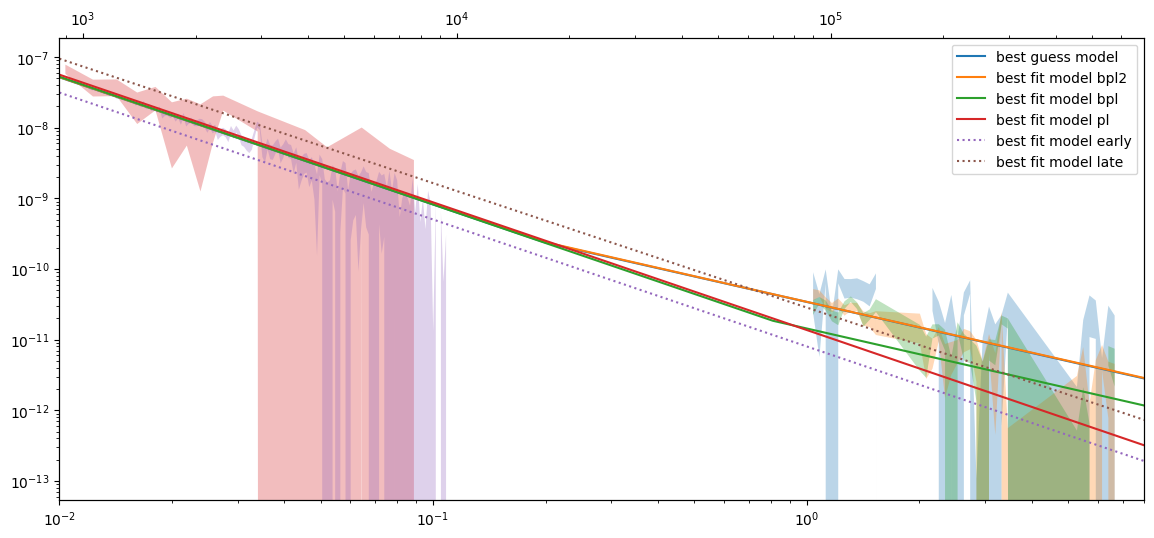

In [23]:
import numpy as np
import emcee
from scipy.stats import norm


plt.figure(figsize=(14, 6))


def fitit(ipick, p0_v = [np.log10(1e-11), -1.8]):
    ndim, nwalkers = len(p0_v), 100
    p0_c = np.array([p0_v]*nwalkers)
    p0 = norm(p0_c, p0_c.__abs__()*0.05).rvs()

    def log_prior(p):
        if not (-12.5 < p[0] < -10.5):
            return -np.inf
        
        if not (-3 < p[1] < -1):
            return -np.inf

        if len(p) > 2 and not np.isnan(p[2]) and not (0.01 < p[2] < 5):
            return -np.inf

        return 0.0
        

    def log_prob(p):
        mll = 0

        lp = log_prior(p)
        if not np.isfinite(lp):
            return -np.inf

        for n, d in lc_by_instrument.items():
            # print(n)
            if ipick(n):
            # if n in ['JMX1', 'JMX2', 'IBIS', 'picsit']:
                model = s_t_model_gen(*p)(d['t'], n)

                sigma2 = d['re']**2

                m = d['t'] > 1000./24/3600
                dev = ((model - d['r'])**2/sigma2)[m]
                
                c_mll = -0.5 * dev.sum() + np.log(sigma2.mean())

                # c_mll = norm(model, d['re']).logpdf(d['r']) #.sum()

                # print(p, 'model', s_t_model_gen(*p)(1, n), c_mll)
                
                mll += c_mll.sum()

        if np.isnan(mll):
            print("this returns NaN:", p, mll)
            return -np.inf
                
        return mll + lp

    # from multiprocessing import Pool

    # with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob) #, pool=pool)
    sampler.run_mcmc(p0, nsampler, progress=True)

    p_best = [np.mean(np.percentile(r, [40, 60])) for r in sampler.flatchain.transpose()]
    p_range = [np.percentile(r, [5, 95]) for r in sampler.flatchain.transpose()]
    return {'p_best': p_best, 'p_range': p_range}


T = np.logspace(-2, 1, 100)

plt.plot(T, s_t_model_gen(np.log10(1.3e-11), -1.8, 0.8, -1.2, 0.2, -1.2)(T, 'picsit'), label="best guess model")

ag_fit = {}


r = fitit(lambda n: True, p0_v = [np.log10(1.3e-11), -1.8, 0.8, -1.2, 0.2, -1.2])
ag_fit['all_bpl2'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label=f"best fit model bpl2")

r = fitit(lambda n: True, p0_v = [np.log10(1.3e-11), -1.8, 0.8, -1.2])
ag_fit['all_bpl'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model bpl")

r = fitit(lambda n: True, p0_v = [np.log10(1.3e-11), -1.8])
ag_fit['all_pl'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model pl")

r = fitit(lambda n: n in ['acs', 'picsit'])
ag_fit['acs_picsit'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model early", ls=":")

r = fitit(lambda n: n in ['JMX1', 'JMX2', 'IBIS'])
ag_fit['jmx_ibis'] = r
plt.plot(T, s_t_model_gen(*r['p_best'])(T, 'picsit'), label="best fit model late", ls=":")


plt.legend()

for n, d in lc_by_instrument.items():
    m = d['t'] > 0.01
    plt.fill_between(d['t'][m], 
                     (d['r'] - d['re'])[m] * conversion_for_instrument(n),
                     (d['r'] + d['re'])[m] * conversion_for_instrument(n), alpha=0.3)

plt.loglog()
plt.xlim([1e-2, 8])

xl_d = plt.gca().get_xlim()

plt.twiny()
plt.xlim(np.array(xl_d)*24*3600)
plt.semilogx()

plt.savefig("st_models.pdf")
plt.savefig("st_models.png")

# TODO: separate fits for two sections with a break
# TODO: make spectral real
# TODO: make steps with fill

In [24]:
for nm, m in ag_fit.items():
    pnames = ["N", "slope"]

    if nm == "all_bpl":
        pnames += ["t_br", "slope_pb"]

    elif nm == "all_bpl2":
        pnames += ["t_br", "slope_pb", "t_br_er", "slope_mid"]

    for n, p, pr in zip(pnames, m['p_best'], m['p_range']):
        print(nm, n, p, pr)
        m[n] = {
            'mean': p,
            'stat_err_minus': p - pr[0],
            'stat_err_plus': pr[1] - p
        }

ag_fit

all_bpl2 N -10.877582724473479 [-11.88500108 -10.00283461]
all_bpl2 slope -1.7972302496338872 [-1.98107436 -1.6306048 ]
all_bpl2 t_br 0.8045155170681721 [0.73037855 0.86616598]
all_bpl2 slope_pb -1.1946274945650803 [-1.31167346 -1.10608949]
all_bpl2 t_br_er 0.19947107654796647 [0.18656918 0.21280458]
all_bpl2 slope_mid -1.2097173406815953 [-1.31738707 -1.11464645]
all_bpl N -10.89732793334884 [-11.82913913 -10.09364294]
all_bpl slope -1.8098147958016584 [-1.96168826 -1.64547813]
all_bpl t_br 0.8108470889951869 [0.74094523 0.87809535]
all_bpl slope_pb -1.207645854452446 [-1.30069122 -1.11513887]
all_pl N -10.864141199853016 [-11.87546873 -10.182851  ]
all_pl slope -1.80770818749034 [-1.94693501 -1.64956765]
acs_picsit N -11.096599407922263 [-11.91760383 -10.07922776]
acs_picsit slope -1.7972330733201987 [-1.94220717 -1.62746939]
jmx_ibis N -10.545981984066056 [-11.17948453 -10.12907833]
jmx_ibis slope -1.7615688666546236 [-1.94913628 -1.37385112]


{'all_bpl2': {'p_best': [-10.877582724473479,
   -1.7972302496338872,
   0.8045155170681721,
   -1.1946274945650803,
   0.19947107654796647,
   -1.2097173406815953],
  'p_range': [array([-11.88500108, -10.00283461]),
   array([-1.98107436, -1.6306048 ]),
   array([0.73037855, 0.86616598]),
   array([-1.31167346, -1.10608949]),
   array([0.18656918, 0.21280458]),
   array([-1.31738707, -1.11464645])],
  'N': {'mean': -10.877582724473479,
   'stat_err_minus': 1.0074183541249706,
   'stat_err_plus': 0.8747481139667492},
  'slope': {'mean': -1.7972302496338872,
   'stat_err_minus': 0.1838441105309041,
   'stat_err_plus': 0.16662545287630648},
  't_br': {'mean': 0.8045155170681721,
   'stat_err_minus': 0.07413696267138137,
   'stat_err_plus': 0.061650466740557075},
  'slope_pb': {'mean': -1.1946274945650803,
   'stat_err_minus': 0.11704596163828129,
   'stat_err_plus': 0.08853800555020985},
  't_br_er': {'mean': 0.19947107654796647,
   'stat_err_minus': 0.012901897360642567,
   'stat_err_pl

In [25]:

# import corner

# samples = sampler.get_chain(flat=False)
# flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

# # _=plt.hist(samples[:, 0], 100, color="k", histtype="step")
# fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
# labels = ["m", "b", "log(f)"]
# for i in range(ndim):
#     ax = axes[i]
#     ax.plot(samples[:, :, i], "k", alpha=0.3)
#     ax.set_xlim(0, len(samples))
#     ax.set_ylabel(labels[i])
#     ax.yaxis.set_label_coords(-0.1, 0.5)

# axes[-1].set_xlabel("step number")

# _ = corner.corner(flat_samples)

# # plt.xlabel(r"$\theta_1$")
# # plt.ylabel(r"$p(\theta_1)$")
# # plt.gca().set_yticks([]);

In [26]:
lc_pdf = "lc.pdf"
rings = rings
relpos_history_pdf = "relpos_history.pdf"
st_models_pdf = "st_models.pdf"
comment_reconstruction = "assuming slope of -2"
theta_ons_min = theta[m_stable_ons_response].min()
theta_ons_max = theta[m_stable_ons_response].max()
approx_ons_t1_isot = Time(att_hist['POINTING_TIME'][m_stable_ons_response].min() + 51544, format='mjd').isot
approx_ons_t1_rel_d = att_hist['POINTING_TIME'][m_stable_ons_response].min() - T0_ijd
approx_ons_t2_isot = Time(att_hist['POINTING_TIME'][m_stable_ons_response].max() + 51544, format='mjd').isot
approx_ons_t2_rel_d = att_hist['POINTING_TIME'][m_stable_ons_response].max() - T0_ijd
ons_response_change_pc = 20 # check
ag_fit = ag_fit